# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción

Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px

# 3.Cargar la Data

Se carga el archivo de salida del notebook 04_Carga_datos_Final.ipynb

In [ ]:
data = pd.read_csv("03-DF_Inicial.csv") # Read data
data_original=data.copy()
data.head(5)

,Unnamed: 0,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,...,Active_y,Amortized debt,Approved,Canceled,Completed_y,Demand_y,Returned to the store,Signed_y,MAX_SK_DPD_y,MAX_SK_DPD_DEF
0,0,100002,1,0,1,0,202500.0,406597.5,24700.5,26.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,46.0,...,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN
2,2,100004,0,1,1,0,67500.0,135000.0,6750.0,52.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,52.0,...,18.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,55.0,...,25.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 249 entries, Unnamed: 0 to MAX_SK_DPD_DEF
dtypes: float64(189), int64(60)
memory usage: 584.2 MB


* Se visualiza un total de 307.511 registros. 
* 247 features y 1 una variable objetivo (target)
* Del total de variables, 43 de ellas parecen ser nominales

# 4.Preprocesamiento

## 4.0. Algunas transformaciones necesarias

Del DataSet 1, se convirtió varias variables categoricas en dummy. Por lo cual, se llaman a las mismas y se convierten su dtype en category

In [ ]:
lista1=['TARGET',
'NAME_INCOME_TYPE_Commercial associate',
'NAME_INCOME_TYPE_Student',
'NAME_EDUCATION_TYPE_Higher education',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_HOUSING_TYPE_Co-op apartment',
'NAME_HOUSING_TYPE_Rented apartment',
'OCCUPATION_TYPE_Core staff',
'OCCUPATION_TYPE_IT staff',
'OCCUPATION_TYPE_Medicine staff',
'OCCUPATION_TYPE_Secretaries',
'FONDKAPREMONT_MODE_org spec account',
'HOUSETYPE_MODE_specific housing',
'FLAG_LAST_APPL_PER_CONTRACT_N',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_INCOME_TYPE_Unemployed',
'NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'NAME_HOUSING_TYPE_House / apartment',
'NAME_HOUSING_TYPE_With parents',
'OCCUPATION_TYPE_Drivers',
'OCCUPATION_TYPE_Laborers',
'OCCUPATION_TYPE_Private service staff',
'OCCUPATION_TYPE_Security staff',
'FONDKAPREMONT_MODE_reg oper account',
'HOUSETYPE_MODE_terraced house',
'NAME_INCOME_TYPE_Businessman',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_Working',
'NAME_HOUSING_TYPE_Municipal apartment',
'OCCUPATION_TYPE_Accountants',
'OCCUPATION_TYPE_HR staff',
'OCCUPATION_TYPE_Low-skill Laborers',
'OCCUPATION_TYPE_Realty agents',
'OCCUPATION_TYPE_Waiters/barmen staff',
'FONDKAPREMONT_MODE_reg oper spec account',
'WALLSMATERIAL_MODE_Block',
'WALLSMATERIAL_MODE_Mixed',
'WALLSMATERIAL_MODE_Monolithic',
'WALLSMATERIAL_MODE_Others',
'WALLSMATERIAL_MODE_Panel',
'WALLSMATERIAL_MODE_Stone, brick',
'WALLSMATERIAL_MODE_Wooden']

In [ ]:
for i in lista1:
  data[i]=data[i].astype('category')

data['SK_ID_CURR']=data['SK_ID_CURR'].astype('object')
data['AMT_REQ_CREDIT_BUREAU_YEAR']=data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('float32')

In [ ]:
#Se hace la prueba con variables aleatorias,
data['WALLSMATERIAL_MODE_Others'].dtype, data['TARGET'].dtype

(CategoricalDtype(categories=[0, 1], ordered=False),
 CategoricalDtype(categories=[0, 1], ordered=False))

Del DataSet1, se identificó que al hacer dummy de variables, no es necesario dejar FLAG_LAST_APPL_PER_CONTRACT_N and FLAG_LAST_APPL_PER_CONTRACT_Y. Se procede a graficar cada una de ellas contra la variable objetivo para tomar la decisión de hacer el drop

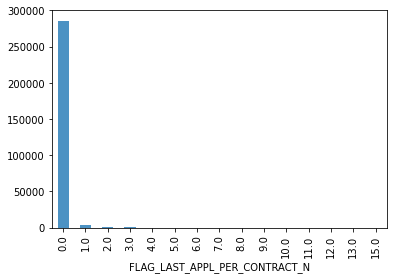

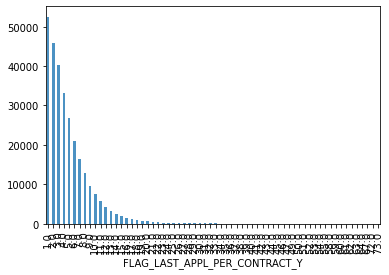

In [ ]:
agrupa=data['SK_ID_CURR'].groupby(data['FLAG_LAST_APPL_PER_CONTRACT_N']).count()
agrupa.plot.bar(alpha=0.8)
plt.show()

agrupa=data['SK_ID_CURR'].groupby(data['FLAG_LAST_APPL_PER_CONTRACT_Y']).count()
agrupa.plot.bar(alpha=0.8)
plt.show()

In [ ]:
data.drop(columns=['FLAG_LAST_APPL_PER_CONTRACT_N','Unnamed: 0'],inplace=True)

In [ ]:
data.shape

(307511, 247)

## 4.1. Eliminar duplicados y variables redundantes

In [ ]:
#Check si un ID tiene información duplicada
data["SK_ID_CURR"].duplicated().sum()

0

In [ ]:
#Se mira una pequeña muestra de la data
data.sample(10).T

,120589,69089,131525,106249,75674,68977,101900,63957,170555,52708
SK_ID_CURR,239821,180131,252542,223274,187751,179996,218306,174163,297668,161048
TARGET,1,0,0,0,0,0,0,0,0,0
FLAG_OWN_CAR,1,1,0,0,1,0,0,0,0,0
FLAG_OWN_REALTY,1,1,1,1,1,0,0,1,0,1
CNT_CHILDREN,0,2,0,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
Demand_y,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
Returned to the store,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
Signed_y,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0
MAX_SK_DPD_y,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
#Revisar cant de columnas numéricas y categóricas
Categoricas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
print(f"{Categoricas}, \n Cant. variables no numéricas: {len(Categoricas)} \n Cant. variables numéricas: {len(data.columns)-len(Categoricas)}")

['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATI

A continuación, se observan las categorias de cada variable categórica y la desviación estandar de cada variable numérica.

In [ ]:
#Obtener los valores unicos para las variables categóricas y la desv. std para las numéricas. 
#Si la desv. std de alguna variable es = 0, esta variable debe ser eliminada, pues no está brindando información
for col in data:
  print(col)
  if not isinstance(data[col][0], (int, float, complex)):
    print(f"Cat: {col} = {data[col].unique()}, y es tipo {data[col].dtypes}")
  else:
    print(f"Num: {col} = {data[col].std()}, y es tipo {data[col].dtypes}")

SK_ID_CURR
Num: SK_ID_CURR = 102790.17534842459, y es tipo object
TARGET
Cat: TARGET = [1, 0]
Categories (2, int64): [0, 1], y es tipo category
FLAG_OWN_CAR
Cat: FLAG_OWN_CAR = [0 1], y es tipo int64
FLAG_OWN_REALTY
Cat: FLAG_OWN_REALTY = [1 0], y es tipo int64
CNT_CHILDREN
Cat: CNT_CHILDREN = [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14], y es tipo int64
AMT_INCOME_TOTAL
Num: AMT_INCOME_TOTAL = 237123.14627883647, y es tipo float64
AMT_CREDIT_x
Num: AMT_CREDIT_x = 402490.776995946, y es tipo float64
AMT_ANNUITY_x
Num: AMT_ANNUITY_x = 14493.737315117392, y es tipo float64
DAYS_BIRTH
Num: DAYS_BIRTH = 11.964047232614444, y es tipo float64
DAYS_EMPLOYED
Cat: DAYS_EMPLOYED = [  -637  -1188   -225 ... -12971 -11084  -8694], y es tipo int64
REGION_RATING_CLIENT
Cat: REGION_RATING_CLIENT = [2 1 3], y es tipo int64
REGION_RATING_CLIENT_W_CITY
Cat: REGION_RATING_CLIENT_W_CITY = [2 1 3], y es tipo int64
EXT_SOURCE_1
Num: EXT_SOURCE_1 = 0.21106224927392558, y es tipo float64
EXT_SOURCE_2
Num: E

In [ ]:
#Otras modificaciones necesarias que se identificaron 
data["CNT_CHILDREN"]=data['CNT_CHILDREN'].astype('float64')
data["AMT_REQ_CREDIT_BUREAU_YEAR"]=data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('float64')

data["DAYS_EMPLOYED"]=round(abs(data['DAYS_EMPLOYED'].astype('float64'))/30,0) #solo da si se llenan los null
data.rename(columns={'DAYS_EMPLOYED': 'MONTHS_EMPLOYED'}, inplace=True)

A partir del análisis anterior, se identificó:

1. Otros posibles valores para los cuales está entrando los missings en las variables objetivos son: not specified, Unknown,XNA. Se debe realizar un reeplace por np.NaN
2. CREDIT_TYPE_Loan for purchase of shares (margin lending), CREDIT_TYPE_Loan for the purchase of equipment, CREDIT_TYPE_Real estate loan se deben de revisar nuevamente, pues su desv. std es cercana a 0. 
3. Las siguientes varibales son redundantes: FLAG_OWN_CAR_N, FLAG_OWN_REALTY_N,EMERGENCYSTATE_MODE_No

In [ ]:
#Reeplace
data.replace(['not specified', 'Unknown', 'XNA'], np.NaN,inplace=True)

In [ ]:
print(f"{data['CREDIT_TYPE_Loan for purchase of shares (margin lending)'].describe()} \n")
print(f"{data['CREDIT_TYPE_Loan for the purchase of equipment'].describe()} \n")
print(f"{data['CREDIT_TYPE_Real estate loan'].describe()} \n")

count    263491.000000
mean          0.000015
std           0.003896
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_TYPE_Loan for purchase of shares (margin lending), dtype: float64 

count    263491.000000
mean          0.000065
std           0.008491
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: CREDIT_TYPE_Loan for the purchase of equipment, dtype: float64 

count    263491.000000
mean          0.000087
std           0.009342
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_TYPE_Real estate loan, dtype: float64 



Se identifica que las siguientes variables, para las cuales parecen ser resultado de una codificación de una variable nominal, se debe realizar una reducción de la dimensionalidad:

* CREDIT_TYPE_Another type of loan = 0.06008432417545158
* CREDIT_TYPE_Car loan = 0.3498128197489073
* CREDIT_TYPE_Cash loan (non-earmarked) = 0.010490637892952551
* CREDIT_TYPE_Consumer credit = 3.497836303162887
* CREDIT_TYPE_Credit card = 1.5027703871713
* CREDIT_TYPE_Interbank credit = 0.0019481262897516362
* CREDIT_TYPE_Loan for business development = 0.10156017046876356
* CREDIT_TYPE_Loan for purchase of shares (margin lending) = 0.0038962303988008687
* CREDIT_TYPE_Loan for the purchase of equipment = 0.00849145663669325
* CREDIT_TYPE_Loan for working capital replenishment = 0.044529180295237766
* CREDIT_TYPE_Microloan = 0.4844746939644068
* CREDIT_TYPE_Mobile operator loan = 0.0019481262897532365
* CREDIT_TYPE_Mortgage = 0.26000472962697974
*  CREDIT_TYPE_Real estate loan = 0.009342495423306825
* CREDIT_TYPE_Unknown type of loan = 0.04696385412456898

Para los CREDIT_TYPE con una SD menor a 0.05, se agruparan en another type of loan y se eliminaran las otras variables

In [ ]:
data['CREDIT_TYPE_Another type of loan']=data[['CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Car loan','CREDIT_TYPE_Cash loan (non-earmarked)',\
      'CREDIT_TYPE_Interbank credit','CREDIT_TYPE_Loan for purchase of shares (margin lending)','CREDIT_TYPE_Loan for the purchase of equipment',\
      'CREDIT_TYPE_Loan for working capital replenishment','CREDIT_TYPE_Mobile operator loan','CREDIT_TYPE_Real estate loan','CREDIT_TYPE_Unknown type of loan']].sum(axis=1)
data=data.drop(['CREDIT_TYPE_Car loan','CREDIT_TYPE_Cash loan (non-earmarked)',\
      'CREDIT_TYPE_Interbank credit','CREDIT_TYPE_Loan for purchase of shares (margin lending)','CREDIT_TYPE_Loan for the purchase of equipment',\
      'CREDIT_TYPE_Loan for working capital replenishment','CREDIT_TYPE_Mobile operator loan','CREDIT_TYPE_Real estate loan','CREDIT_TYPE_Unknown type of loan'],axis=1)

In [ ]:
#Eliminar redundantes
data.drop(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', \
           'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']\
          ,axis=1,inplace=True)

## 4.2 Codificiación de variables categóricas

Este proceso se llevó a cabo en el notebook 00-Carga_de_datos, para el cual se realizó one-hot-encoding o get_dummys, previo al merge de los diferentes dataset con el dataset principal.

## 4.3 Tratamiento de Missing

In [ ]:
y=[]
x=[]
for i in range(data.shape[1]):
  a=data[data.columns[i]].isnull().sum()
  calculo=round(100*(a/len(data)),4)
  # y.append((data.columns[i], calculo))
  x.append(data.columns[i])
  y.append(calculo)
  print(f'Porcentaje de valores nulos en {data.columns[i]} es del: {calculo}%')

Porcentaje de valores nulos en SK_ID_CURR es del: 0.0%
Porcentaje de valores nulos en TARGET es del: 0.0%
Porcentaje de valores nulos en FLAG_OWN_CAR es del: 0.0%
Porcentaje de valores nulos en FLAG_OWN_REALTY es del: 0.0%
Porcentaje de valores nulos en CNT_CHILDREN es del: 0.0%
Porcentaje de valores nulos en AMT_INCOME_TOTAL es del: 0.0%
Porcentaje de valores nulos en AMT_CREDIT_x es del: 0.0%
Porcentaje de valores nulos en AMT_ANNUITY_x es del: 0.0039%
Porcentaje de valores nulos en DAYS_BIRTH es del: 0.0%
Porcentaje de valores nulos en MONTHS_EMPLOYED es del: 0.0%
Porcentaje de valores nulos en REGION_RATING_CLIENT es del: 0.0%
Porcentaje de valores nulos en REGION_RATING_CLIENT_W_CITY es del: 0.0%
Porcentaje de valores nulos en EXT_SOURCE_1 es del: 56.3811%
Porcentaje de valores nulos en EXT_SOURCE_2 es del: 0.2146%
Porcentaje de valores nulos en EXT_SOURCE_3 es del: 19.8253%
Porcentaje de valores nulos en APARTMENTS_AVG es del: 50.7497%
Porcentaje de valores nulos en BASEMENTAREA_

Se identifica una gran cantidad de columnas con un porcentaje de nulos superior al 15%. Se procede a realizar el drop de dichas columnas.

In [ ]:
missing= pd.DataFrame(list(zip(x,y)), columns = ['feature','missing'])
missing[missing['missing']>15]

,feature,missing
12,EXT_SOURCE_1,56.3811
14,EXT_SOURCE_3,19.8253
15,APARTMENTS_AVG,50.7497
16,BASEMENTAREA_AVG,58.5160
17,YEARS_BEGINEXPLUATATION_AVG,48.7810
...,...,...
227,Demand_y,20.1869
228,Returned to the store,20.1869
229,Signed_y,20.1869
230,MAX_SK_DPD_y,45.9889


In [ ]:
lista_missing=missing[missing['missing']>15]
names_missing=lista_missing['feature'].unique()
for i in names_missing:
  data.drop([i],axis=1,inplace=True)

In [ ]:
#Tamaño del nuevo data set dado el drop de las columnas con alto % de vacíos. Data Set inicial 232 variables
data.shape 

(307511, 142)

In [ ]:
#Se obtiene el listado de las variables que se deben de imputar en pasos posteriores (Sección 4.3)
y=[]
x=[]
for i in range(data.shape[1]):
  a=data[data.columns[i]].isnull().sum()
  calculo=round(100*(a/len(data)),4)
  # y.append((data.columns[i], calculo))
  x.append(data.columns[i])
  y.append(calculo)
missing2= pd.DataFrame(list(zip(x,y)), columns = ['feature','missing'])
missing2[missing2['missing']>0].shape

(79, 2)

In [ ]:
# Total Missing values in the dataset
a=data_original.isnull().sum().sum()
b=data.isnull().sum().sum()
print(f"El total de valores nulos del dataset original es de = {a}")
print(f"El total de valores nulos del dataset es de = {b}")
print(f"Una vez realizada la depuración de algunas columnas, se redujo en {round(100*((b-a)/a),2)}% la cantidad de valores nulos")

El total de valores nulos del dataset original es de = 18136837
El total de valores nulos del dataset es de = 1954325
Una vez realizada la depuración de algunas columnas, se redujo en -89.22% la cantidad de valores nulos


In [ ]:
data['AMT_ANNUITY_x']=data['AMT_ANNUITY_x'].replace(np.nan,data['AMT_ANNUITY_x'].median())
for i in ['EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',\
          'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
  data[i]=data[i].replace(np.nan,data[i].mean())
for i in missing2.feature[6:-3]:
  data[i]=data[i].replace(np.nan,0)
for i in missing2.feature[-3:]:
  data[i]=data[i].replace(np.nan,1)

In [ ]:
# Total Missing values in the dataset
a=data_original.isnull().sum().sum()
b=data.isnull().sum().sum()
print(f"El total de valores nulos del dataset original es de = {a}")
print(f"El total de valores nulos del dataset es de = {b}")
print(f"Una vez realizada la depuración de algunas columnas, se redujo en {round(100*((b-a)/a),2)}% la cantidad de valores nulos")

El total de valores nulos del dataset original es de = 18136837
El total de valores nulos del dataset es de = 0
Una vez realizada la depuración de algunas columnas, se redujo en -100.0% la cantidad de valores nulos


In [ ]:
data_borrar=data.copy()

In [ ]:
print(data_borrar['AMT_INCOME_TOTAL'].quantile([0.00,0.25,0.50,0.75,0.99,1]))

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
a=data.loc[(data['AMT_INCOME_TOTAL']<np.percentile(data['AMT_INCOME_TOTAL'],99))]
a['AMT_INCOME_TOTAL'].describe()


count    304417.000000
mean     162911.014841
std       77494.004409
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      469800.000000
Name: AMT_INCOME_TOTAL, dtype: float64

## 4.4 Tratamiento de valores Atípicos

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)
len(Cuantitativas)

85

In [ ]:
#Se realiza una eliminación de atipicos inicial, correspondiente a aquellas muestras que están
#por encima del percentil 99
for i in Cuantitativas:
  data1=data.loc[(data[i]<np.percentile(data[i],99))]

In [ ]:
data_original.shape, data1.shape, data_original.shape[0]-data1.shape[0]

((307511, 249), (304435, 142), 3076)

In [ ]:
data=data1.copy()

In [ ]:
#Se realiza una eliminación de atipicos inicial, correspondiente a aquellas muestras que están
#por debajo del percentil 1
for i in Cuantitativas:
  data2=data.loc[(data[i]>np.percentile(data[i],1))]

In [ ]:
data.shape, data2.shape, data.shape[0]-data2.shape[0]

((304435, 142), (301390, 142), 3045)

In [ ]:
data=data2.copy()

In [ ]:
data.shape

(301390, 142)

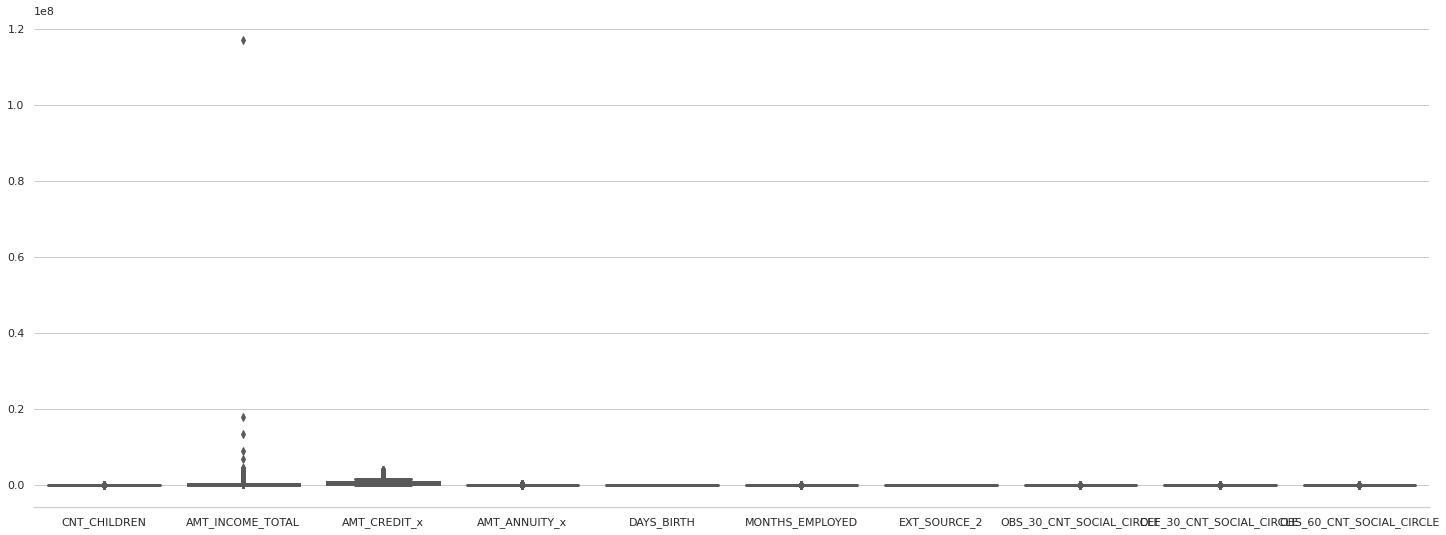

In [ ]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[0:10]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la variable AMT_INCOME_TOTAL se filtran los datos mayores a 427000 por percentil 98

In [ ]:
data=data[data['AMT_INCOME_TOTAL']<427000]

In [ ]:
data.shape

(295291, 142)

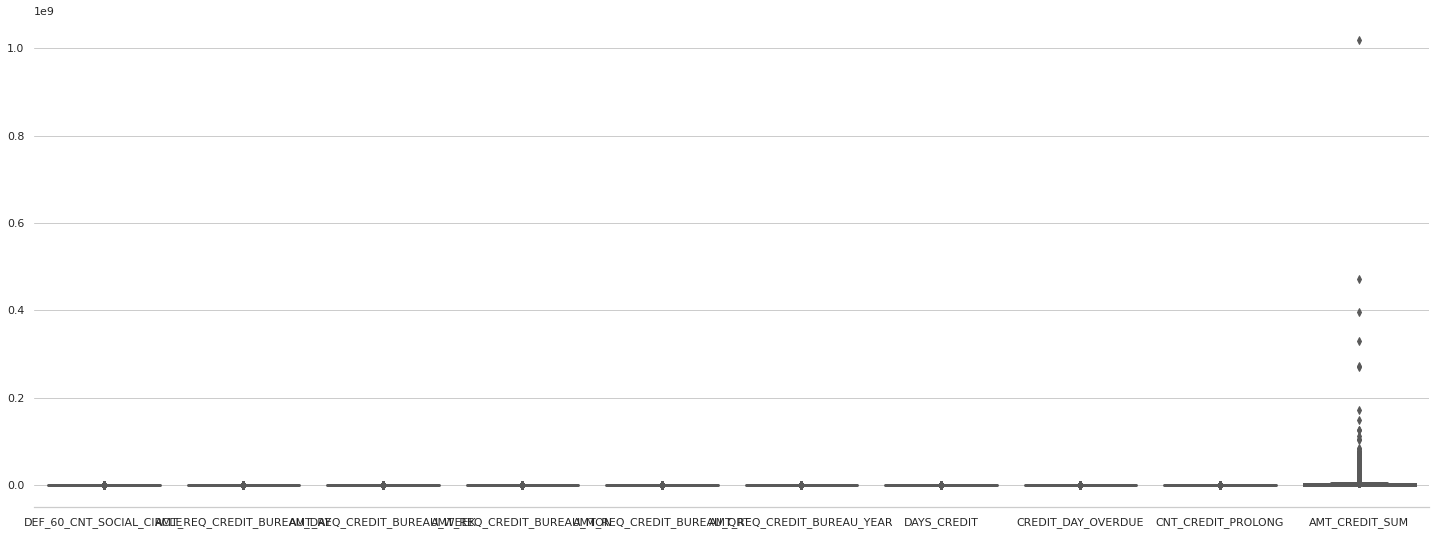

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[10:20]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, las variables AMT_CREDIT_SUM y AMT_CREDIT_SUM_DEBT se filtraran por los datos menores a 100000000

In [ ]:
data=data[data['AMT_CREDIT_SUM']<100000000]
data=data[data['AMT_CREDIT_SUM_DEBT']<100000000]

In [ ]:
data.shape

(295278, 142)

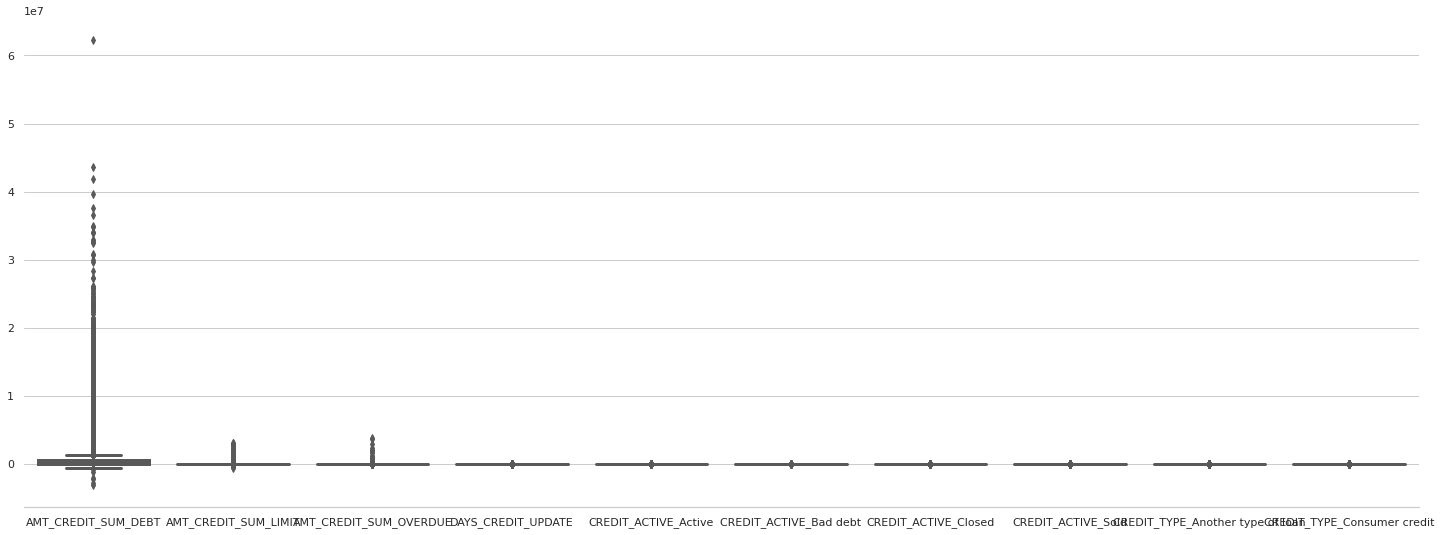

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[20:30]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, las variables AMT_CREDIT_SUM_LIMIT y AMT_CREDIT_SUM_OVERDUE se filtraran por los datos menores a 2500000 y 2250000 respectivamente

In [ ]:
data=data[data['AMT_CREDIT_SUM_LIMIT']<2500000]
data=data[data['AMT_CREDIT_SUM_OVERDUE']<2250000]

In [ ]:
data.shape

(295267, 142)

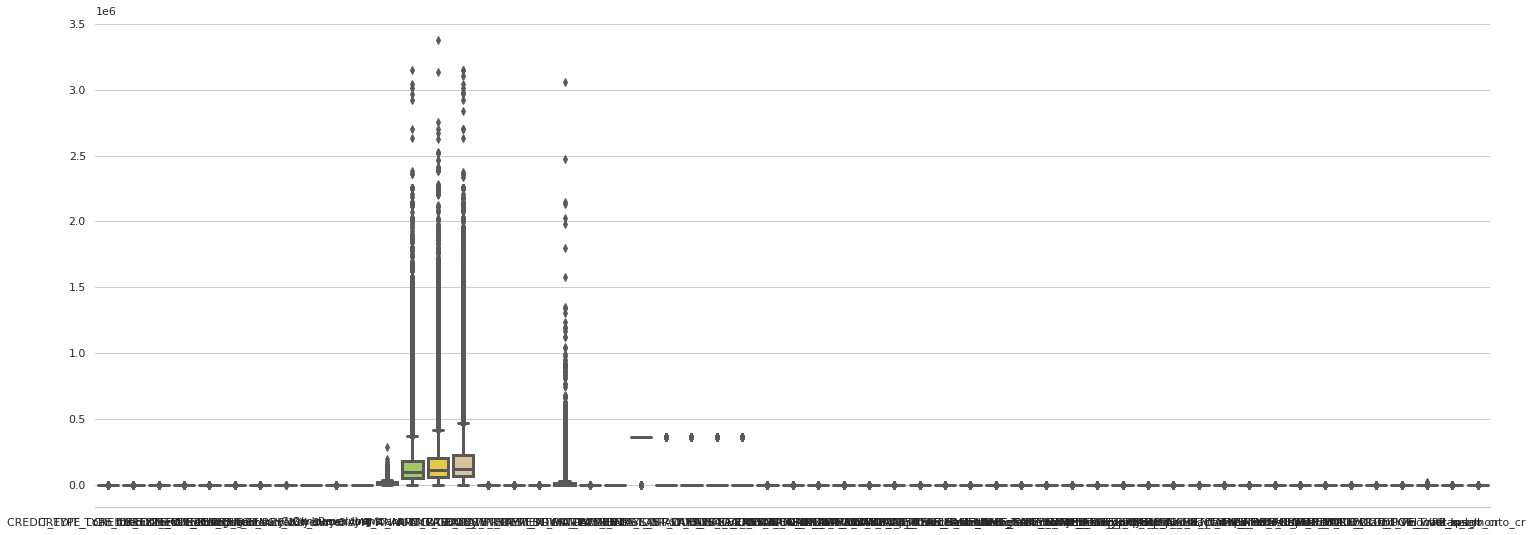

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[30:]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, la variable ind_vel_cuotas_cr se filtrara por los datos menores a 15000

In [ ]:
data=data[data['ind_vel_cuotas_cr']<15000]

In [ ]:
data.shape

(295264, 142)

Observaciones: 
* Se debe de ajustar months employed, ya que tiene atípicos que corresponden a más de 1000 años como empleados.
* DAYS_CREDIT > -1000 días
* NAME_PORTFOLIO_Cards imputar el máx por 2
* NAME_CLIENT_TYPE_New reemplazar el máx por un 0

In [ ]:
data['MONTHS_EMPLOYED']=data['MONTHS_EMPLOYED'].apply(lambda x: 1000 if x>1000 else x)
data['DAYS_CREDIT']=data['DAYS_CREDIT'].apply(lambda x: -1000 if abs(x)>1000 else x)
data['NAME_PORTFOLIO_Cards']=data['NAME_PORTFOLIO_Cards'].apply(lambda x: 2 if x>1 else x)
data['NAME_CLIENT_TYPE_New']=data['NAME_CLIENT_TYPE_New'].apply(lambda x: 0 if x>1 else x)

In [ ]:
data.shape

(295264, 142)

In [ ]:
a=data_original.shape[0]
b=data.shape[0]
print(f'A partir del tratamiento de datos atipicos, se obtuvo una reducción de {round(100*((b-a)/a),2)}% en el número de muestras')

A partir del tratamiento de datos atipicos, se obtuvo una reducción de -3.98% en el número de muestras


## 4.5 Exploración y Análisis Univariante y Bivariante

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)

In [ ]:
'AMT_REQ_CREDIT_BUREAU_YEAR' in Categoricas

False

In [ ]:
backup2=data.copy()

In [ ]:
data.shape

(295264, 142)

### 4.5.1 Categóricas

Participación de la categorías de FLAG_OWN_CAR son: 
 FLAG_OWN_CAR
0    66.522841
1    33.477159
Name: SK_ID_CURR, dtype: float64 



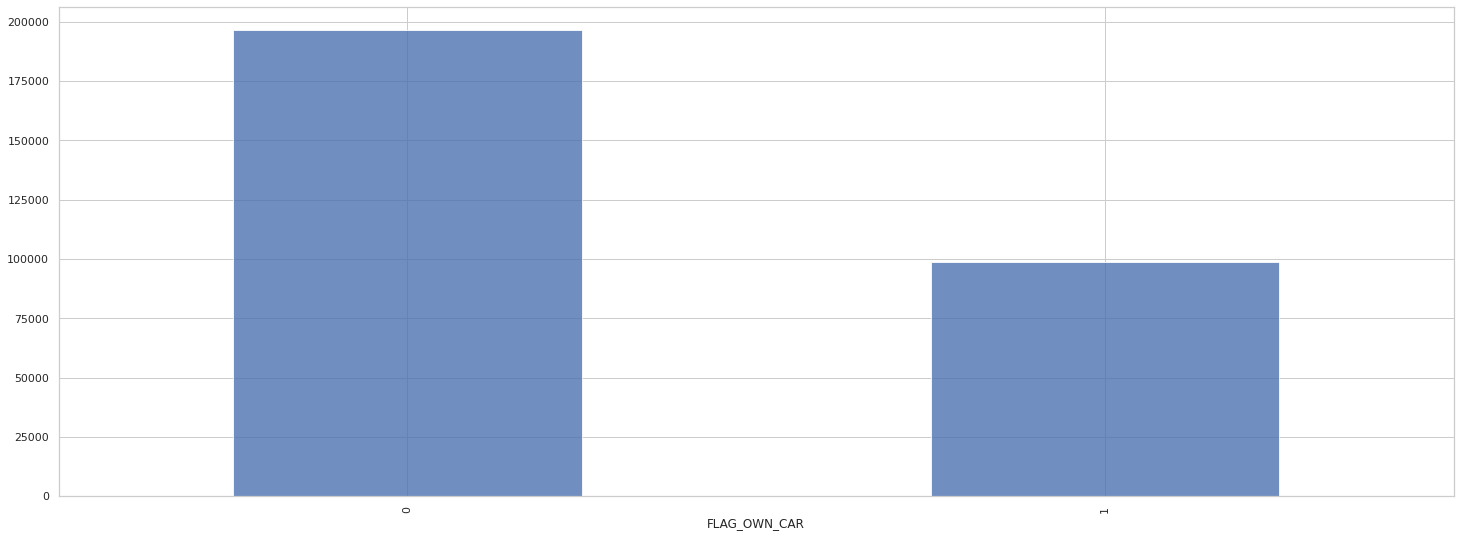

Participación de la categorías de FLAG_OWN_REALTY son: 
 FLAG_OWN_REALTY
0    30.67797
1    69.32203
Name: SK_ID_CURR, dtype: float64 



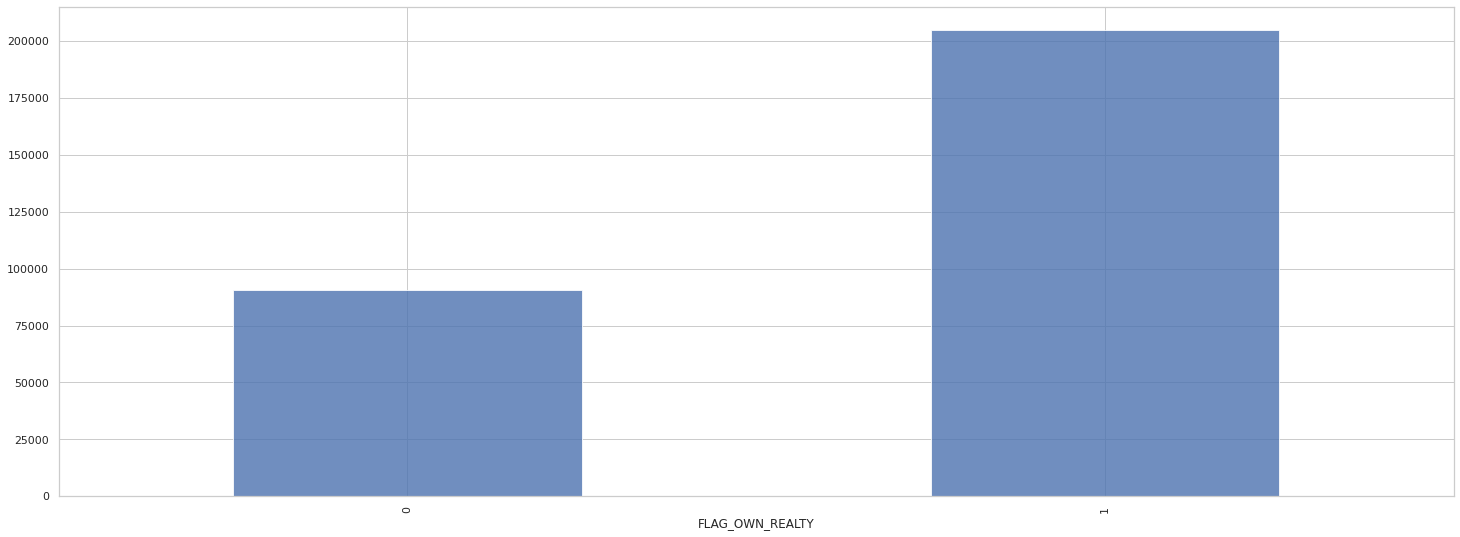

Participación de la categorías de REGION_RATING_CLIENT son: 
 REGION_RATING_CLIENT
1     9.840685
2    74.255920
3    15.903395
Name: SK_ID_CURR, dtype: float64 



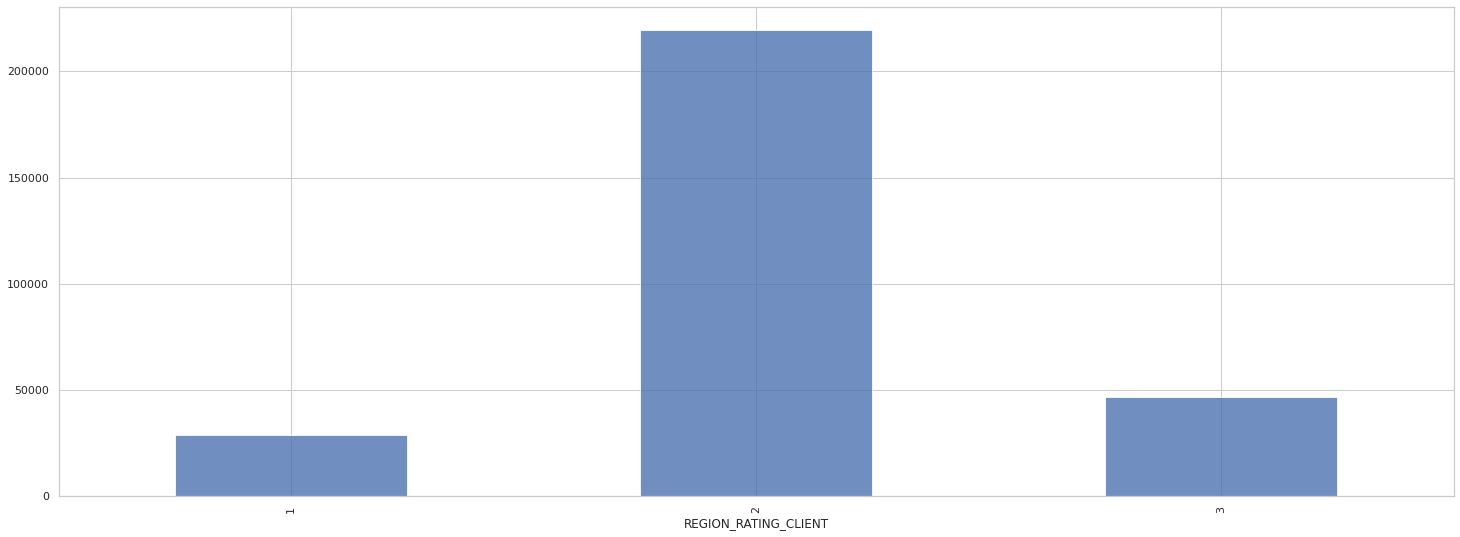

Participación de la categorías de REGION_RATING_CLIENT_W_CITY son: 
 REGION_RATING_CLIENT_W_CITY
1    10.463517
2    75.084331
3    14.452151
Name: SK_ID_CURR, dtype: float64 



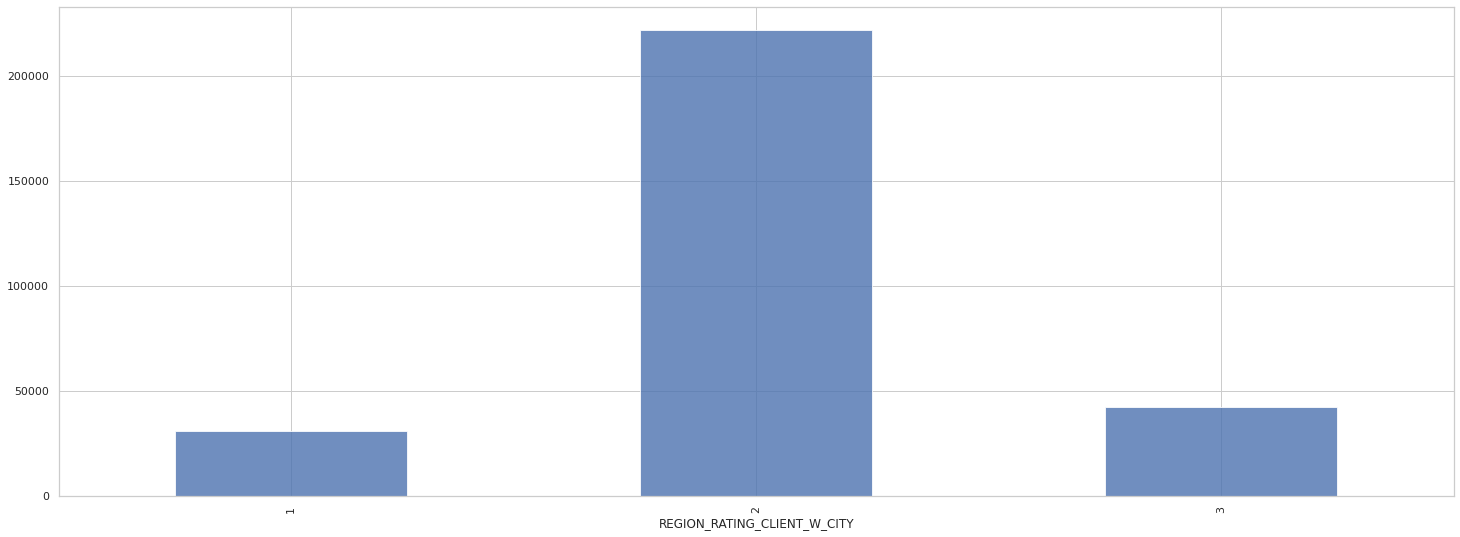

Participación de la categorías de NAME_INCOME_TYPE_Businessman son: 
 NAME_INCOME_TYPE_Businessman
0    99.998645
1     0.001355
Name: SK_ID_CURR, dtype: float64 



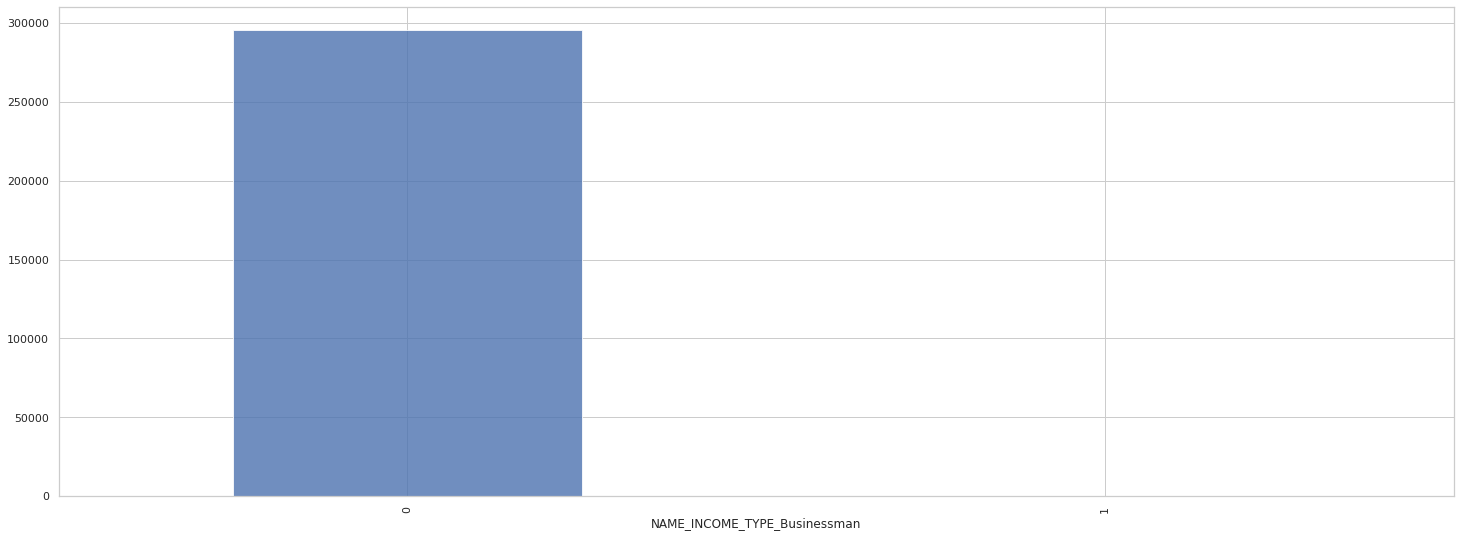

Participación de la categorías de NAME_INCOME_TYPE_Commercial associate son: 
 NAME_INCOME_TYPE_Commercial associate
0    77.300653
1    22.699347
Name: SK_ID_CURR, dtype: float64 



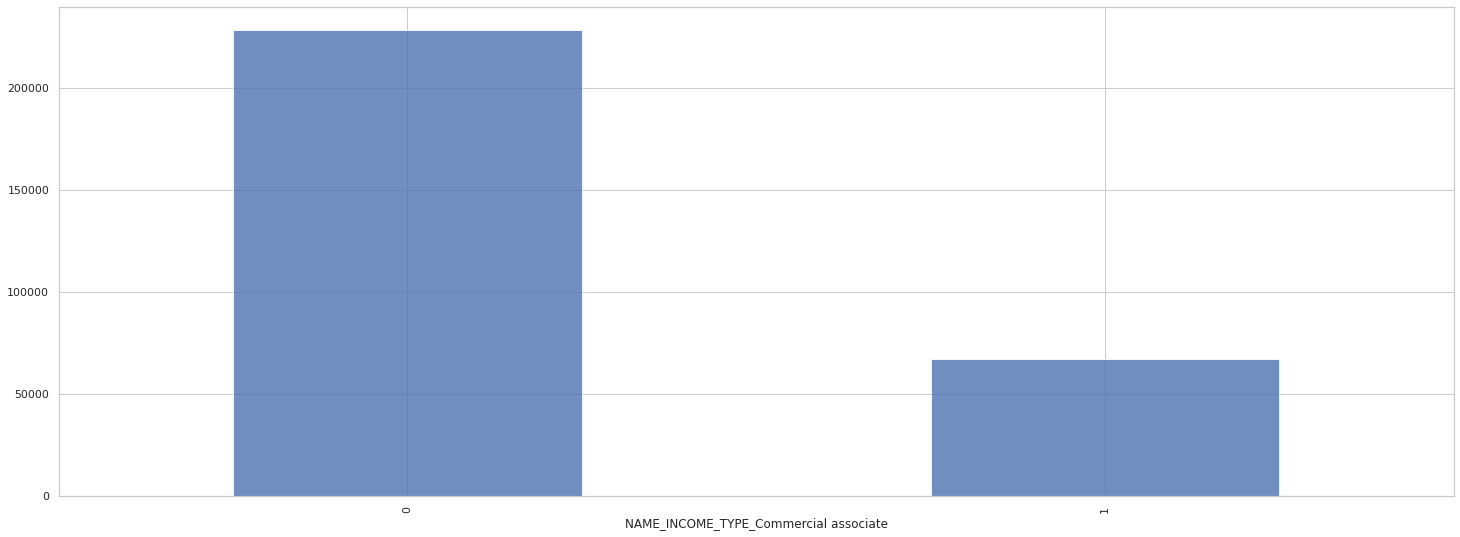

Participación de la categorías de NAME_INCOME_TYPE_Maternity leave son: 
 NAME_INCOME_TYPE_Maternity leave
0    99.998645
1     0.001355
Name: SK_ID_CURR, dtype: float64 



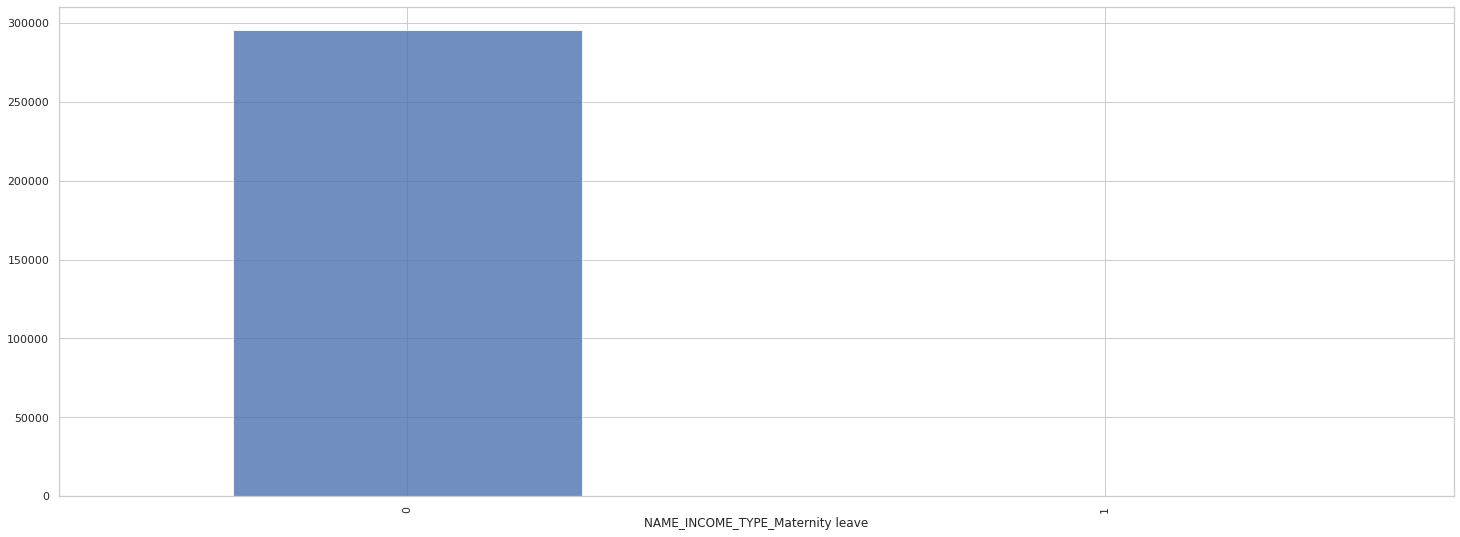

Participación de la categorías de NAME_INCOME_TYPE_Pensioner son: 
 NAME_INCOME_TYPE_Pensioner
0    81.802048
1    18.197952
Name: SK_ID_CURR, dtype: float64 



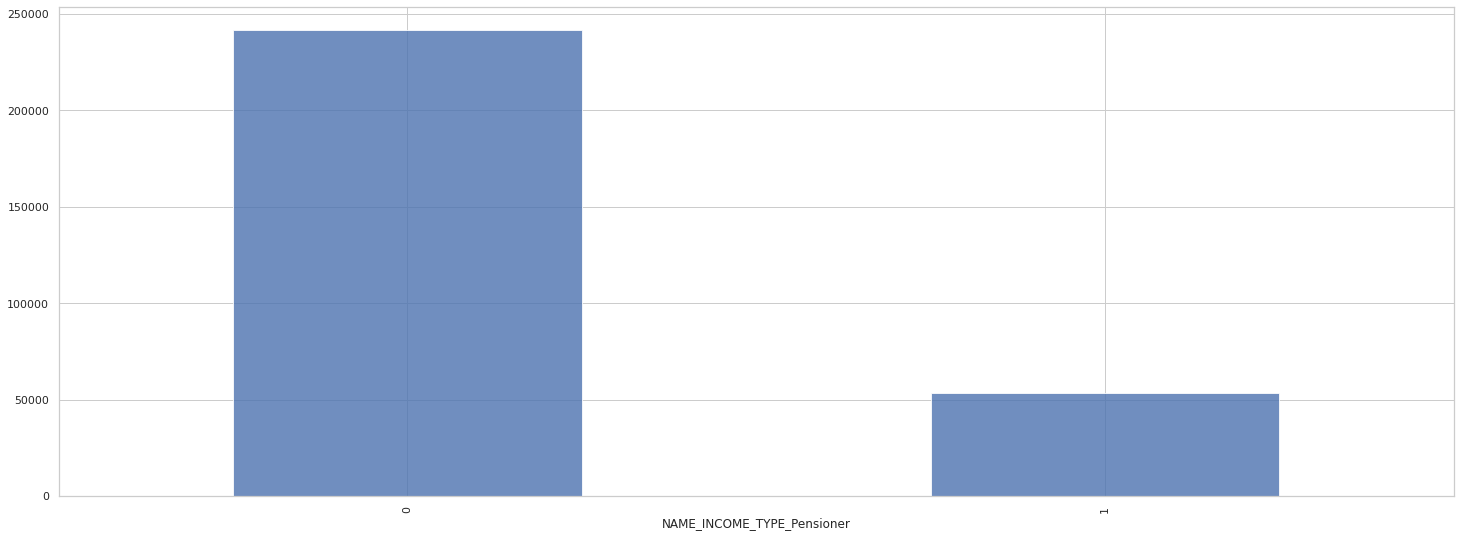

Participación de la categorías de NAME_INCOME_TYPE_State servant son: 
 NAME_INCOME_TYPE_State servant
0    92.965279
1     7.034721
Name: SK_ID_CURR, dtype: float64 



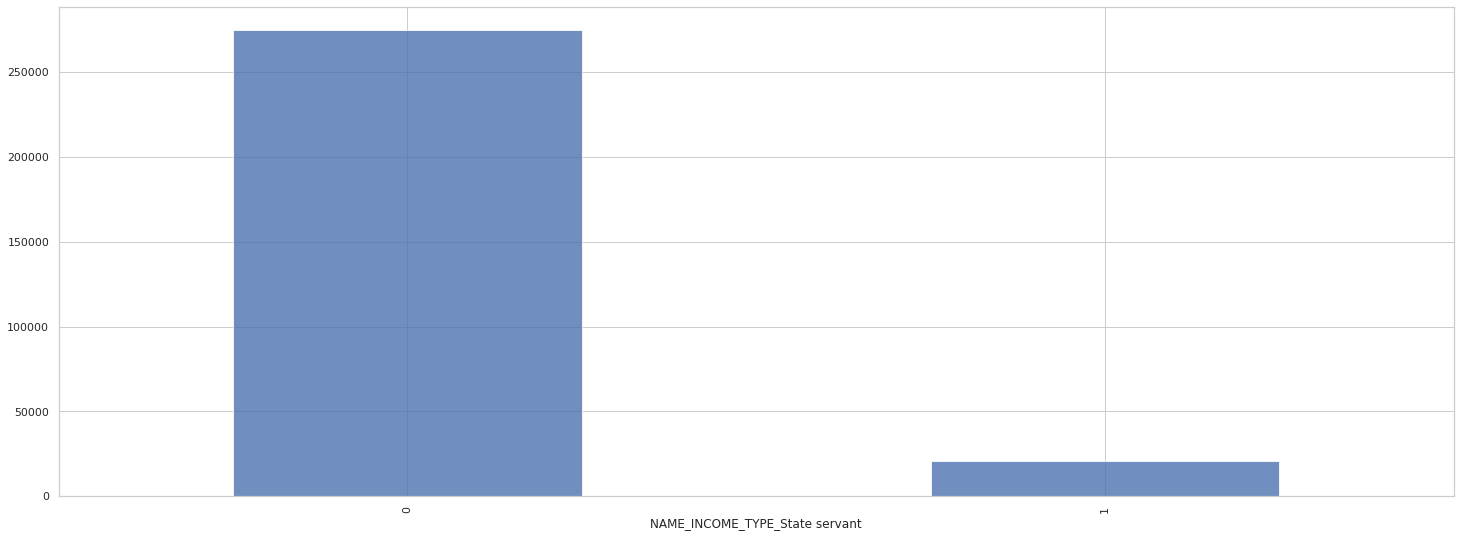

Participación de la categorías de NAME_INCOME_TYPE_Student son: 
 NAME_INCOME_TYPE_Student
0    99.994242
1     0.005758
Name: SK_ID_CURR, dtype: float64 



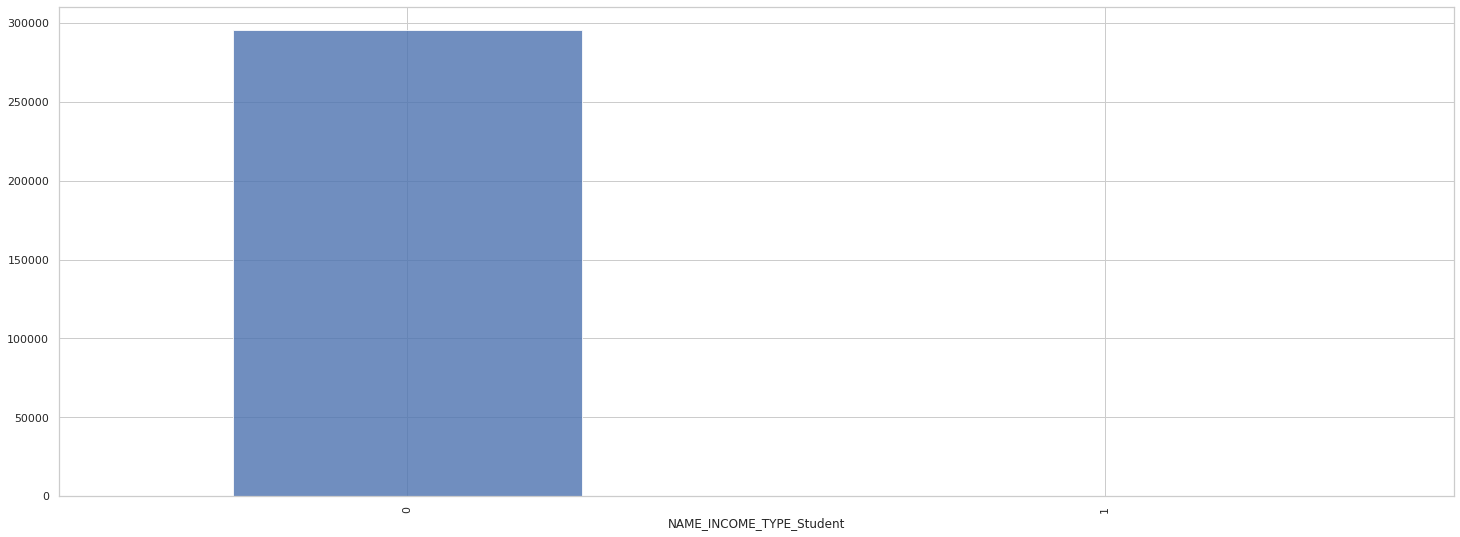

Participación de la categorías de NAME_INCOME_TYPE_Unemployed son: 
 NAME_INCOME_TYPE_Unemployed
0    99.993904
1     0.006096
Name: SK_ID_CURR, dtype: float64 



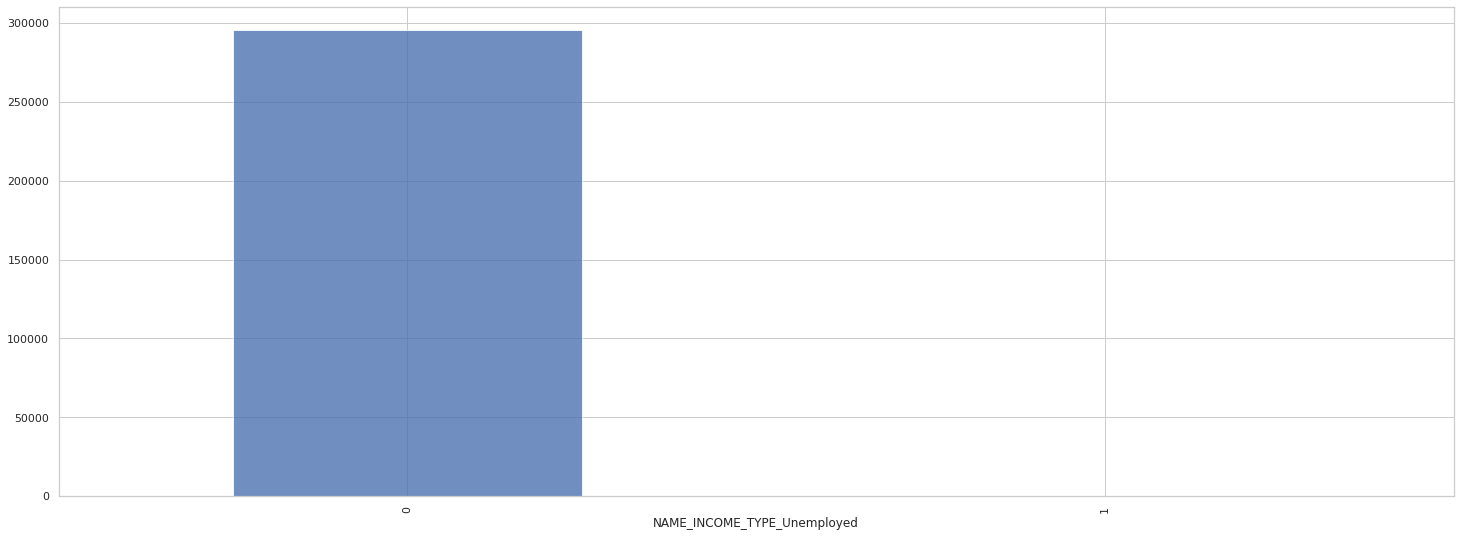

Participación de la categorías de NAME_INCOME_TYPE_Working son: 
 NAME_INCOME_TYPE_Working
0    47.946583
1    52.053417
Name: SK_ID_CURR, dtype: float64 



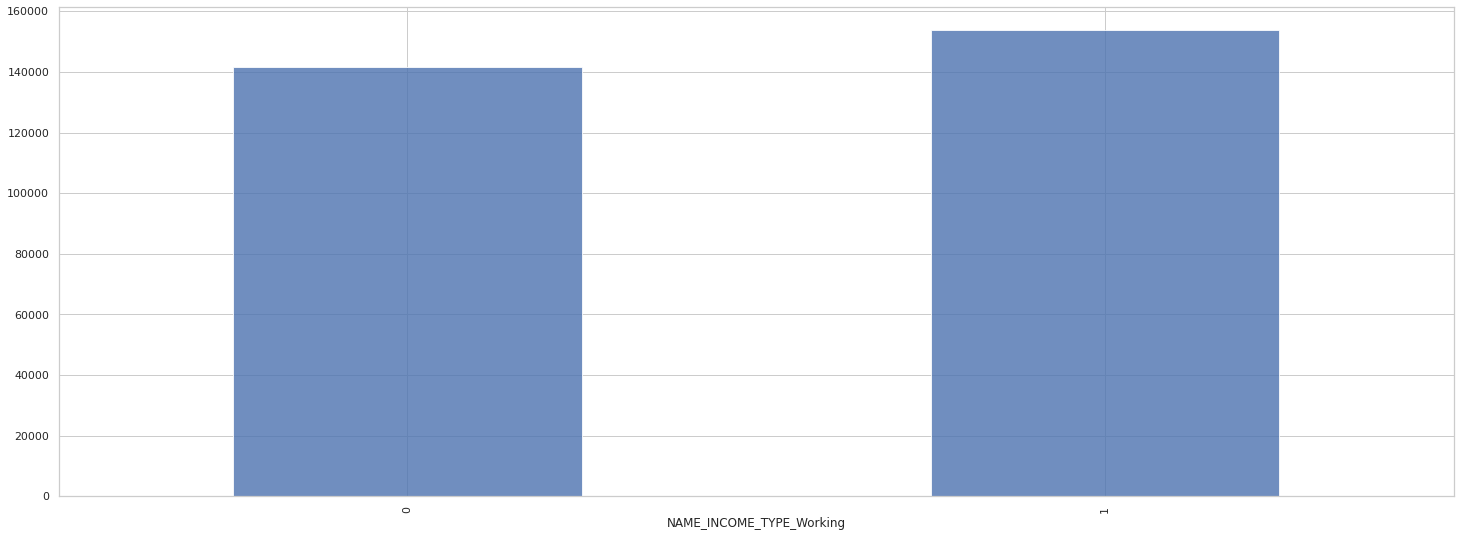

Participación de la categorías de NAME_EDUCATION_TYPE_Academic degree son: 
 NAME_EDUCATION_TYPE_Academic degree
0    99.951569
1     0.048431
Name: SK_ID_CURR, dtype: float64 



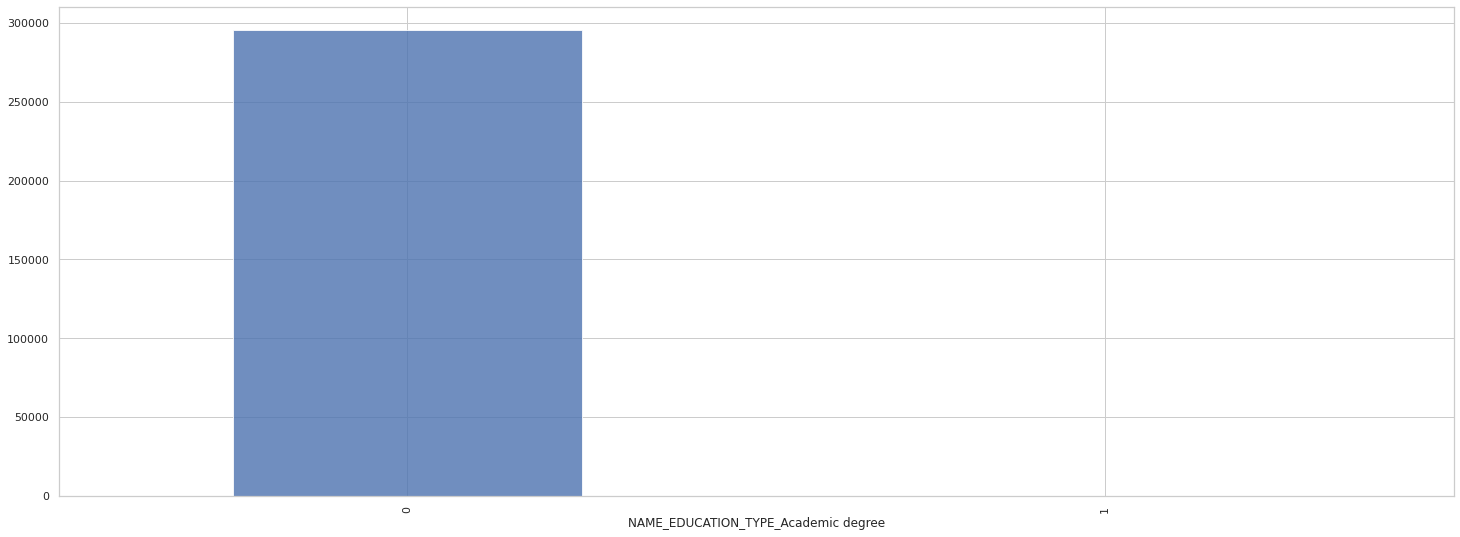

Participación de la categorías de NAME_EDUCATION_TYPE_Higher education son: 
 NAME_EDUCATION_TYPE_Higher education
0    76.480031
1    23.519969
Name: SK_ID_CURR, dtype: float64 



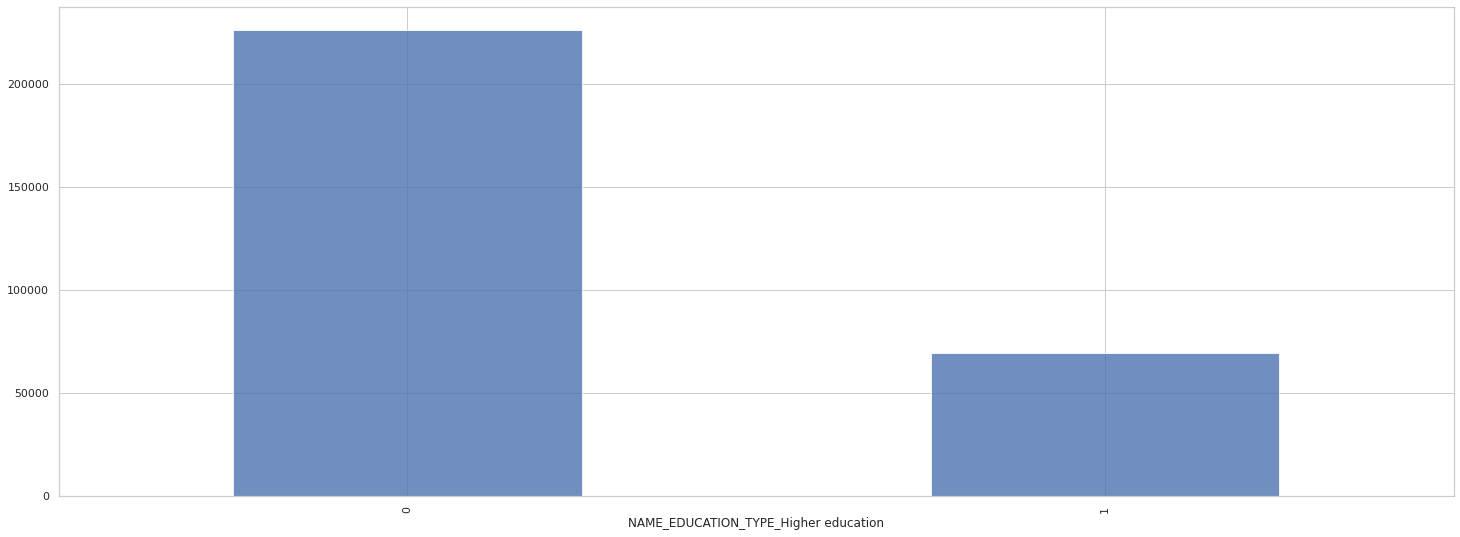

Participación de la categorías de NAME_EDUCATION_TYPE_Incomplete higher son: 
 NAME_EDUCATION_TYPE_Incomplete higher
0    96.679582
1     3.320418
Name: SK_ID_CURR, dtype: float64 



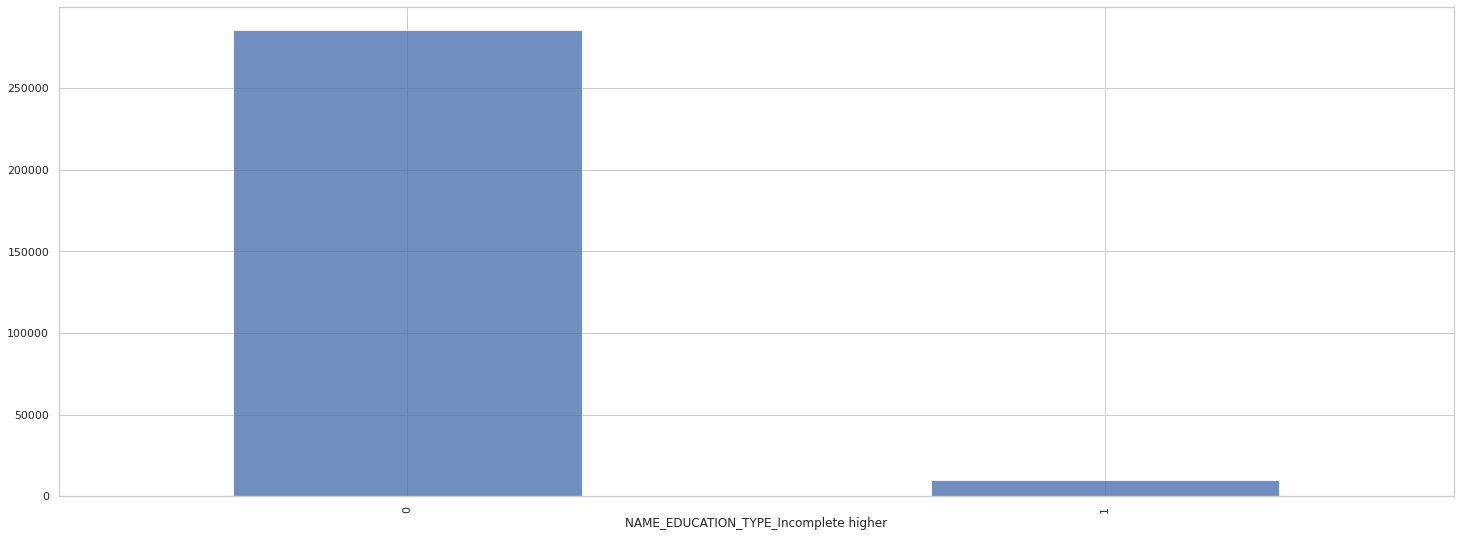

Participación de la categorías de NAME_EDUCATION_TYPE_Lower secondary son: 
 NAME_EDUCATION_TYPE_Lower secondary
0    98.736724
1     1.263276
Name: SK_ID_CURR, dtype: float64 



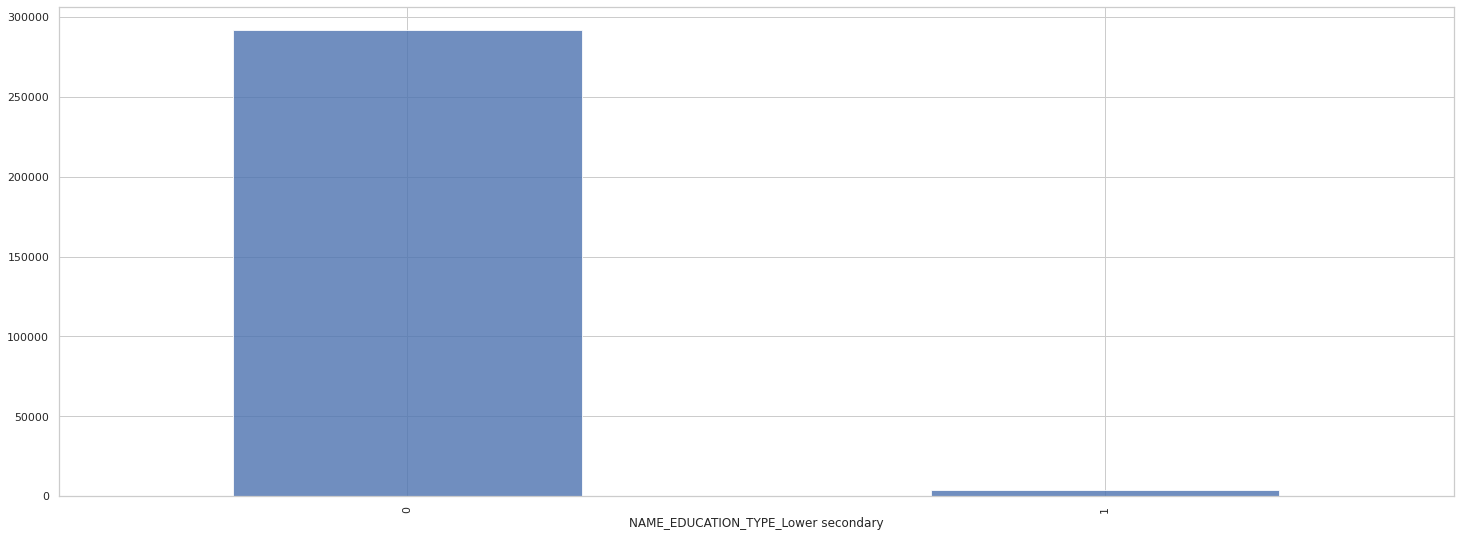

Participación de la categorías de NAME_EDUCATION_TYPE_Secondary / secondary special son: 
 NAME_EDUCATION_TYPE_Secondary / secondary special
0    28.152094
1    71.847906
Name: SK_ID_CURR, dtype: float64 



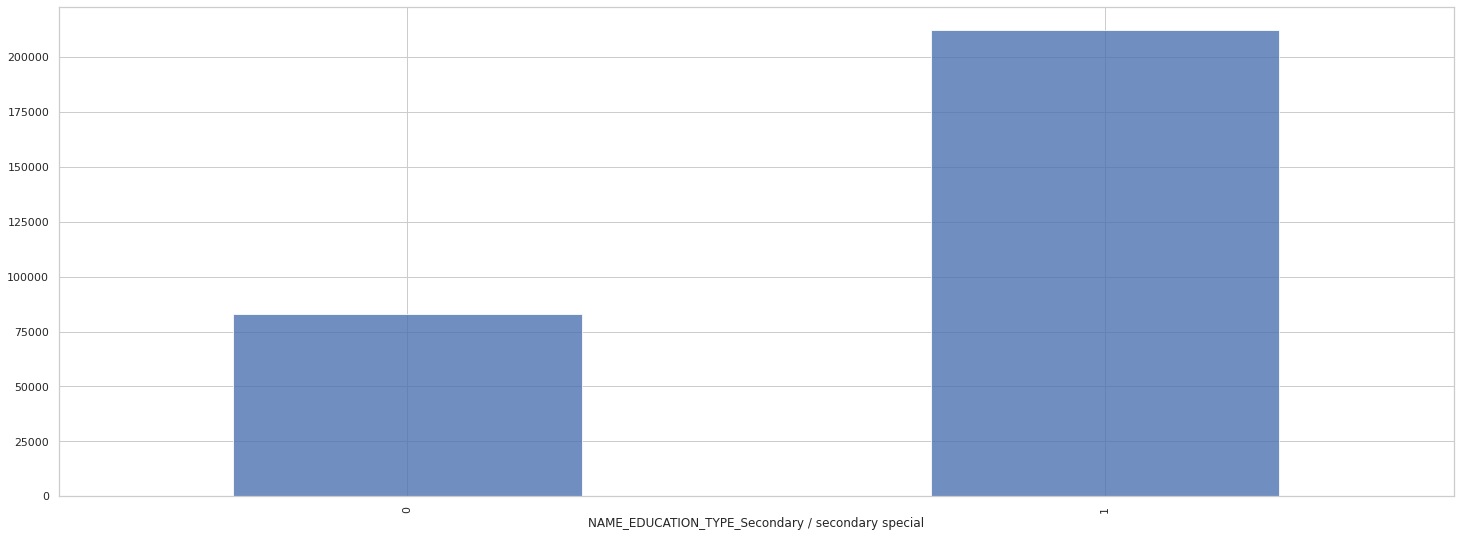

Participación de la categorías de NAME_HOUSING_TYPE_Co-op apartment son: 
 NAME_HOUSING_TYPE_Co-op apartment
0    99.6305
1     0.3695
Name: SK_ID_CURR, dtype: float64 



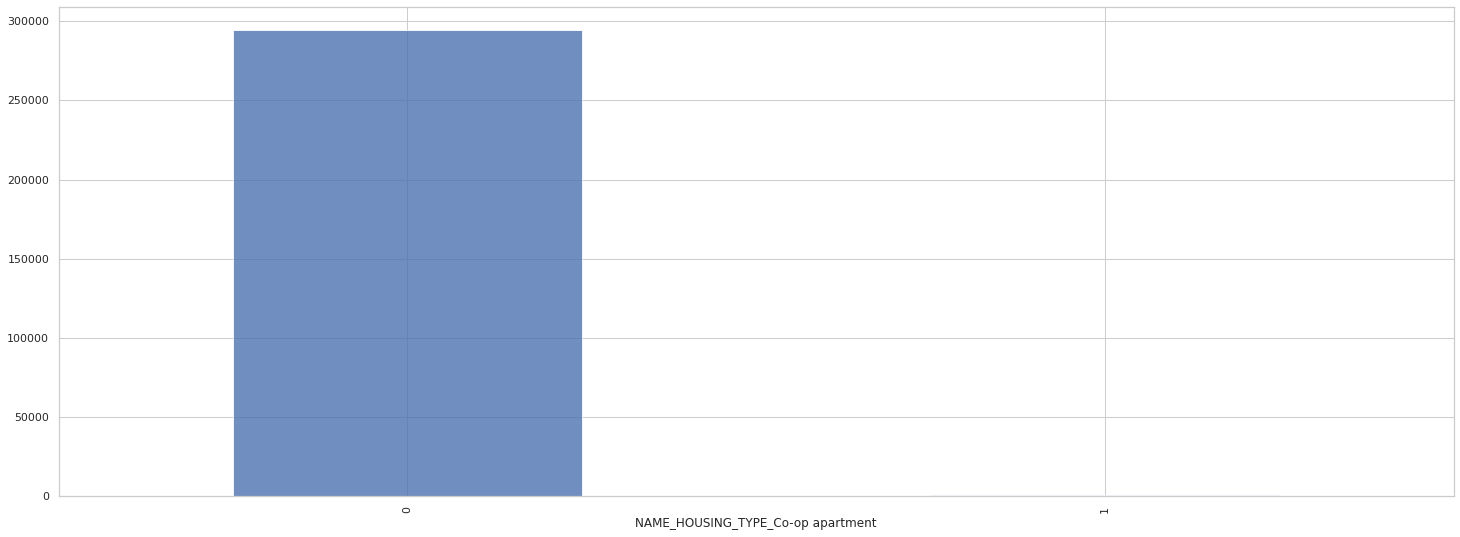

Participación de la categorías de NAME_HOUSING_TYPE_House / apartment son: 
 NAME_HOUSING_TYPE_House / apartment
0    11.313265
1    88.686735
Name: SK_ID_CURR, dtype: float64 



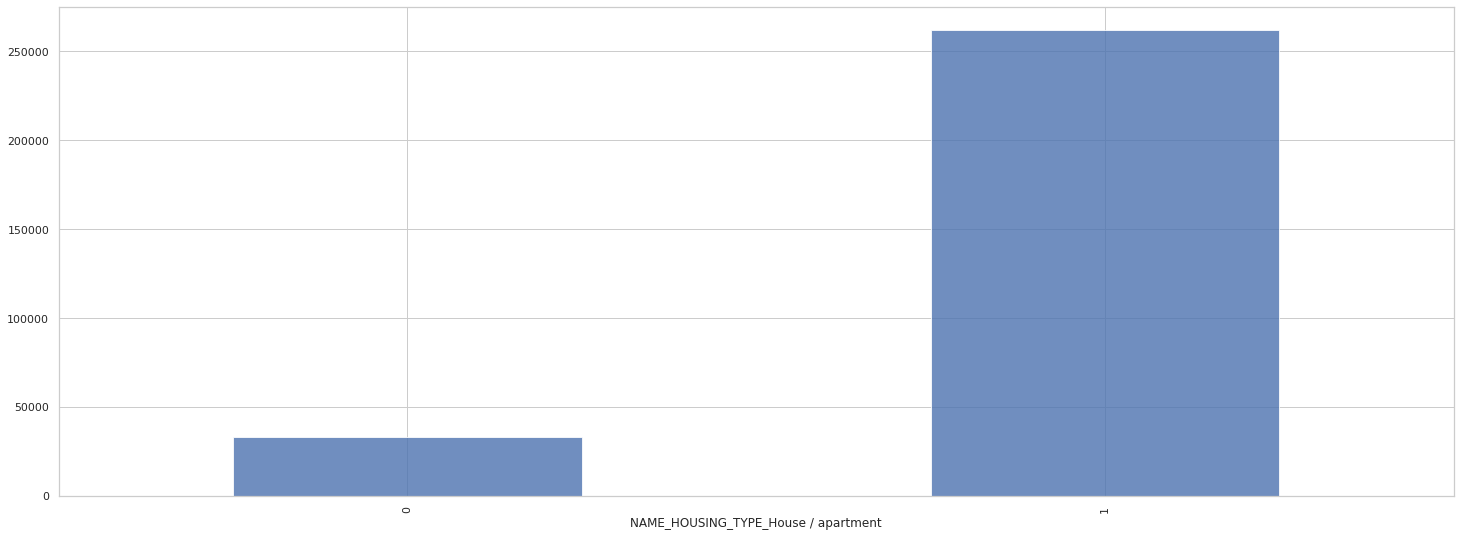

Participación de la categorías de NAME_HOUSING_TYPE_Municipal apartment son: 
 NAME_HOUSING_TYPE_Municipal apartment
0    96.348014
1     3.651986
Name: SK_ID_CURR, dtype: float64 



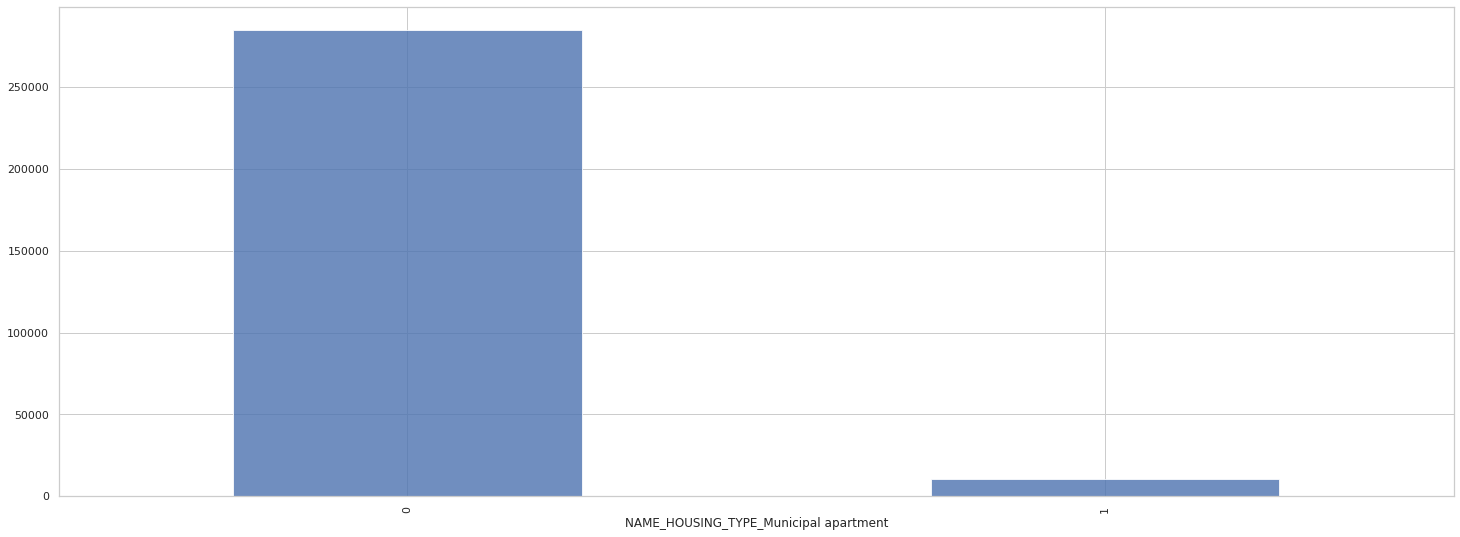

Participación de la categorías de NAME_HOUSING_TYPE_Office apartment son: 
 NAME_HOUSING_TYPE_Office apartment
0    99.16109
1     0.83891
Name: SK_ID_CURR, dtype: float64 



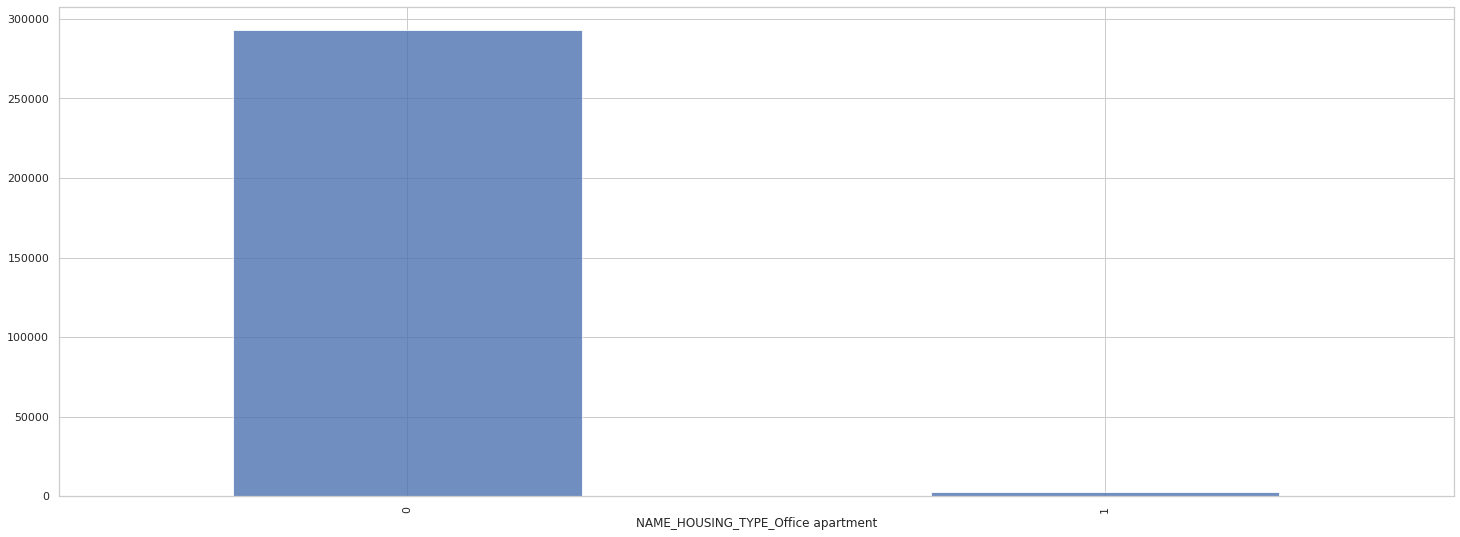

Participación de la categorías de NAME_HOUSING_TYPE_Rented apartment son: 
 NAME_HOUSING_TYPE_Rented apartment
0    98.41193
1     1.58807
Name: SK_ID_CURR, dtype: float64 



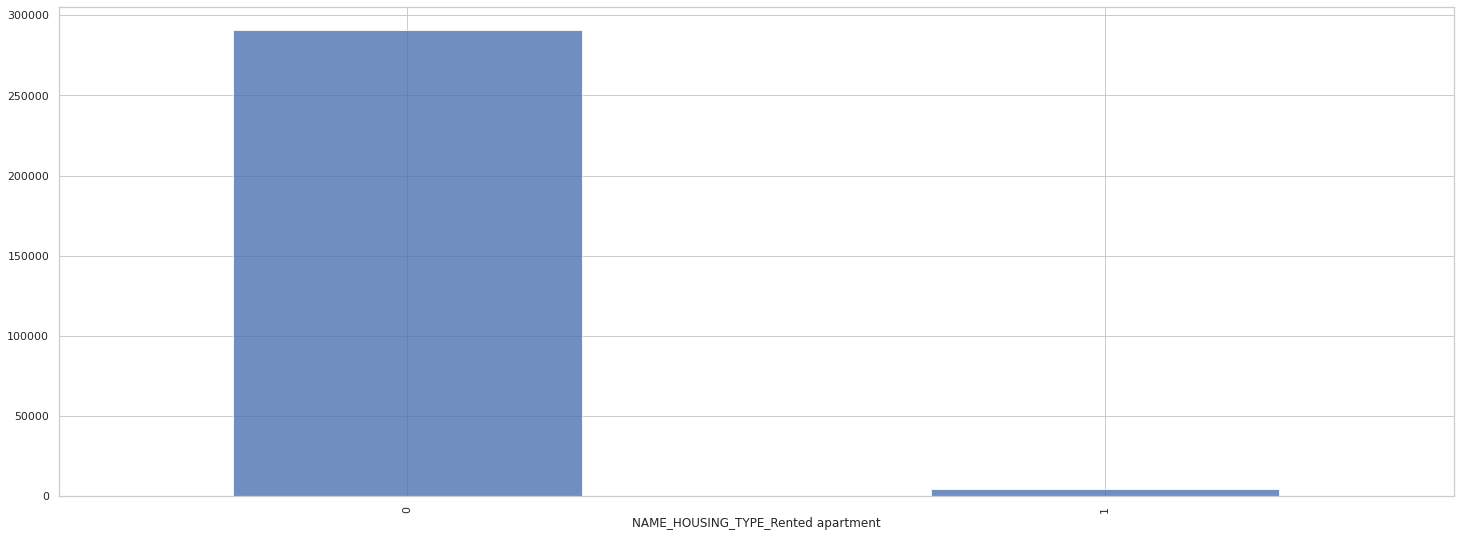

Participación de la categorías de NAME_HOUSING_TYPE_With parents son: 
 NAME_HOUSING_TYPE_With parents
0    95.135201
1     4.864799
Name: SK_ID_CURR, dtype: float64 



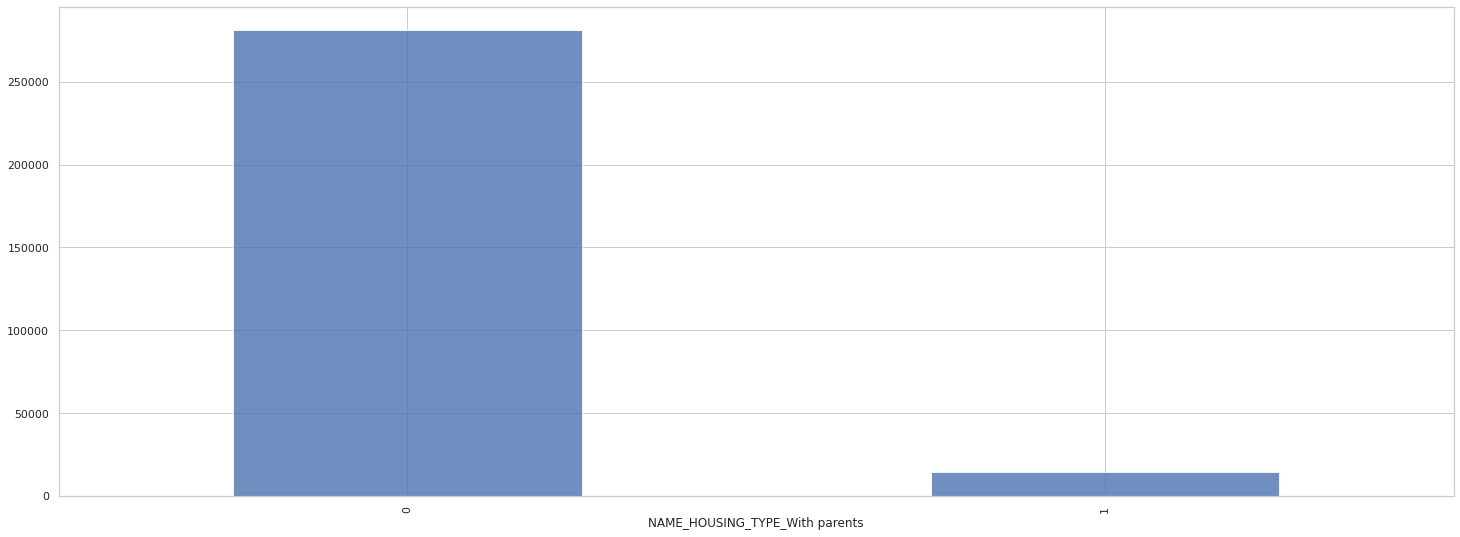

Participación de la categorías de OCCUPATION_TYPE_Accountants son: 
 OCCUPATION_TYPE_Accountants
0    96.862469
1     3.137531
Name: SK_ID_CURR, dtype: float64 



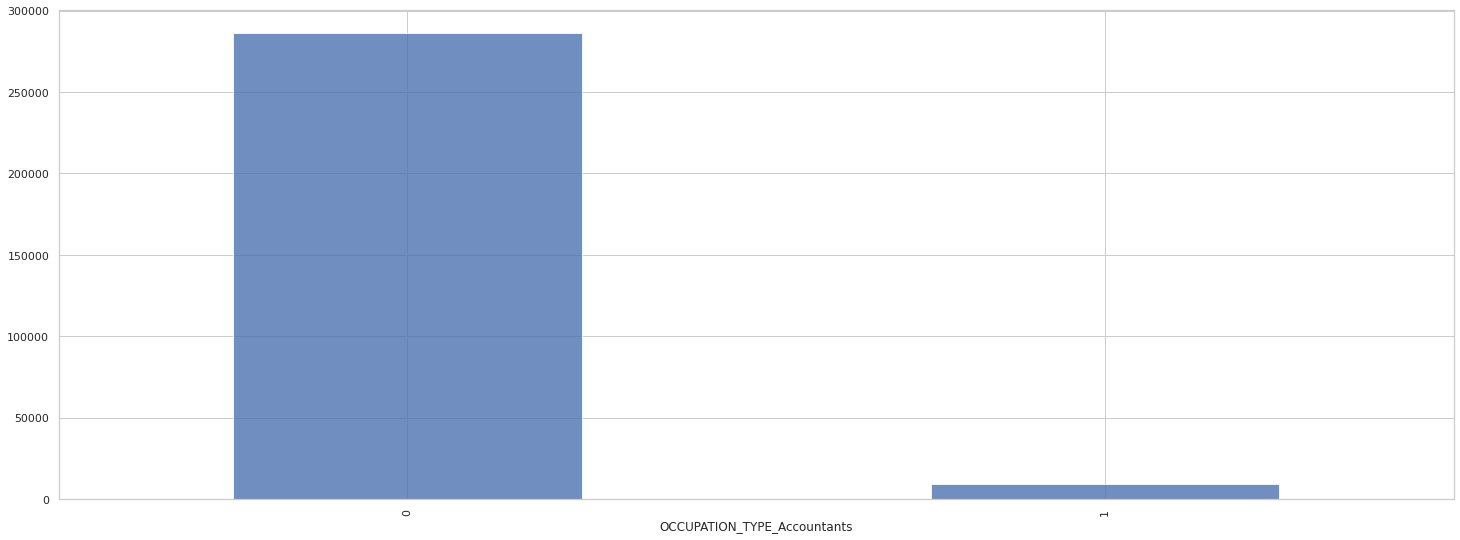

Participación de la categorías de OCCUPATION_TYPE_Cleaning staff son: 
 OCCUPATION_TYPE_Cleaning staff
0    98.455958
1     1.544042
Name: SK_ID_CURR, dtype: float64 



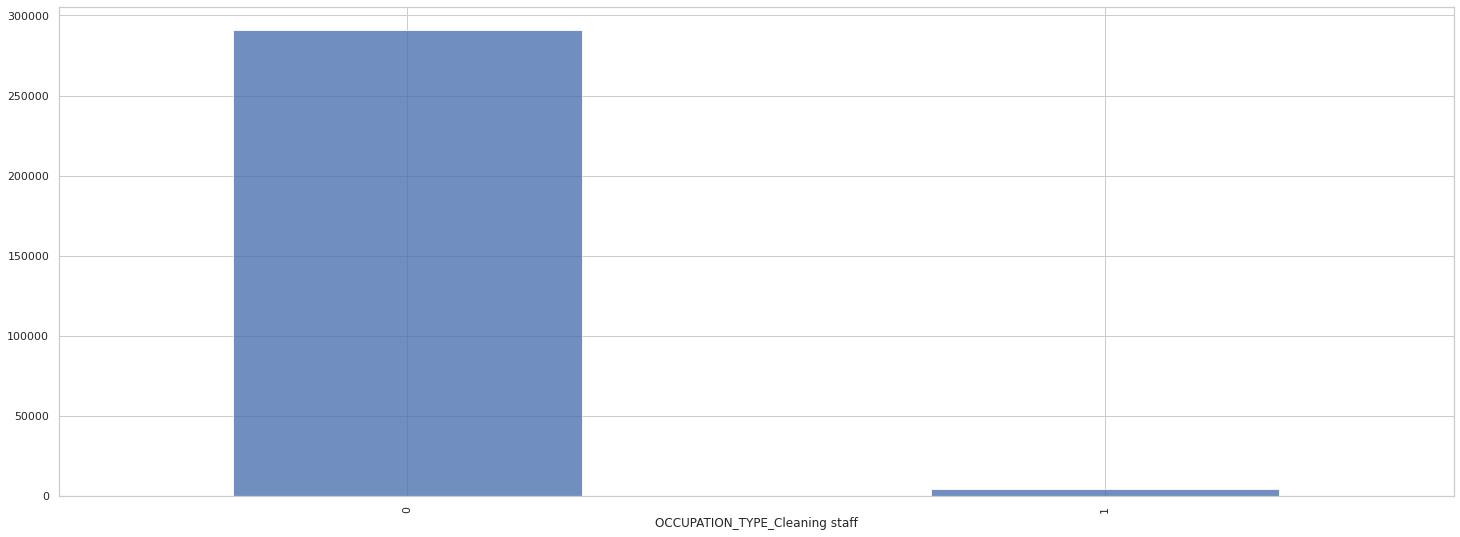

Participación de la categorías de OCCUPATION_TYPE_Cooking staff son: 
 OCCUPATION_TYPE_Cooking staff
0    98.034302
1     1.965698
Name: SK_ID_CURR, dtype: float64 



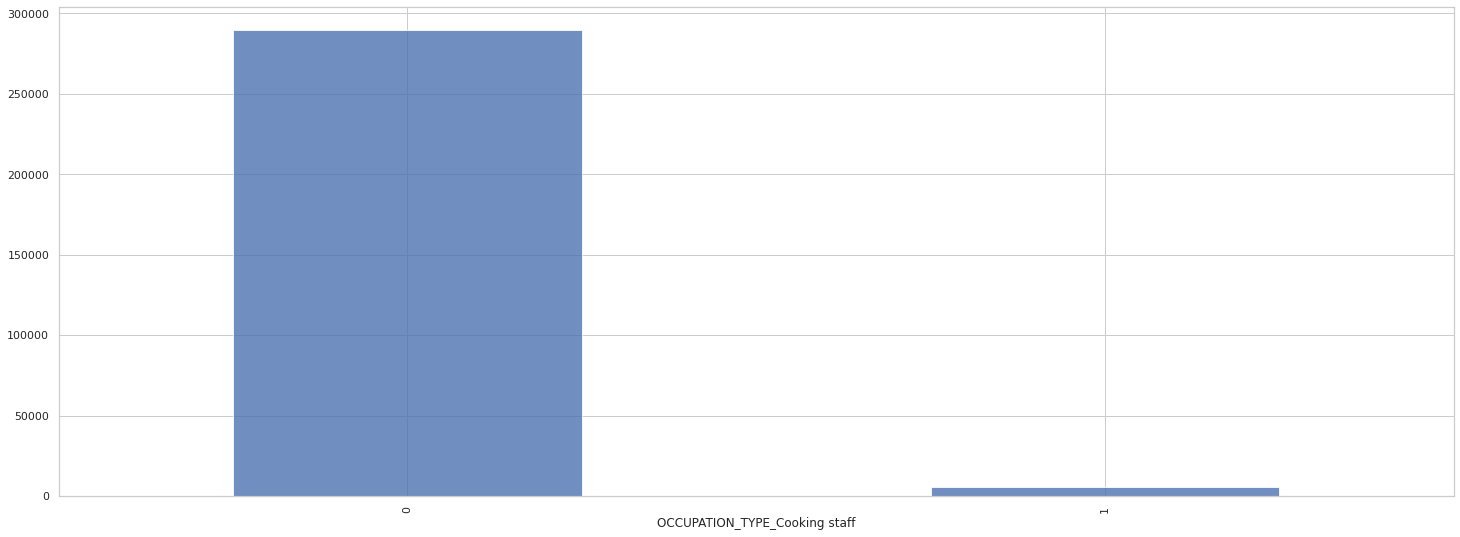

Participación de la categorías de OCCUPATION_TYPE_Core staff son: 
 OCCUPATION_TYPE_Core staff
0    91.053091
1     8.946909
Name: SK_ID_CURR, dtype: float64 



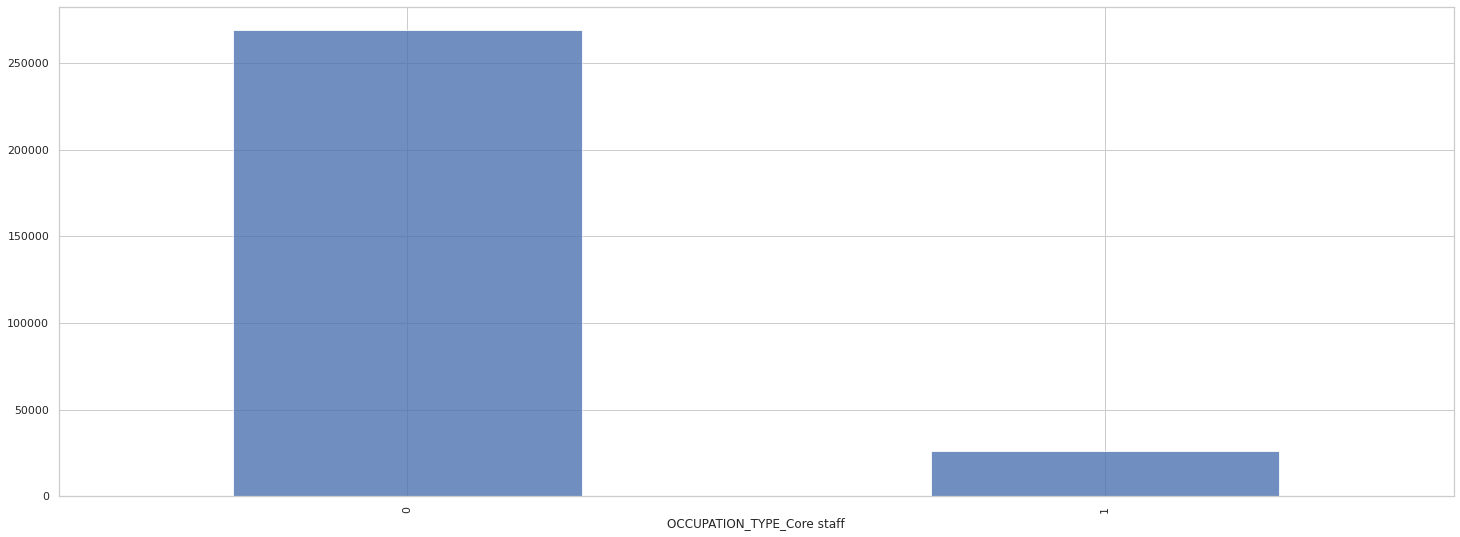

Participación de la categorías de OCCUPATION_TYPE_Drivers son: 
 OCCUPATION_TYPE_Drivers
0    93.918324
1     6.081676
Name: SK_ID_CURR, dtype: float64 



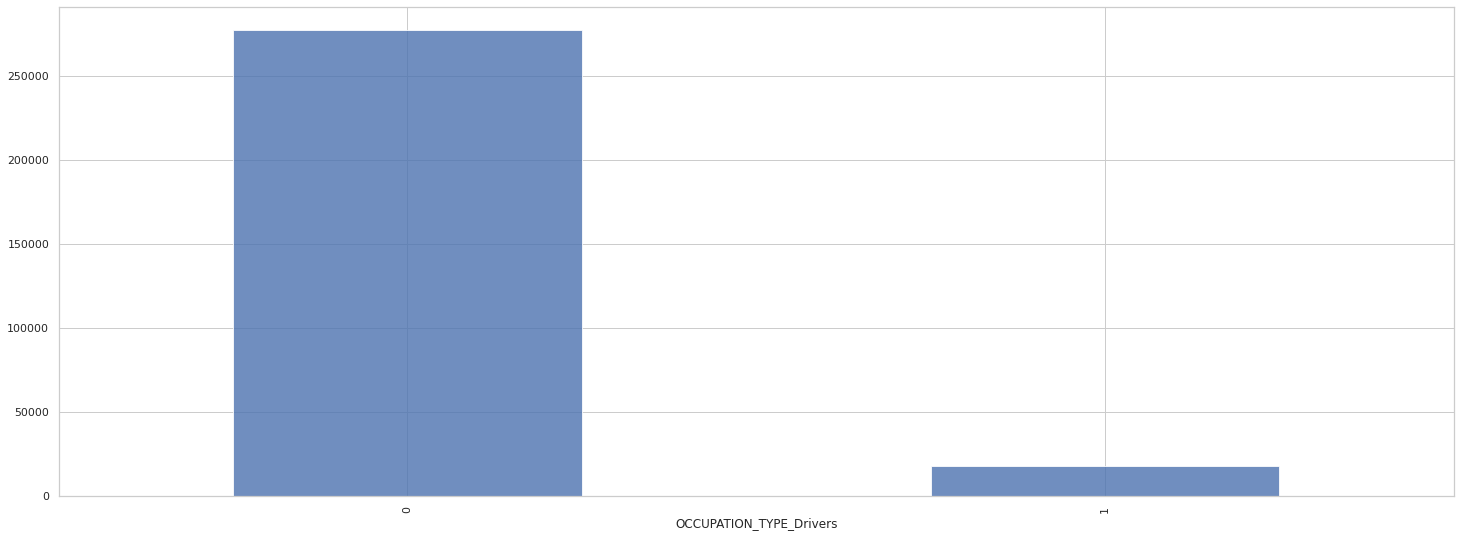

Participación de la categorías de OCCUPATION_TYPE_HR staff son: 
 OCCUPATION_TYPE_HR staff
0    99.819822
1     0.180178
Name: SK_ID_CURR, dtype: float64 



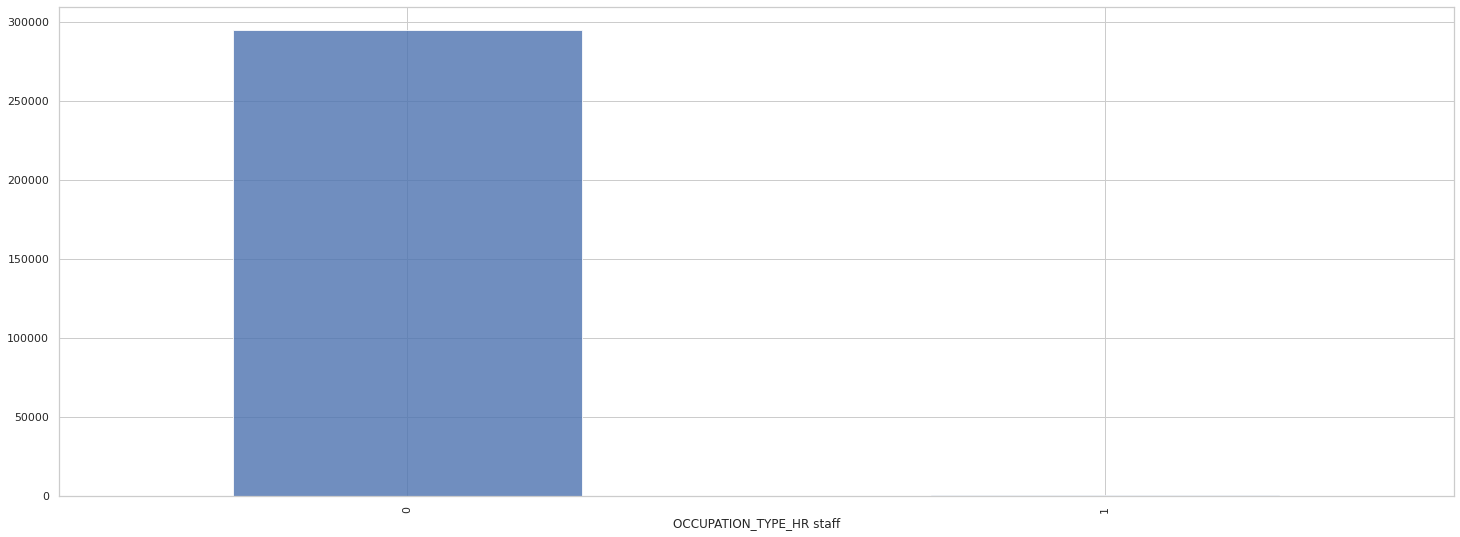

Participación de la categorías de OCCUPATION_TYPE_High skill tech staff son: 
 OCCUPATION_TYPE_High skill tech staff
0    96.311098
1     3.688902
Name: SK_ID_CURR, dtype: float64 



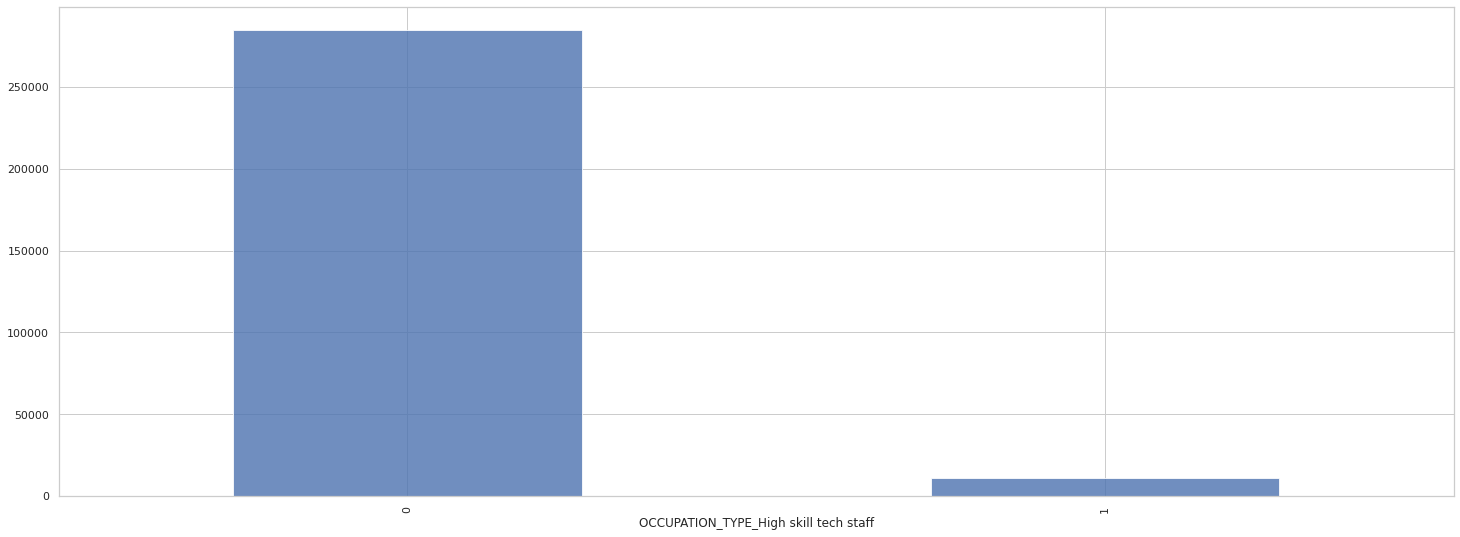

Participación de la categorías de OCCUPATION_TYPE_IT staff son: 
 OCCUPATION_TYPE_IT staff
0    99.836756
1     0.163244
Name: SK_ID_CURR, dtype: float64 



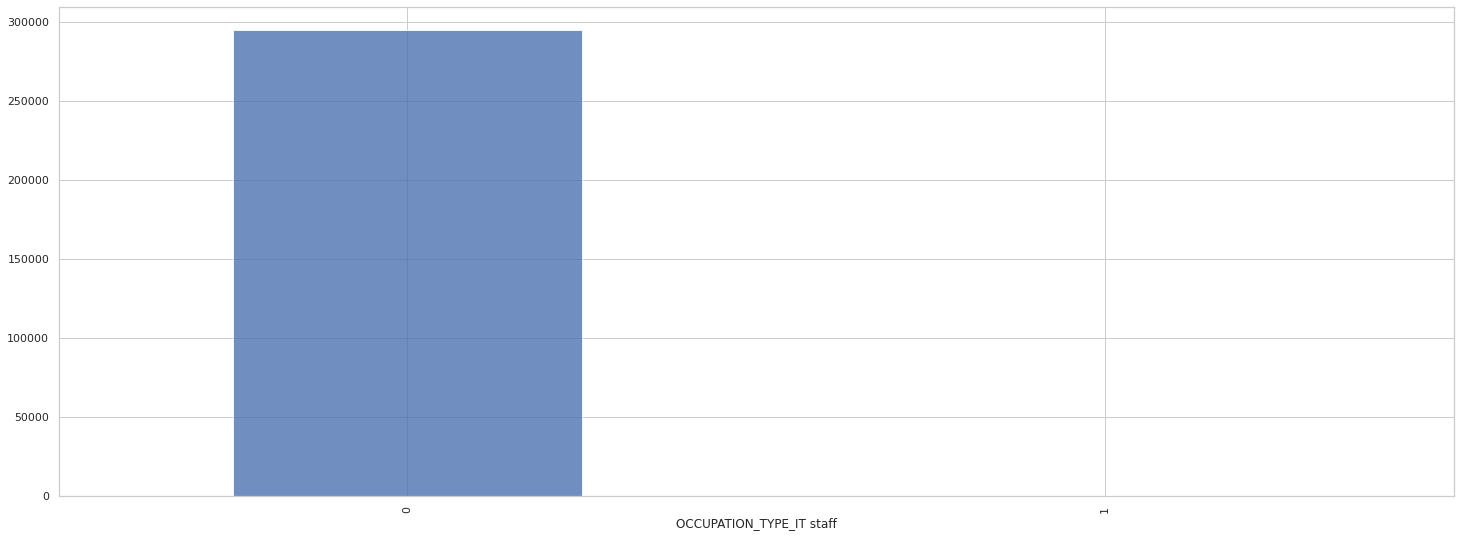

Participación de la categorías de OCCUPATION_TYPE_Laborers son: 
 OCCUPATION_TYPE_Laborers
0    81.788162
1    18.211838
Name: SK_ID_CURR, dtype: float64 



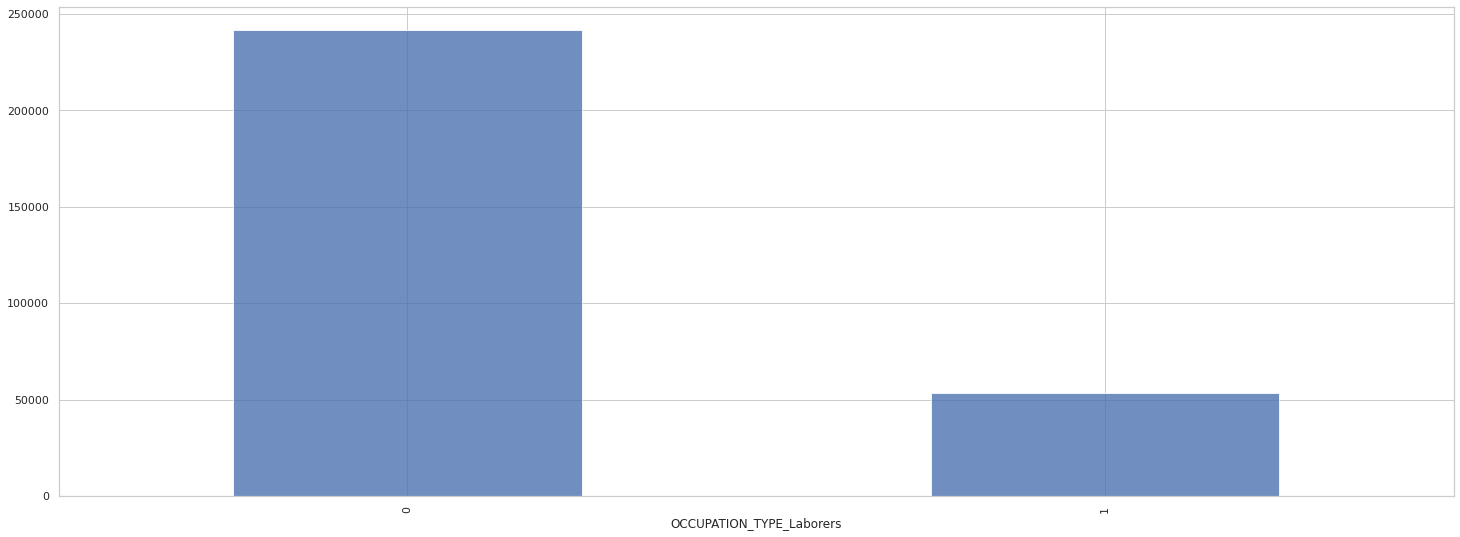

Participación de la categorías de OCCUPATION_TYPE_Low-skill Laborers son: 
 OCCUPATION_TYPE_Low-skill Laborers
0    99.305029
1     0.694971
Name: SK_ID_CURR, dtype: float64 



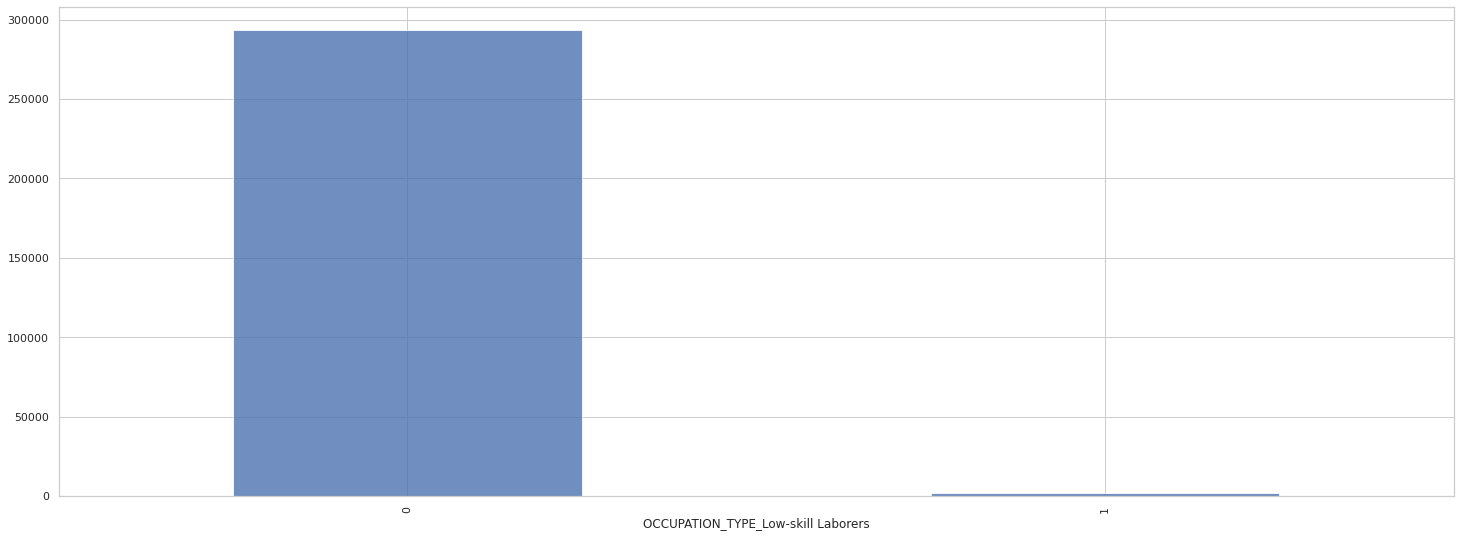

Participación de la categorías de OCCUPATION_TYPE_Managers son: 
 OCCUPATION_TYPE_Managers
0    93.720535
1     6.279465
Name: SK_ID_CURR, dtype: float64 



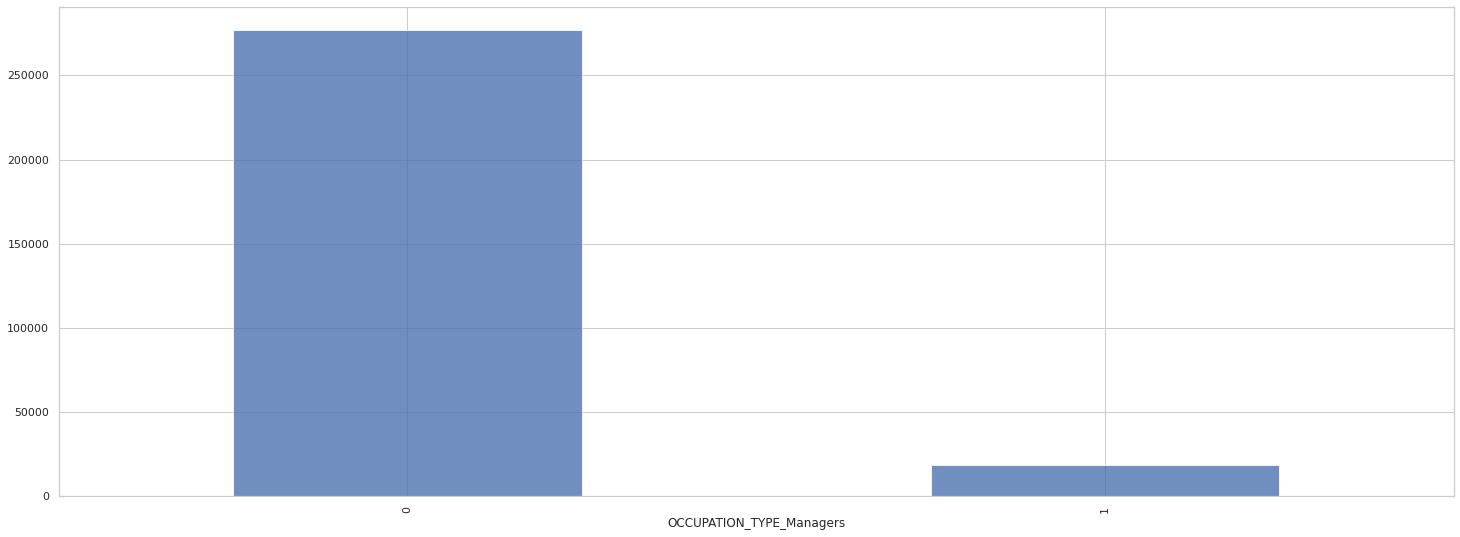

Participación de la categorías de OCCUPATION_TYPE_Medicine staff son: 
 OCCUPATION_TYPE_Medicine staff
0    97.185908
1     2.814092
Name: SK_ID_CURR, dtype: float64 



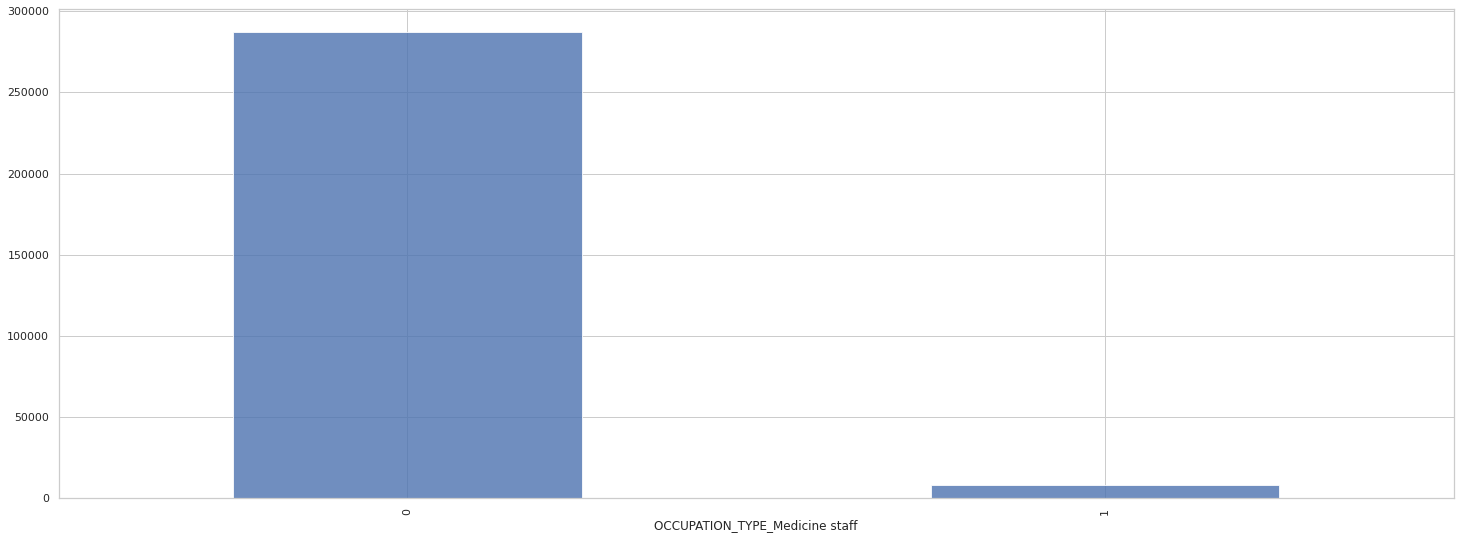

Participación de la categorías de OCCUPATION_TYPE_Private service staff son: 
 OCCUPATION_TYPE_Private service staff
0    99.139414
1     0.860586
Name: SK_ID_CURR, dtype: float64 



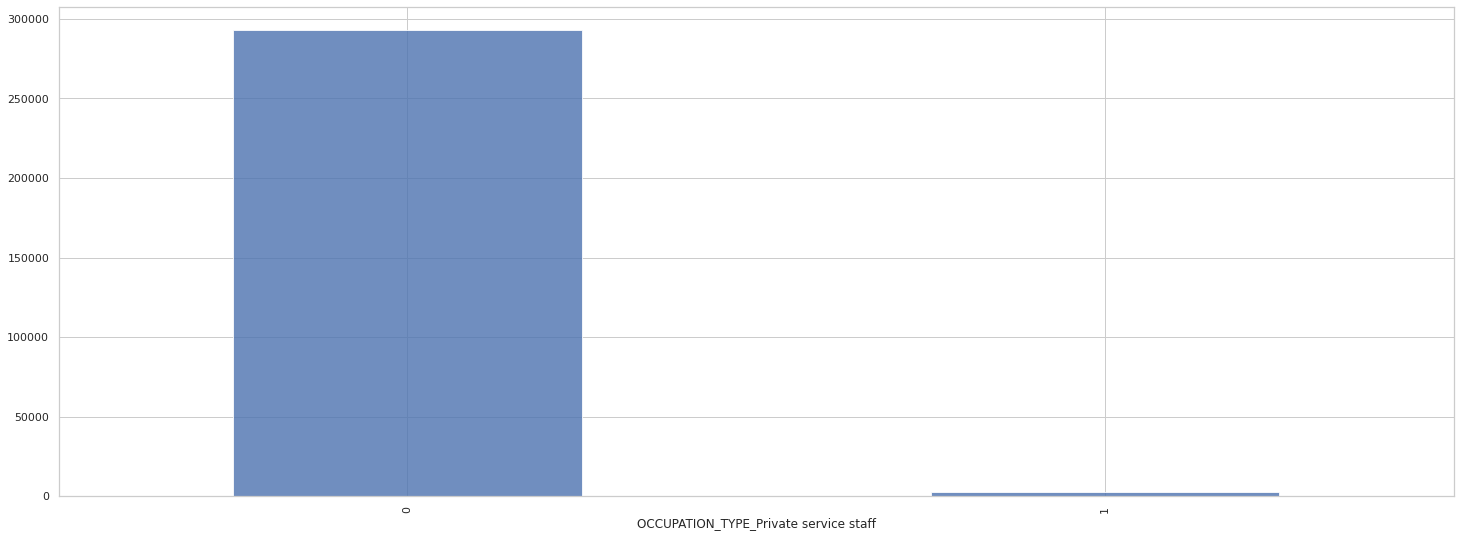

Participación de la categorías de OCCUPATION_TYPE_Realty agents son: 
 OCCUPATION_TYPE_Realty agents
0    99.755134
1     0.244866
Name: SK_ID_CURR, dtype: float64 



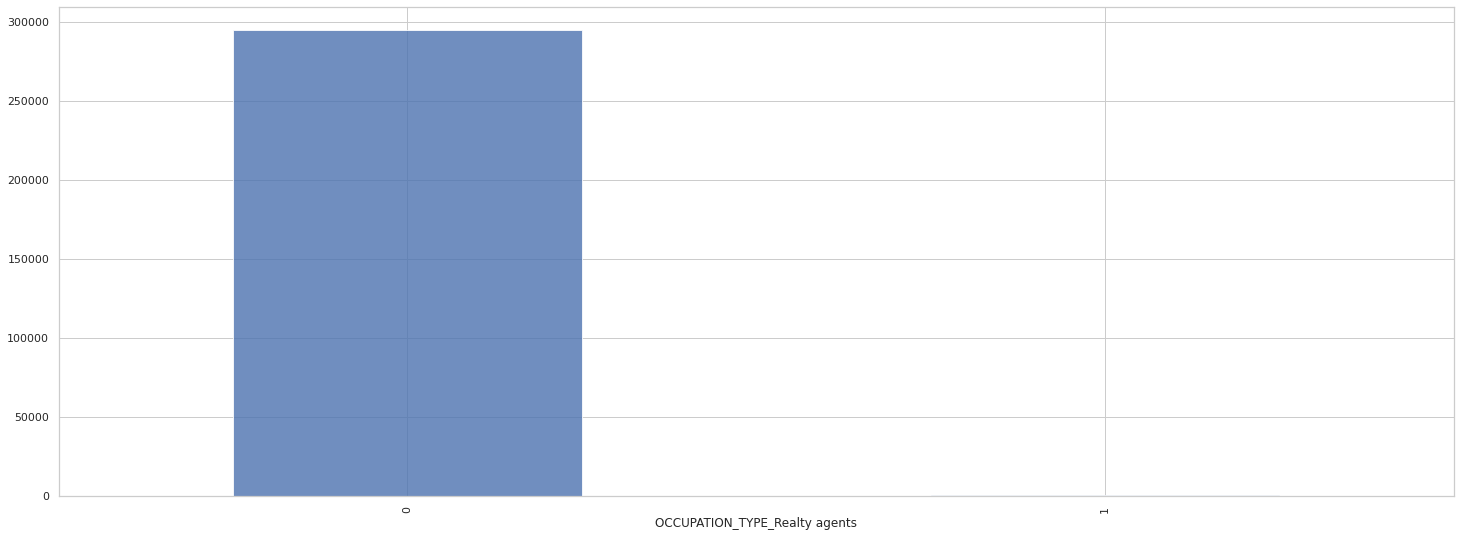

Participación de la categorías de OCCUPATION_TYPE_Sales staff son: 
 OCCUPATION_TYPE_Sales staff
0    89.421331
1    10.578669
Name: SK_ID_CURR, dtype: float64 



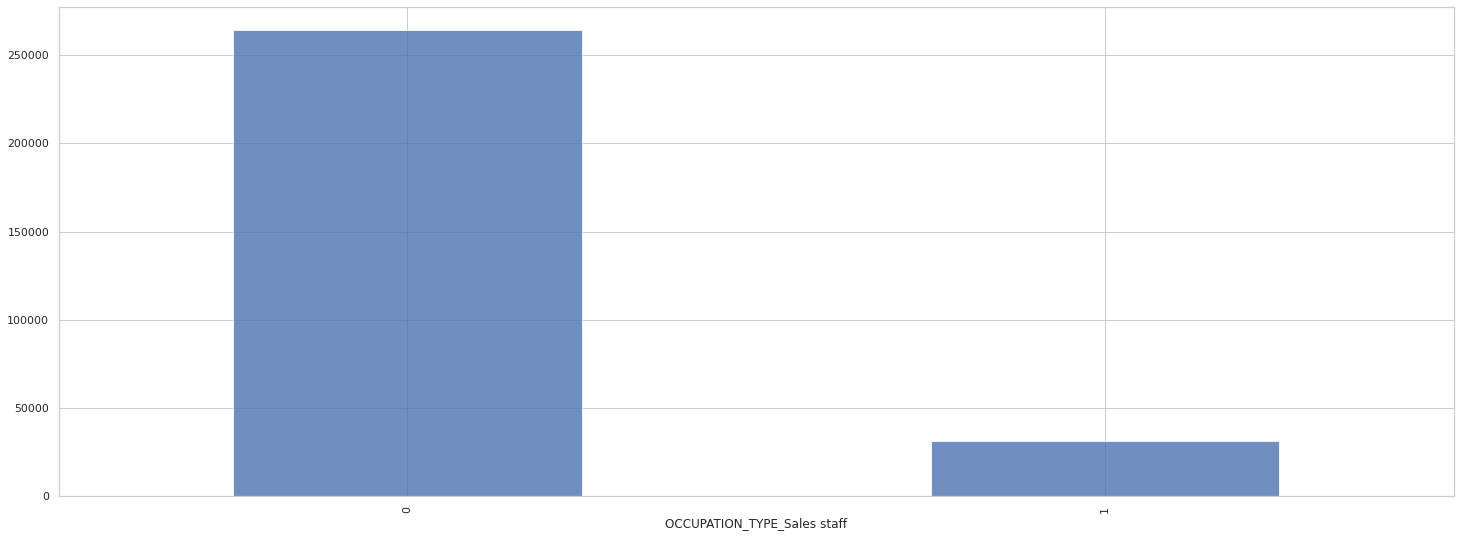

Participación de la categorías de OCCUPATION_TYPE_Secretaries son: 
 OCCUPATION_TYPE_Secretaries
0    99.573263
1     0.426737
Name: SK_ID_CURR, dtype: float64 



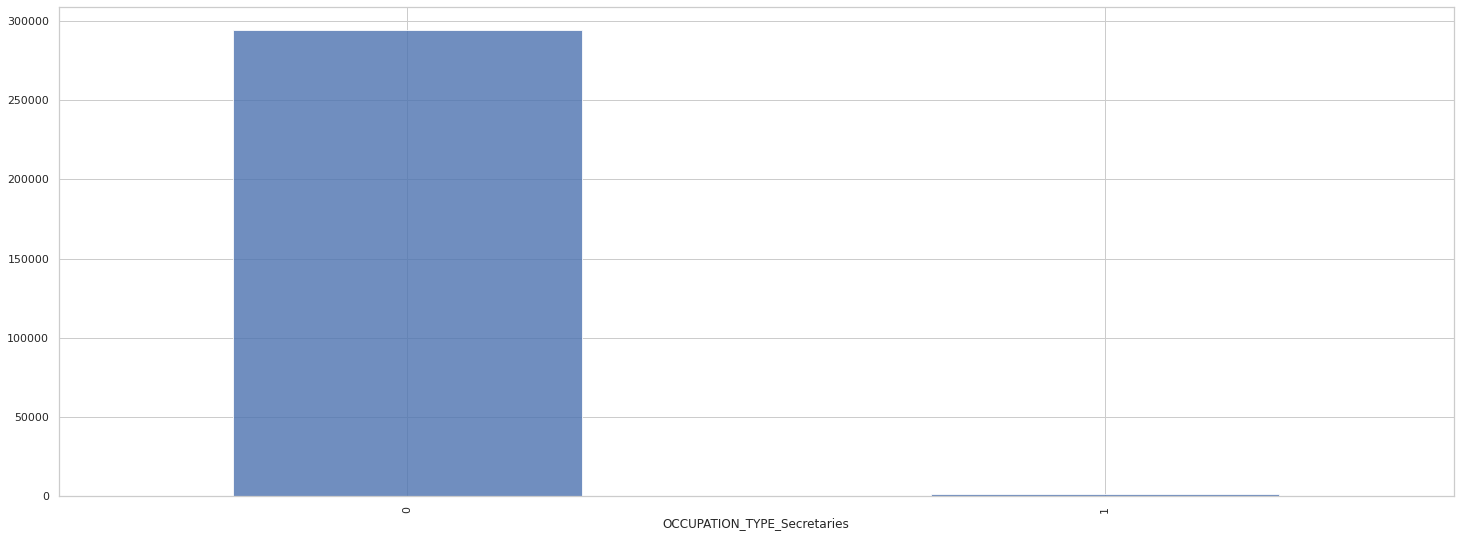

Participación de la categorías de OCCUPATION_TYPE_Security staff son: 
 OCCUPATION_TYPE_Security staff
0    97.774873
1     2.225127
Name: SK_ID_CURR, dtype: float64 



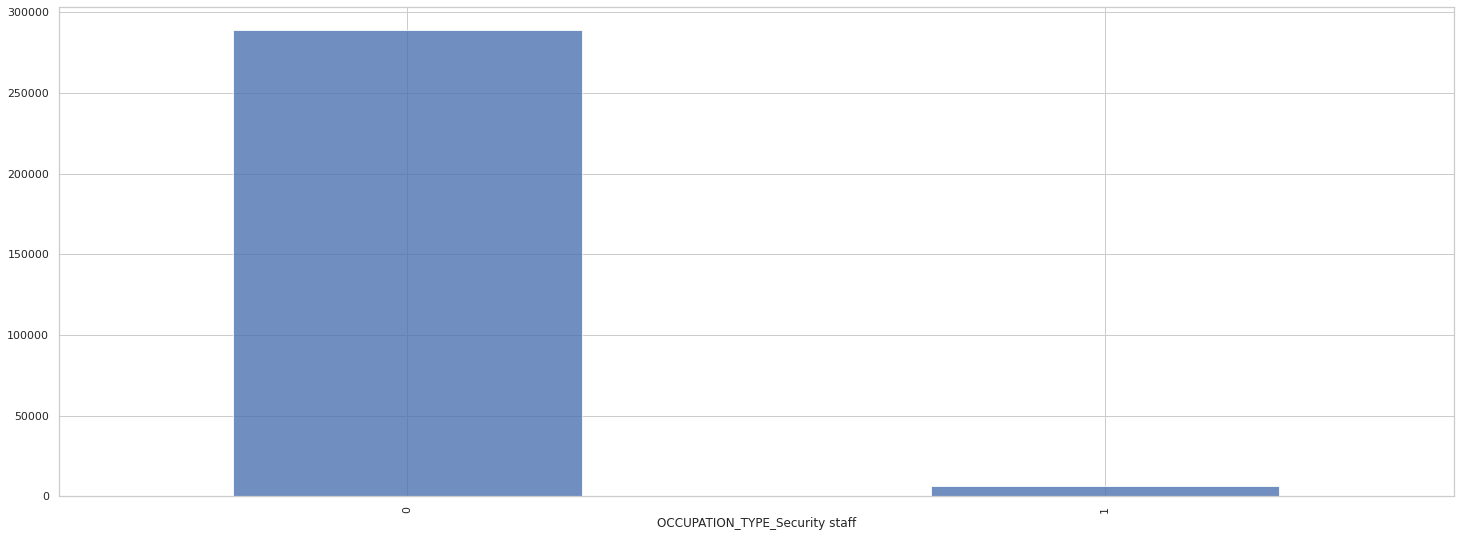

Participación de la categorías de OCCUPATION_TYPE_Waiters/barmen staff son: 
 OCCUPATION_TYPE_Waiters/barmen staff
0    99.553958
1     0.446042
Name: SK_ID_CURR, dtype: float64 



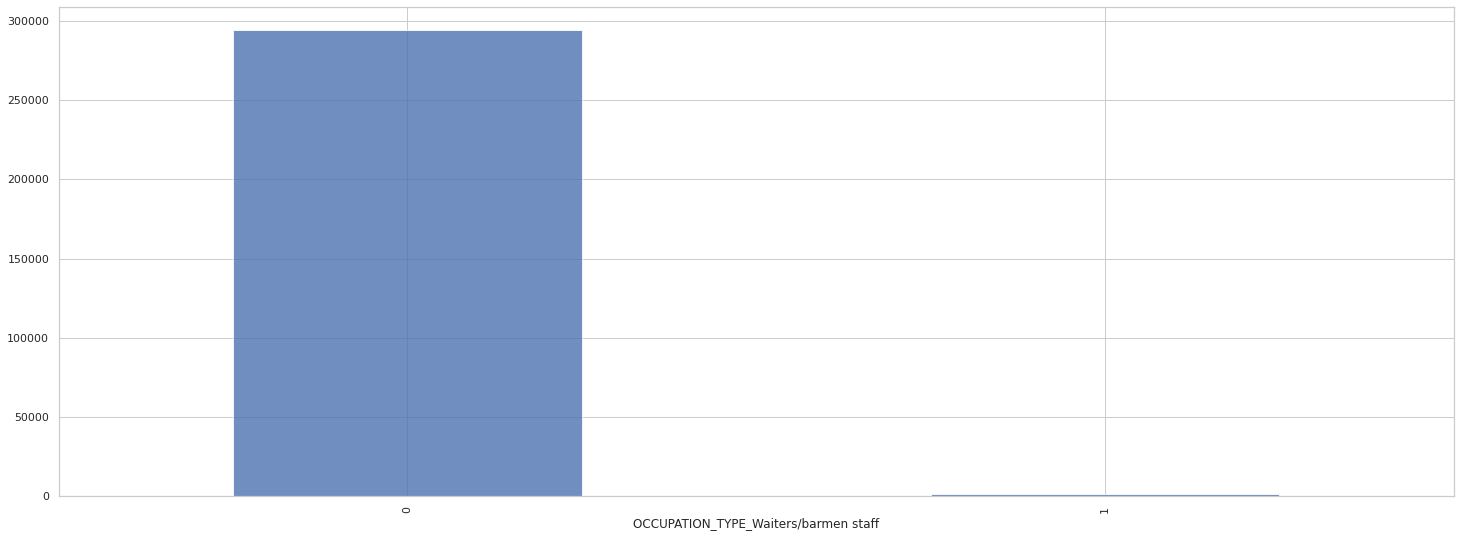

Participación de la categorías de FONDKAPREMONT_MODE_not specified son: 
 FONDKAPREMONT_MODE_not specified
0    98.162661
1     1.837339
Name: SK_ID_CURR, dtype: float64 



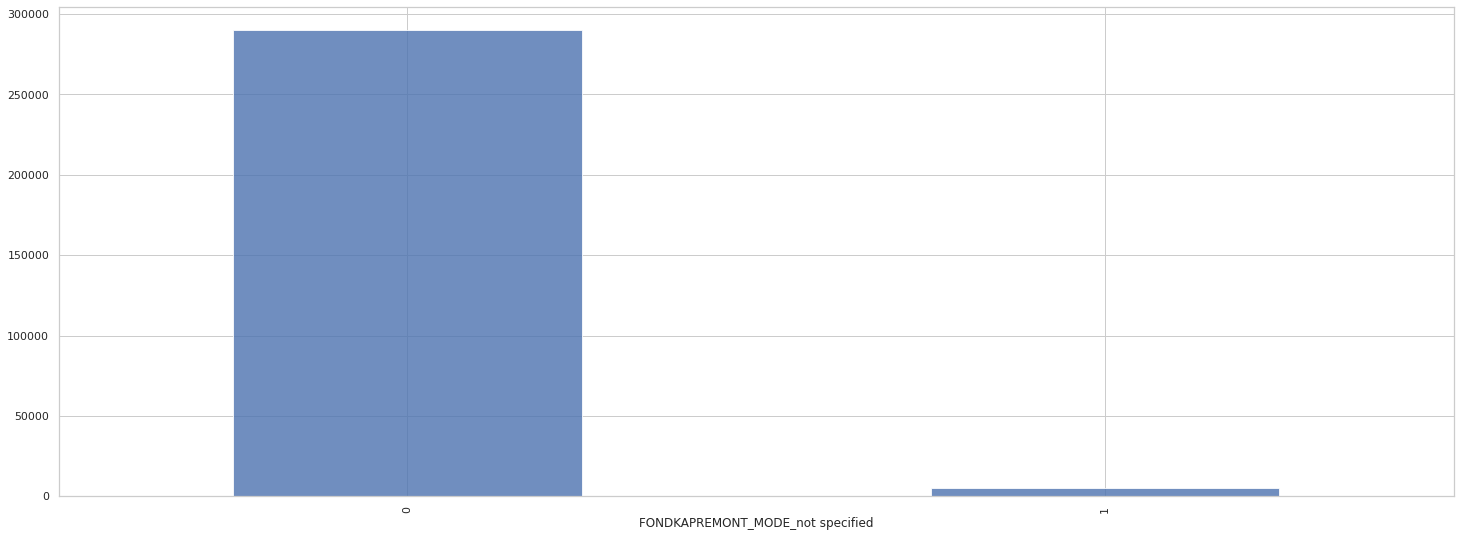

Participación de la categorías de FONDKAPREMONT_MODE_org spec account son: 
 FONDKAPREMONT_MODE_org spec account
0    98.223962
1     1.776038
Name: SK_ID_CURR, dtype: float64 



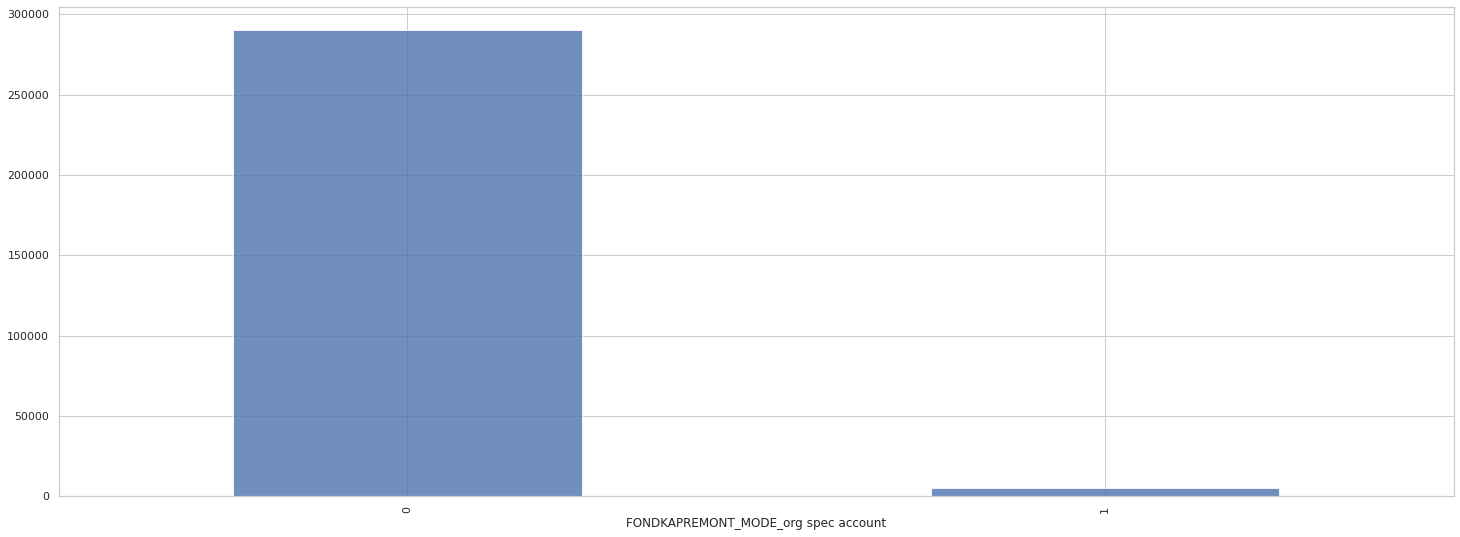

Participación de la categorías de FONDKAPREMONT_MODE_reg oper account son: 
 FONDKAPREMONT_MODE_reg oper account
0    76.278856
1    23.721144
Name: SK_ID_CURR, dtype: float64 



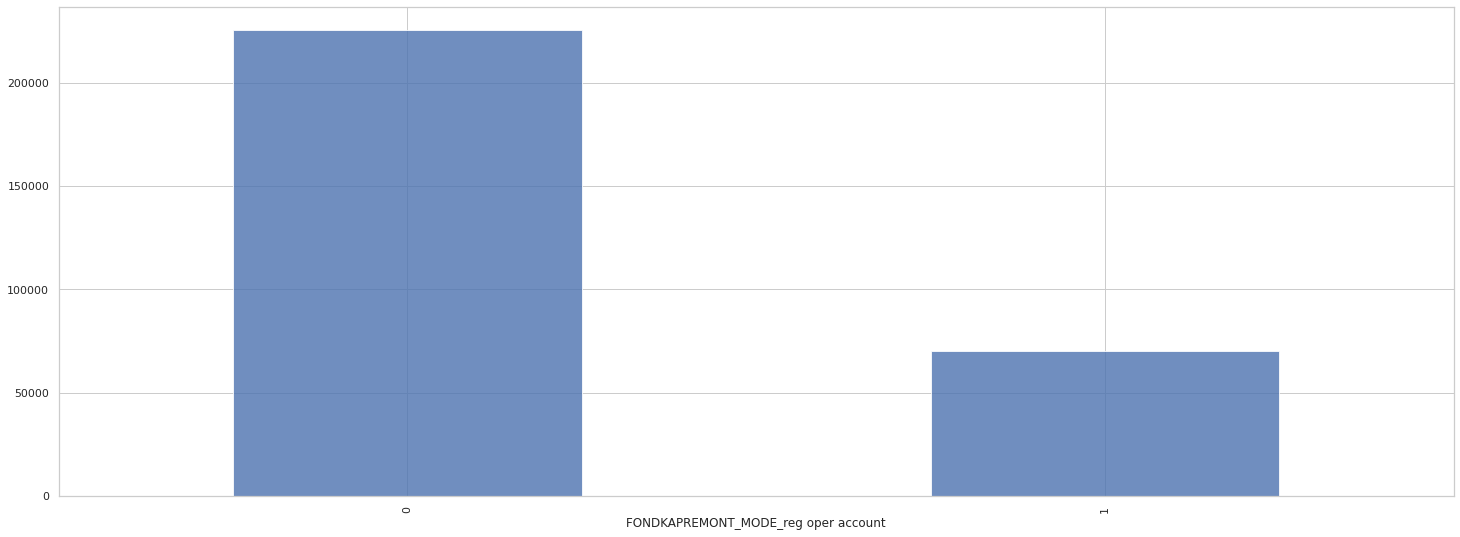

Participación de la categorías de FONDKAPREMONT_MODE_reg oper spec account son: 
 FONDKAPREMONT_MODE_reg oper spec account
0    96.090956
1     3.909044
Name: SK_ID_CURR, dtype: float64 



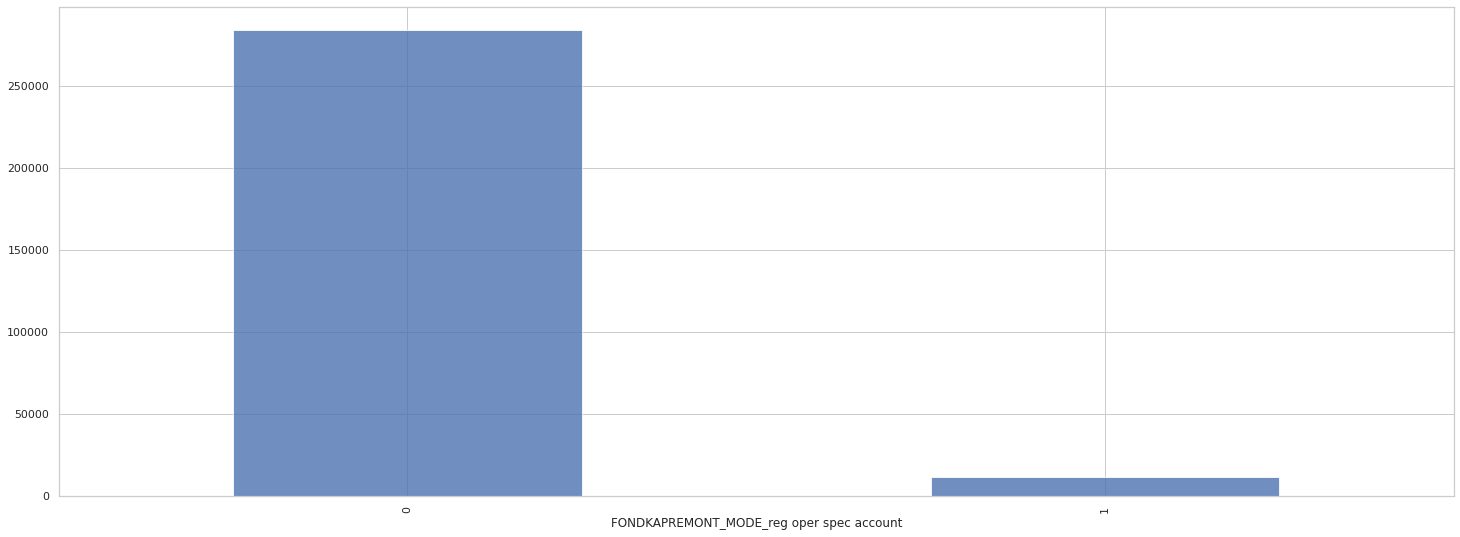

Participación de la categorías de HOUSETYPE_MODE_block of flats son: 
 HOUSETYPE_MODE_block of flats
0    51.471903
1    48.528097
Name: SK_ID_CURR, dtype: float64 



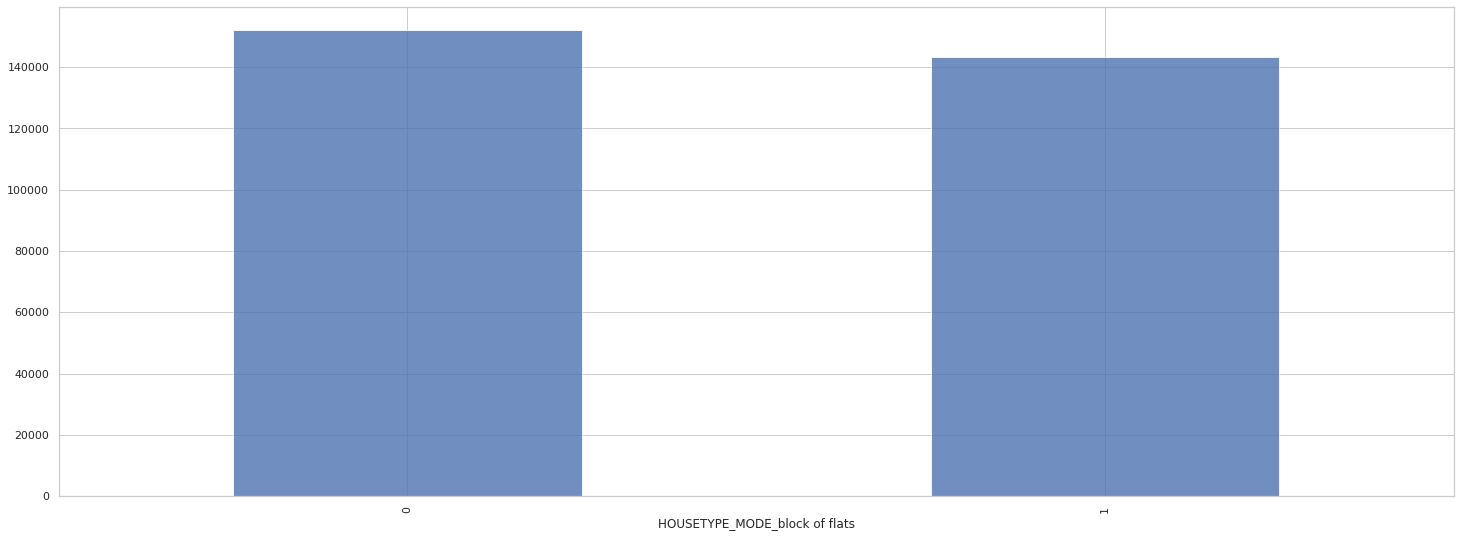

Participación de la categorías de HOUSETYPE_MODE_specific housing son: 
 HOUSETYPE_MODE_specific housing
0    99.50485
1     0.49515
Name: SK_ID_CURR, dtype: float64 



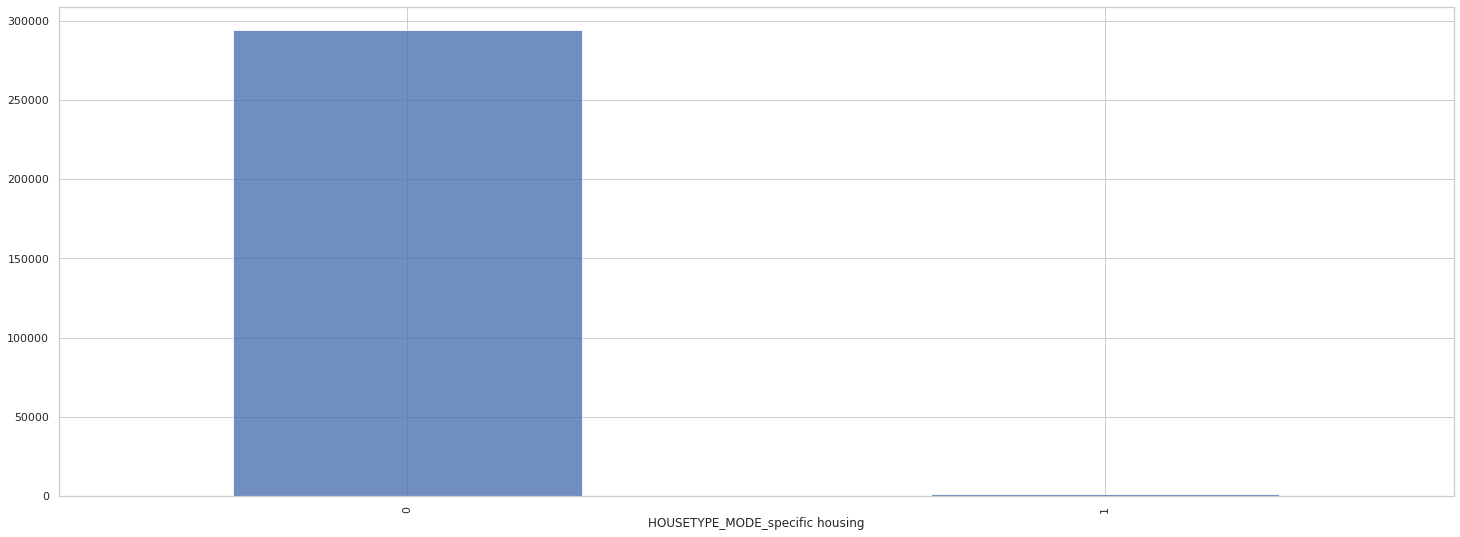

Participación de la categorías de HOUSETYPE_MODE_terraced house son: 
 HOUSETYPE_MODE_terraced house
0    99.608147
1     0.391853
Name: SK_ID_CURR, dtype: float64 



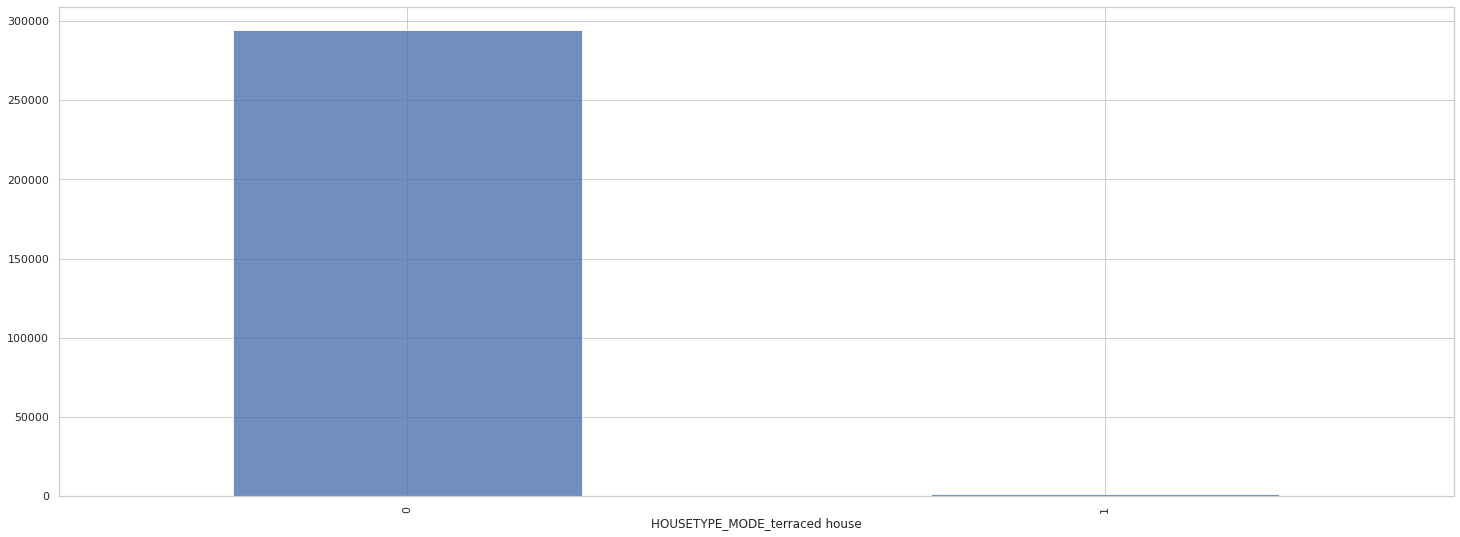

Participación de la categorías de WALLSMATERIAL_MODE_Block son: 
 WALLSMATERIAL_MODE_Block
0    97.036889
1     2.963111
Name: SK_ID_CURR, dtype: float64 



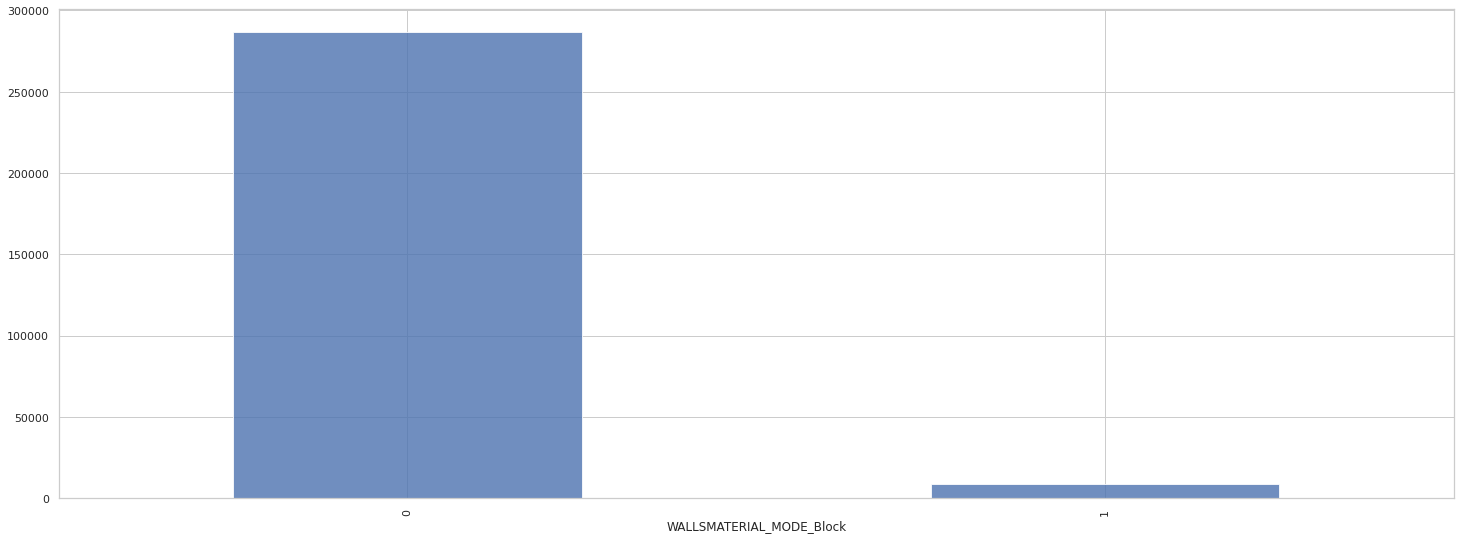

Participación de la categorías de WALLSMATERIAL_MODE_Mixed son: 
 WALLSMATERIAL_MODE_Mixed
0    99.262355
1     0.737645
Name: SK_ID_CURR, dtype: float64 



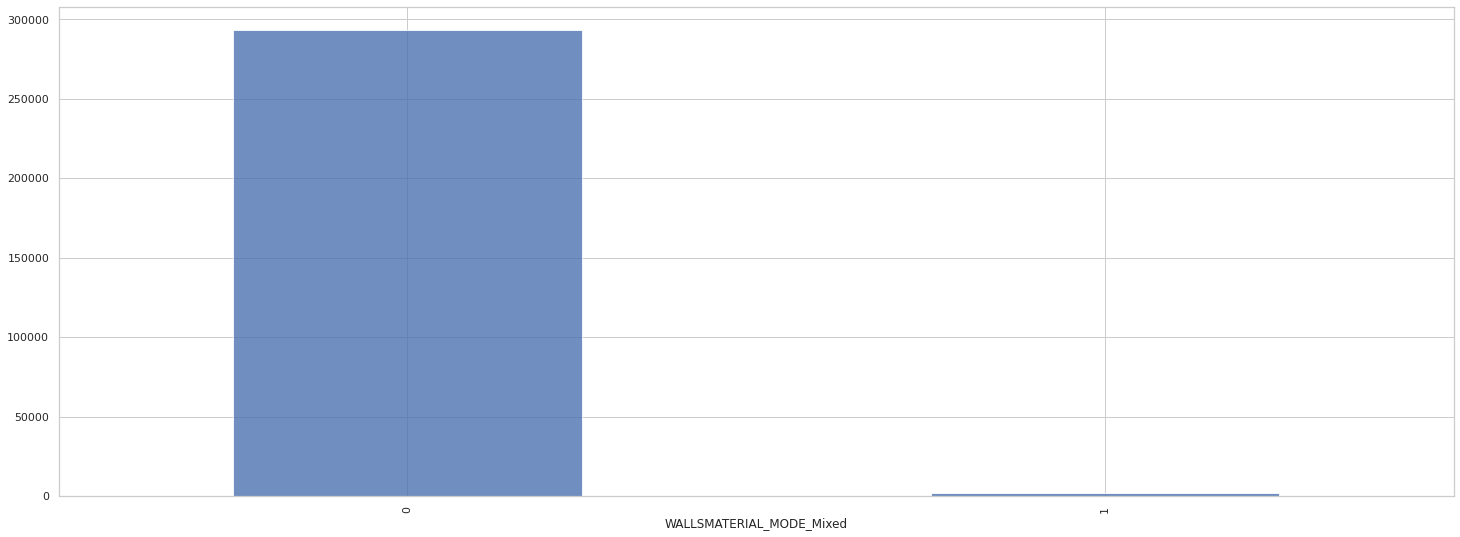

Participación de la categorías de WALLSMATERIAL_MODE_Monolithic son: 
 WALLSMATERIAL_MODE_Monolithic
0    99.462176
1     0.537824
Name: SK_ID_CURR, dtype: float64 



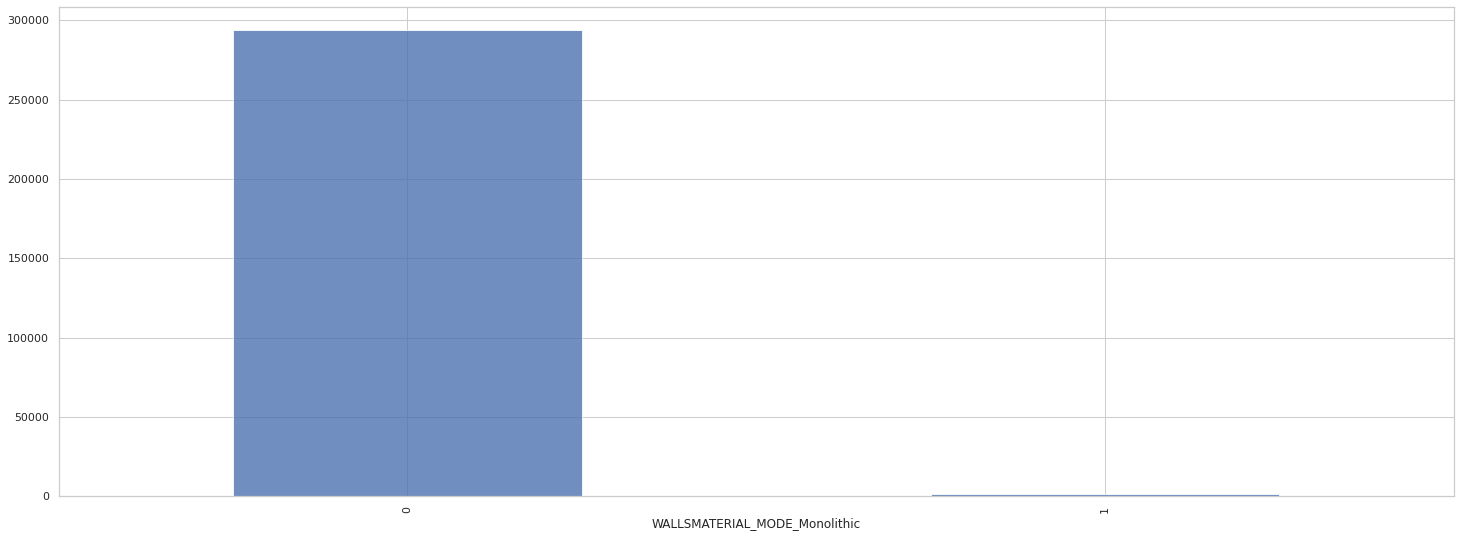

Participación de la categorías de WALLSMATERIAL_MODE_Others son: 
 WALLSMATERIAL_MODE_Others
0    99.475046
1     0.524954
Name: SK_ID_CURR, dtype: float64 



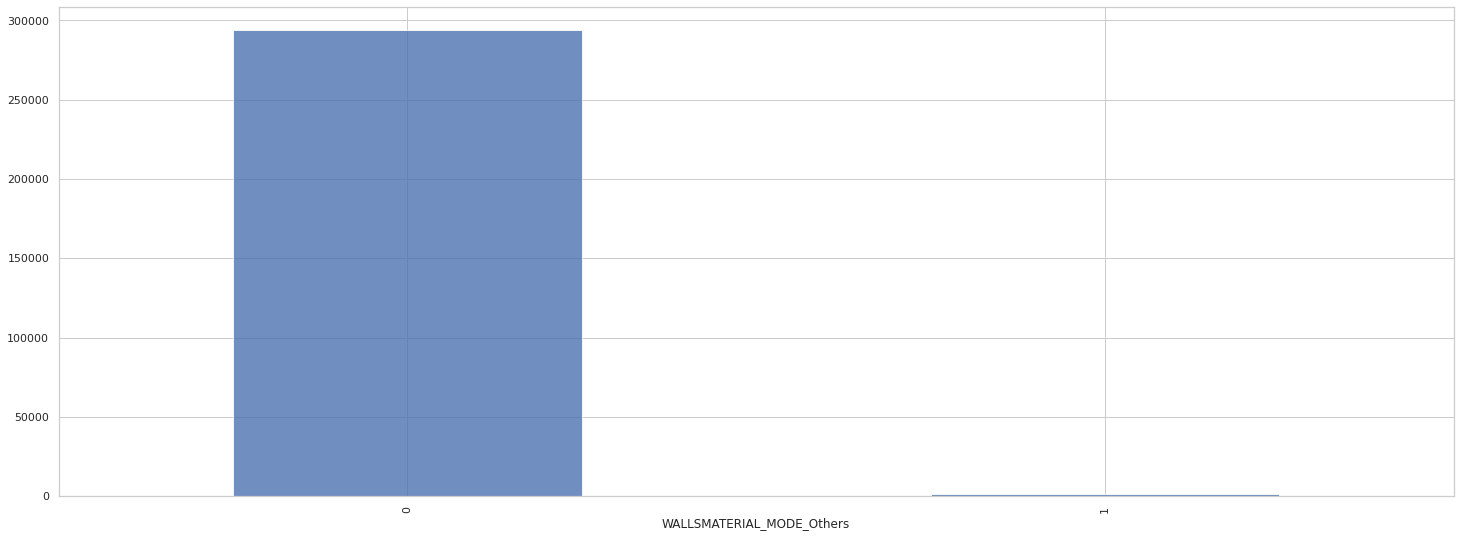

Participación de la categorías de WALLSMATERIAL_MODE_Panel son: 
 WALLSMATERIAL_MODE_Panel
0    78.747155
1    21.252845
Name: SK_ID_CURR, dtype: float64 



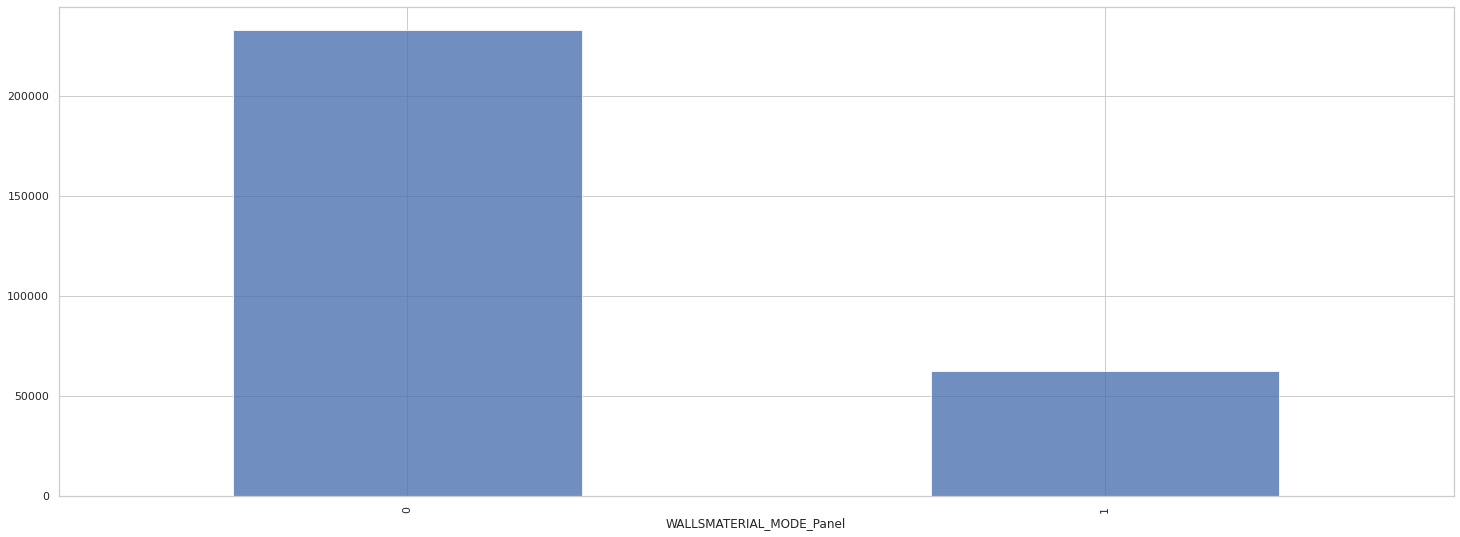

Participación de la categorías de WALLSMATERIAL_MODE_Stone, brick son: 
 WALLSMATERIAL_MODE_Stone, brick
0    79.016067
1    20.983933
Name: SK_ID_CURR, dtype: float64 



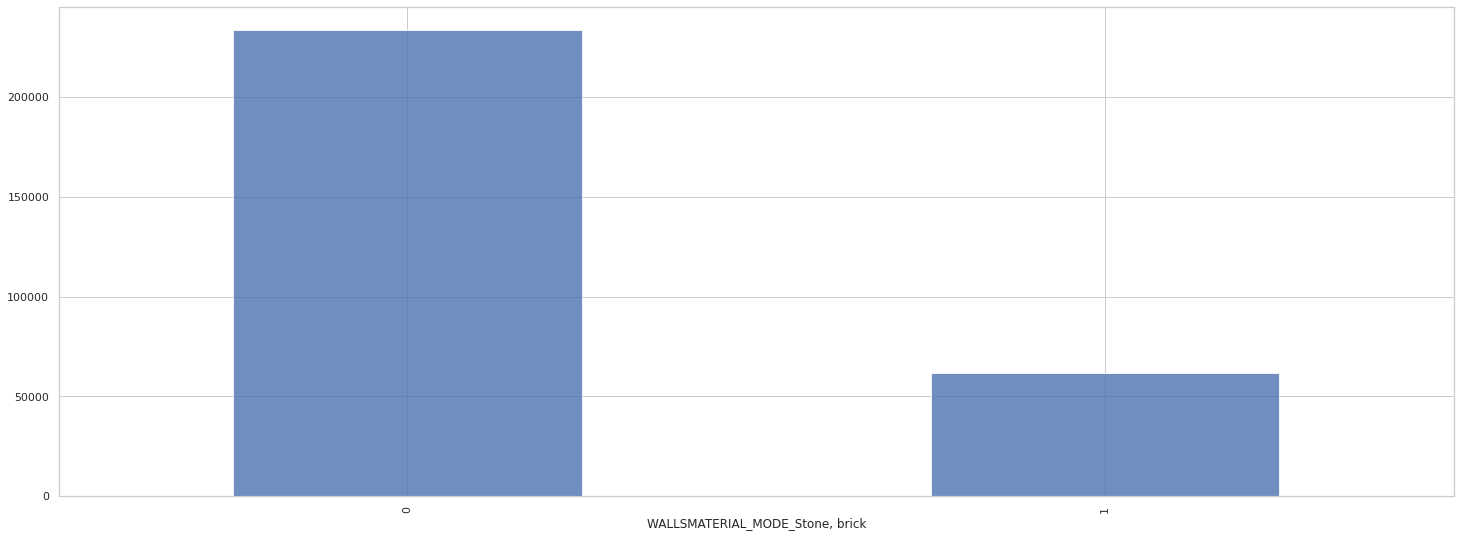

Participación de la categorías de WALLSMATERIAL_MODE_Wooden son: 
 WALLSMATERIAL_MODE_Wooden
0    98.248009
1     1.751991
Name: SK_ID_CURR, dtype: float64 



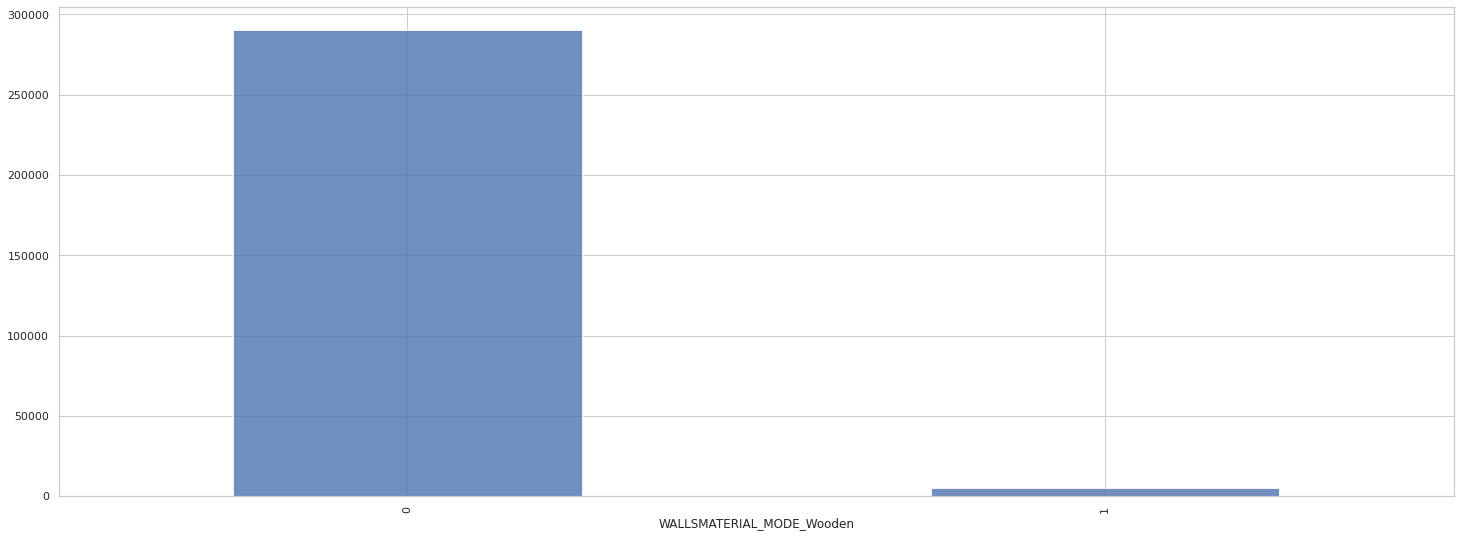

In [ ]:
for i in Categoricas[2:]:
    agrupa=data['SK_ID_CURR'].groupby(data[i]).count()
    agrupa.plot.bar(alpha=0.8)
    print(f'Participación de la categorías de {i} son: \n {100*agrupa/len(data)} \n')
    plt.show()

A partir de la exploración anterior, se identifica que las siguientes variables requieren de una transformación adicional, pues el desbalance que presentan dentro de las diferentes categórias permite inferir que no aportarán información a la hora de predecir nuestro TARGET. Sin embargo, se hará una prueba de * Chi-Cuadrado * para validar este supuesto.

Las variables que se deben de revisar son: 
* NAME_INCOME_TYPE_Businessman, NAME_INCOME_TYPE_State servant
* NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student
* NAME_INCOME_TYPE_Unemployed

* NAME_EDUCATION_TYPE_Academic degree
* NAME_EDUCATION_TYPE_Lower secondary

* NAME_HOUSING_TYPE_Co-op apartment
* NAME_HOUSING_TYPE_Office apartment

* OCCUPATION_TYPE_Cleaning staff
* OCCUPATION_TYPE_Cooking staff
* OCCUPATION_TYPE_HR staff
* OCCUPATION_TYPE_IT staff
* OCCUPATION_TYPE_Low-skill Laborers
* OCCUPATION_TYPE_Private service staff
* OCCUPATION_TYPE_Realty agents
* OCCUPATION_TYPE_Secretaries
* OCCUPATION_TYPE_Waiters/barmen staff

* FONDKAPREMONT_MODE_not specified

* HOUSETYPE_MODE_specific housing
* HOUSETYPE_MODE_terraced house
* WALLSMATERIAL_MODE_Mixed
* WALLSMATERIAL_MODE_Monolithic
* WALLSMATERIAL_MODE_Others
* WALLSMATERIAL_MODE_Wooden

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} es IMPORTANTE para la predicción".format(colX)
        else:
            result="{0} no es una feature importante. (Descartar {0} del modelo)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index =                                                       self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [ ]:
#Initialize ChiSquare Class
cT = ChiSquare(data)
#categorical variables: las que en data.info son objetos
testCol = Categoricas

In [ ]:
for var in Categoricas[2:]:
    cT.TestIndependence(colX=var,colY='TARGET')

FLAG_OWN_CAR es IMPORTANTE para la predicción
FLAG_OWN_REALTY es IMPORTANTE para la predicción
REGION_RATING_CLIENT es IMPORTANTE para la predicción
REGION_RATING_CLIENT_W_CITY es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Businessman no es una feature importante. (Descartar NAME_INCOME_TYPE_Businessman del modelo)
NAME_INCOME_TYPE_Commercial associate es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Maternity leave no es una feature importante. (Descartar NAME_INCOME_TYPE_Maternity leave del modelo)
NAME_INCOME_TYPE_Pensioner es IMPORTANTE para la predicción
NAME_INCOME_TYPE_State servant es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Student no es una feature importante. (Descartar NAME_INCOME_TYPE_Student del modelo)
NAME_INCOME_TYPE_Unemployed es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Working es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Academic degree es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Higher education es IMPORTANTE para la predicción
NAME

A realizar: 
* NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student -> Juntar y volver a probar chi-cuadrado
* NAME_EDUCATION_TYPE_Academic degree -> No transformar, es importante.
* NAME_EDUCATION_TYPE_Lower secondary -> No transformar, es importante.

* NAME_HOUSING_TYPE_Co-op apartment -> No transformar, eliminar. 
* NAME_HOUSING_TYPE_Office apartment -> No transformar, es importante.

* OCCUPATION_TYPE_Cleaning staff  -> No transformar, es importante.
* OCCUPATION_TYPE_Cooking staff  -> No transformar, es importante.
* OCCUPATION_TYPE_Low-skill Laborers -> No transformar, es importante.
* OCCUPATION_TYPE_Private service staff -> No transformar, es importante. 
* OCCUPATION_TYPE_Secretaries,  OCCUPATION_TYPE_Realty agents, OCCUPATION_TYPE_HR staff, OCCUPATION_TYPE_IT staff
* OCCUPATION_TYPE_Waiters/barmen staff   -> No transformar, es importante.


* HOUSETYPE_MODE_specific housing-> No transformar, es importante.
* HOUSETYPE_MODE_terraced house -> No transformar, eliminar.
* WALLSMATERIAL_MODE_Mixed -> No transformar, eliminar.
* WALLSMATERIAL_MODE_Monolithic, WALLSMATERIAL_MODE_Others
* WALLSMATERIAL_MODE_Wooden -> No transformar, es importante.

Otras variables a eliminar: 
* NAME_EDUCATION_TYPE_Incomplete higher
* NAME_HOUSING_TYPE_Co-op apartment
* NAME_HOUSING_TYPE_Municipal apartment


In [ ]:
name_income=data[['NAME_INCOME_TYPE_Businessman',
'NAME_INCOME_TYPE_Commercial associate' ,
'NAME_INCOME_TYPE_Maternity leave' ,
'NAME_INCOME_TYPE_Pensioner' ,
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Working']].copy()
cont_cat=[]
for i in name_income.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=name_income.columns).T

Participación de la categorías de NAME_INCOME_TYPE_Working son: 
    NAME_INCOME_TYPE_Businessman  NAME_INCOME_TYPE_Commercial associate  \
0                      0.001355                              22.699347   

   NAME_INCOME_TYPE_Maternity leave  NAME_INCOME_TYPE_Pensioner  \
0                          0.001355                   18.197952   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  \
0                        7.034721                  0.005758   

   NAME_INCOME_TYPE_Working  
0                 52.053417   



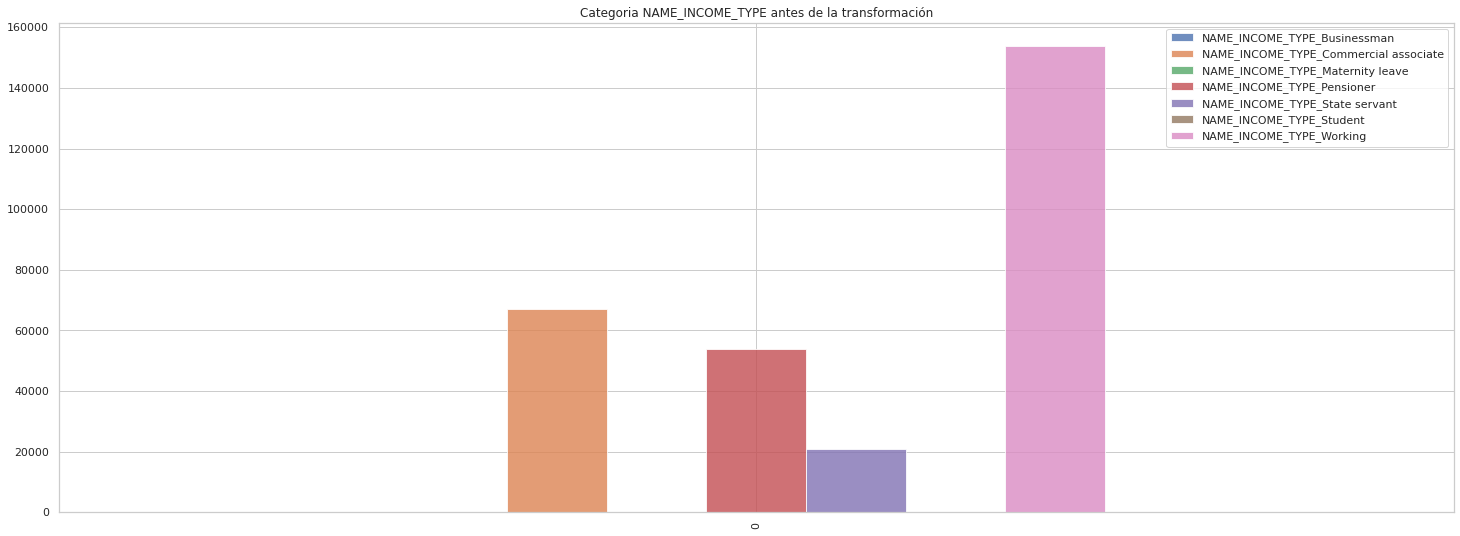

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria NAME_INCOME_TYPE antes de la transformación')
plt.show()

In [ ]:
wallsmaterial=data[['WALLSMATERIAL_MODE_Block',
'WALLSMATERIAL_MODE_Mixed',
'WALLSMATERIAL_MODE_Monolithic', 
'WALLSMATERIAL_MODE_Others', 
'WALLSMATERIAL_MODE_Panel', 
'WALLSMATERIAL_MODE_Stone, brick',
'WALLSMATERIAL_MODE_Wooden']].copy()
cont_cat=[]
for i in wallsmaterial.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=wallsmaterial.columns).T

Participación de la categorías de WALLSMATERIAL_MODE_Wooden son: 
    WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                  2.963111                  0.737645   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                       0.537824                   0.524954   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                 21.252845                        20.983933   

   WALLSMATERIAL_MODE_Wooden  
0                   1.751991   



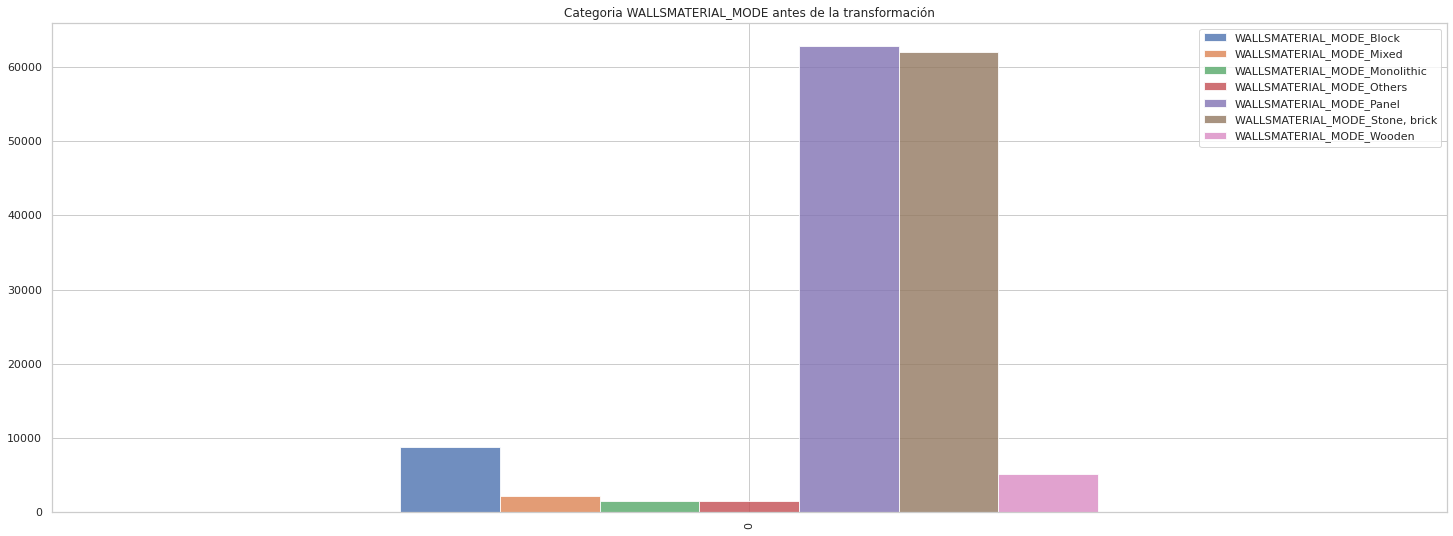

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria WALLSMATERIAL_MODE antes de la transformación')
plt.show()

In [ ]:
occupation=data[['OCCUPATION_TYPE_Accountants' ,
'OCCUPATION_TYPE_Cleaning staff',
'OCCUPATION_TYPE_Cooking staff', 
'OCCUPATION_TYPE_Core staff', 
'OCCUPATION_TYPE_Drivers',
'OCCUPATION_TYPE_HR staff' ,
'OCCUPATION_TYPE_High skill tech staff', 
'OCCUPATION_TYPE_IT staff' ,
'OCCUPATION_TYPE_Laborers' ,
'OCCUPATION_TYPE_Low-skill Laborers', 
'OCCUPATION_TYPE_Managers' ,
'OCCUPATION_TYPE_Medicine staff' ,
'OCCUPATION_TYPE_Private service staff',
'OCCUPATION_TYPE_Realty agents', 
'OCCUPATION_TYPE_Sales staff' ,
'OCCUPATION_TYPE_Secretaries' ,
'OCCUPATION_TYPE_Security staff',
'OCCUPATION_TYPE_Waiters/barmen staff']].copy()
cont_cat=[]
for i in occupation.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=occupation.columns).T

Participación de la categorías de OCCUPATION_TYPE_Waiters/barmen staff son: 
    OCCUPATION_TYPE_Accountants  OCCUPATION_TYPE_Cleaning staff  \
0                     3.137531                        1.544042   

   OCCUPATION_TYPE_Cooking staff  OCCUPATION_TYPE_Core staff  \
0                       1.965698                    8.946909   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_HR staff  \
0                 6.081676                  0.180178   

   OCCUPATION_TYPE_High skill tech staff  OCCUPATION_TYPE_IT staff  \
0                               3.688902                  0.163244   

   OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Low-skill Laborers  \
0                 18.211838                            0.694971   

   OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                  6.279465                        2.814092   

   OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                               0.860586                       0.2448

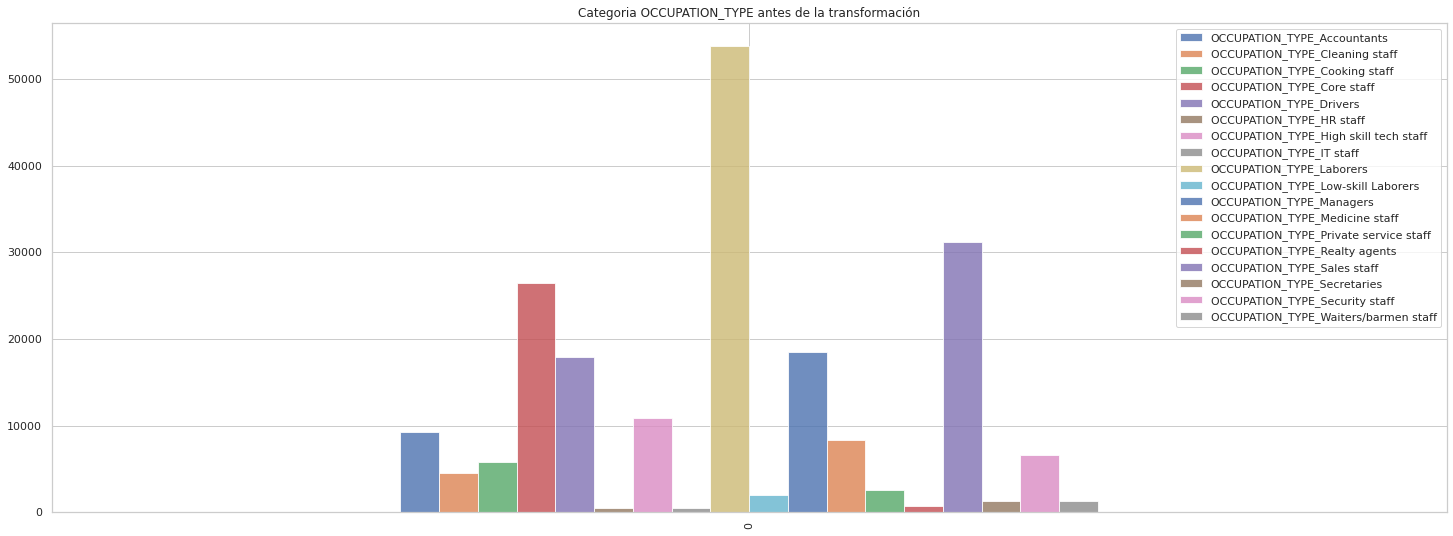

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria OCCUPATION_TYPE antes de la transformación')
plt.show()

In [ ]:
data.shape

(295264, 142)

In [ ]:
lista_cat_borrar=['NAME_HOUSING_TYPE_Co-op apartment','HOUSETYPE_MODE_terraced house',\
                  'NAME_HOUSING_TYPE_Municipal apartment','NAME_INCOME_TYPE_Unemployed']

In [ ]:
#Realizar el drop de las variables
for i in lista_cat_borrar:
  data.drop([i],axis=1,inplace=True)

In [ ]:
#Realiza combinación lineal de ciertas variables
data['NAME_INCOME_TYPE_Maternity leave']=((data['NAME_INCOME_TYPE_Maternity leave'].astype(int)) | \
                                          (data['NAME_INCOME_TYPE_Student'].astype(int))\
                                          ).astype('category')
data.rename(columns={'NAME_INCOME_TYPE_Maternity leave': 'NAME_INCOME_TYPE_Others'}, inplace=True)
data=data.drop('NAME_INCOME_TYPE_Student',axis=1)

In [ ]:
name_income=data[['NAME_INCOME_TYPE_Businessman',
'NAME_INCOME_TYPE_Commercial associate' ,
'NAME_INCOME_TYPE_Others' ,
'NAME_INCOME_TYPE_Pensioner' ,
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Working']].copy()
cont_cat=[]
for i in name_income.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=name_income.columns).T

Participación de la categorías de NAME_INCOME_TYPE_Working son: 
    NAME_INCOME_TYPE_Businessman  NAME_INCOME_TYPE_Commercial associate  \
0                      0.001355                              22.699347   

   NAME_INCOME_TYPE_Others  NAME_INCOME_TYPE_Pensioner  \
0                 0.007112                   18.197952   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  
0                        7.034721                 52.053417   



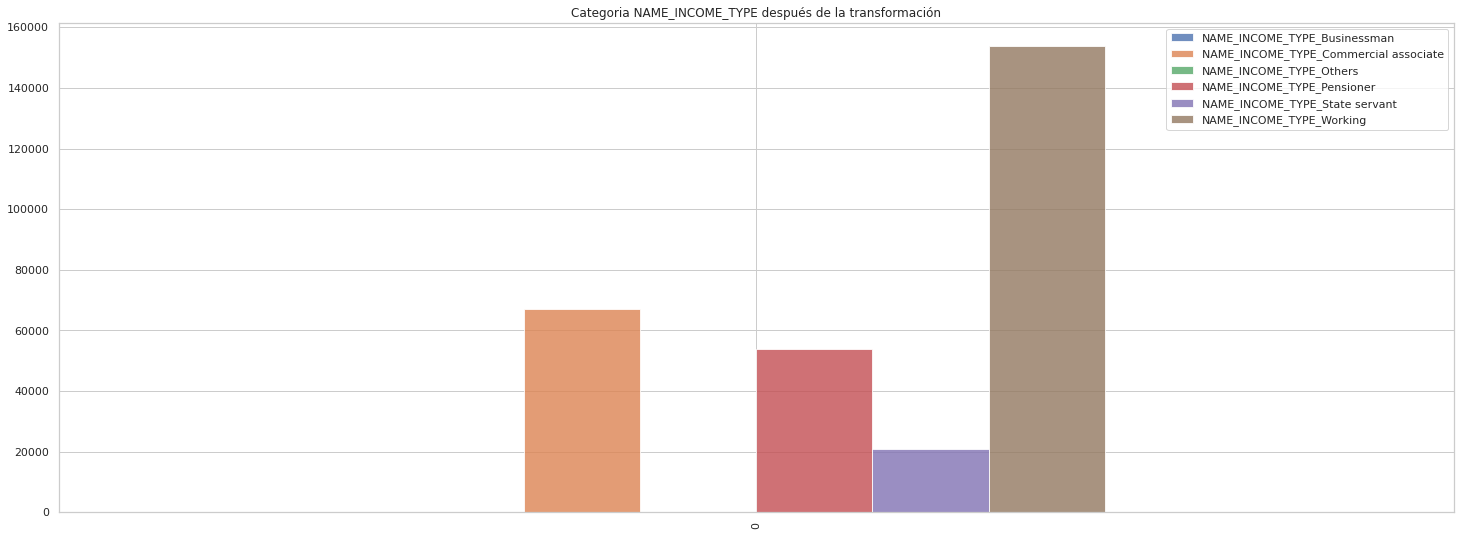

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria NAME_INCOME_TYPE después de la transformación')
plt.show()

In [ ]:
#data['WALLSMATERIAL_MODE_Others']=((data['WALLSMATERIAL_MODE_Monolithic'].astype(int)) | \
                                   #(data['WALLSMATERIAL_MODE_Others'].astype(int)) | \
                                   #(data['WALLSMATERIAL_MODE_Mixed'].astype(int))
                                          #).astype('category')
#data=data.drop(['WALLSMATERIAL_MODE_Monolithic','WALLSMATERIAL_MODE_Mixed'],axis=1)

In [ ]:
data['WALLSMATERIAL_MODE_DUROS']=((data['WALLSMATERIAL_MODE_Stone, brick'].astype(int))|\
              (data['WALLSMATERIAL_MODE_Monolithic'].astype(int))|(data['WALLSMATERIAL_MODE_Block'].astype(int)).astype(int)).astype('category')
data['WALLSMATERIAL_MODE_ARMABLES']=((data['WALLSMATERIAL_MODE_Wooden'].astype(int))|\
              (data['WALLSMATERIAL_MODE_Panel'].astype(int))).astype('category')
data['WALLSMATERIAL_MODE_Others']=((data['WALLSMATERIAL_MODE_Others'].astype(int))|\
              (data['WALLSMATERIAL_MODE_Mixed'].astype(int))).astype('category')

In [ ]:
wallsmaterial=data[['WALLSMATERIAL_MODE_DUROS', 
'WALLSMATERIAL_MODE_ARMABLES', 
'WALLSMATERIAL_MODE_Others']].copy()
cont_cat=[]
for i in wallsmaterial.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=wallsmaterial.columns).T

Participación de la categorías de WALLSMATERIAL_MODE_Others son: 
    WALLSMATERIAL_MODE_DUROS  WALLSMATERIAL_MODE_ARMABLES  \
0                 24.484868                    23.004836   

   WALLSMATERIAL_MODE_Others  
0                   1.262599   



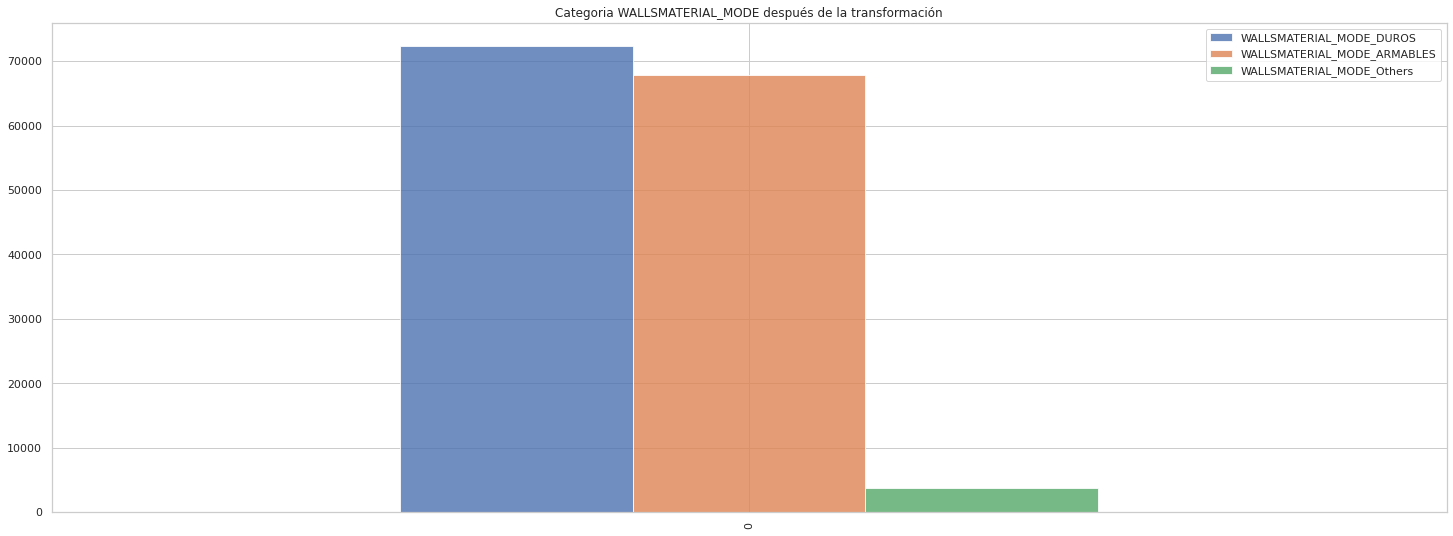

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria WALLSMATERIAL_MODE después de la transformación')
plt.show()

In [ ]:
data=data.drop(['WALLSMATERIAL_MODE_Stone, brick','WALLSMATERIAL_MODE_Block','WALLSMATERIAL_MODE_Wooden',\
                'WALLSMATERIAL_MODE_Monolithic','WALLSMATERIAL_MODE_Mixed','WALLSMATERIAL_MODE_Panel'],axis=1)

In [ ]:
# backup=data.copy()

In [ ]:
data['OCCUPATION_TYPE_BAJO']=((data['OCCUPATION_TYPE_Cleaning staff'].astype(int))|\
              (data['OCCUPATION_TYPE_Cooking staff'].astype(int))|(data['OCCUPATION_TYPE_Drivers'].astype(int))|\
              (data['OCCUPATION_TYPE_Laborers'].astype(int))|(data['OCCUPATION_TYPE_Security staff'].astype(int))|\
              (data['OCCUPATION_TYPE_Waiters/barmen staff'].astype(int))|(data['OCCUPATION_TYPE_Low-skill Laborers'].astype(int))|\
              (data['OCCUPATION_TYPE_Secretaries']).astype(int)).astype('category')

data['OCCUPATION_TYPE_MEDIO']=((data['OCCUPATION_TYPE_Sales staff'].astype(int))|(data['OCCUPATION_TYPE_Realty agents'].astype(int))|\
               (data['OCCUPATION_TYPE_High skill tech staff'].astype(int))|(data['OCCUPATION_TYPE_Core staff']).astype(int)).astype('category')

data['OCCUPATION_TYPE_ALTO']=((data['OCCUPATION_TYPE_IT staff'].astype(int))|(data['OCCUPATION_TYPE_Managers'].astype(int))|\
              (data['OCCUPATION_TYPE_Medicine staff'].astype(int))|(data['OCCUPATION_TYPE_Private service staff'].astype(int))|\
              (data['OCCUPATION_TYPE_Accountants'].astype(int))|(data['OCCUPATION_TYPE_HR staff'].astype(int))).astype('category')

data=data.drop(['OCCUPATION_TYPE_Accountants','OCCUPATION_TYPE_Cleaning staff','OCCUPATION_TYPE_Cooking staff'\
,'OCCUPATION_TYPE_Core staff','OCCUPATION_TYPE_Drivers','OCCUPATION_TYPE_HR staff','OCCUPATION_TYPE_High skill tech staff',\
'OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Laborers','OCCUPATION_TYPE_Low-skill Laborers','OCCUPATION_TYPE_Managers',\
'OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Private service staff','OCCUPATION_TYPE_Realty agents','OCCUPATION_TYPE_Sales staff',\
'OCCUPATION_TYPE_Secretaries','OCCUPATION_TYPE_Security staff','OCCUPATION_TYPE_Waiters/barmen staff'],axis=1)

In [ ]:
data100=data.copy()

In [ ]:
occupation=data[['OCCUPATION_TYPE_BAJO' ,
'OCCUPATION_TYPE_MEDIO',
'OCCUPATION_TYPE_ALTO']].copy()
cont_cat=[]
for i in occupation.columns:
  cont_cat.append(data['SK_ID_CURR'].groupby(data[i]).count()[1])
cont_cat=pd.DataFrame(cont_cat,index=occupation.columns).T

Participación de la categorías de OCCUPATION_TYPE_ALTO son: 
    OCCUPATION_TYPE_BAJO  OCCUPATION_TYPE_MEDIO  OCCUPATION_TYPE_ALTO
0             31.596131              23.459345             13.435095 



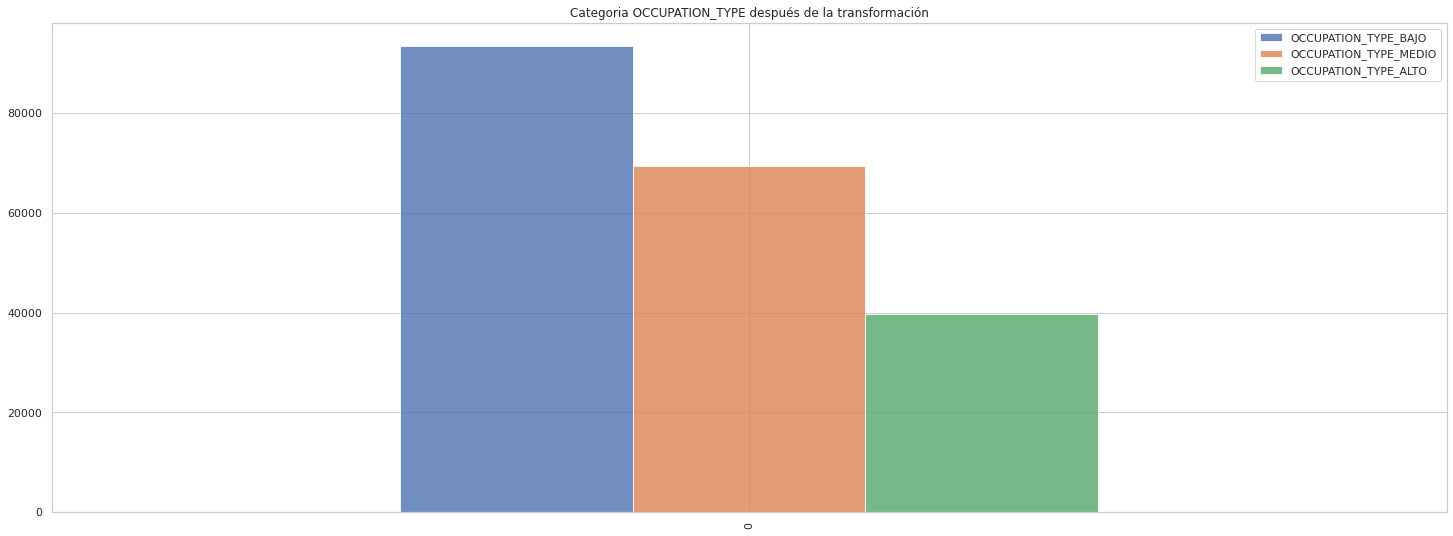

In [ ]:
cont_cat.plot.bar(alpha=0.8)
print(f'Participación de la categorías de {i} son: \n {100*cont_cat/len(data)} \n')
plt.title('Categoria OCCUPATION_TYPE después de la transformación')
plt.show()

In [ ]:
data

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,MONTHS_EMPLOYED,...,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,ind_vel_cuotas_cr,ind_vel_tpago_cr,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO
0,100002,1,0,1,0.0,202500.0,406597.5,24700.5,26.0,21.0,...,0.0,0.0,9.500000,0.935258,1.000000,1,0,1,0,0
1,100003,0,0,0,0.0,270000.0,1293502.5,35698.5,46.0,40.0,...,0.0,1.0,4.884615,0.994832,1.000000,1,0,0,1,0
2,100004,0,1,1,0.0,67500.0,135000.0,6750.0,52.0,8.0,...,0.0,0.0,1.500000,0.989934,1.000000,0,0,1,0,0
3,100006,0,0,1,0.0,135000.0,312682.5,29686.5,52.0,101.0,...,0.0,4.0,3.944444,0.928670,1.000000,0,0,1,0,0
4,100007,0,0,1,0.0,121500.0,513000.0,21865.5,55.0,101.0,...,1.0,3.0,6.038961,0.996477,1.037038,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0.0,157500.0,254700.0,27558.0,26.0,8.0,...,0.0,0.0,3.500000,0.767824,1.000000,1,0,0,1,0
307507,456252,0,0,1,0.0,72000.0,269550.0,12001.5,57.0,1000.0,...,0.0,0.0,3.500000,0.998816,1.000000,1,0,0,0,0
307508,456253,0,0,1,0.0,153000.0,677664.0,29979.0,41.0,264.0,...,0.0,0.0,4.785714,0.993927,1.068950,0,1,0,0,1
307509,456254,1,0,1,0.0,171000.0,370107.0,20205.0,33.0,160.0,...,0.0,0.0,5.263158,0.882180,1.000000,1,0,1,0,0


In [ ]:
#Initialize ChiSquare Class
cT = ChiSquare(data)
vbles_a_probar=['NAME_INCOME_TYPE_Others','WALLSMATERIAL_MODE_Others','OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO']
#categorical variables: las que en data.info son objetos
testCol = vbles_a_probar

for var in vbles_a_probar:
    cT.TestIndependence(colX=var,colY='TARGET')

NAME_INCOME_TYPE_Others no es una feature importante. (Descartar NAME_INCOME_TYPE_Others del modelo)
WALLSMATERIAL_MODE_Others no es una feature importante. (Descartar WALLSMATERIAL_MODE_Others del modelo)
OCCUPATION_TYPE_BAJO es IMPORTANTE para la predicción
OCCUPATION_TYPE_MEDIO es IMPORTANTE para la predicción
OCCUPATION_TYPE_ALTO es IMPORTANTE para la predicción


Importante: Hay 3 variables que ingresaron en este análisis de variables categoricas las cuales poseen más de 7 valores para las mismas. Con el fin de minimizar la perdida de información:
1. WALLSMATERIAL_MODE: Se realizó una agrupación de aquellos valores que poco aportaban al TARGET según la prueba de Chi-Cuadrado, y se agruparon en "others". La nueva variable Others sí es importante según la prueba de Chi-cuadrado
2. OCCUPATION_TYPE: Se agrupa en ocupaciones de alta, media y baja. De las 13 o más categorías en esta varibale, se reducen en 3. Las nuevas 3 sí son importantes según la prueba de chi-cuadrado
3. NAME_INCOME_TYPE: Quedan 6 variables después de prueba chi-cuadrado, ya que las que no aportaban se agruparon, pero la nuvea agrupación tampoco resultó importante.

In [ ]:
#Se verifica nueva dimensión de la data
data.shape #Respecto a la primera corrida, habíamos quedado con 84 variables hasta este punto. Ya son 118

(295264, 118)

### 4.5.2 Numéricas

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)

In [ ]:
data['AMT_REQ_CREDIT_BUREAU_YEAR']=data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

In [ ]:
baja_std=[]

for i in Cuantitativas:
  if data[i].std()<0.05:
    baja_std.append(i)

In [ ]:
print(f"Las variables con baja desviación estándar son: {baja_std}")

Las variables con baja desviación estándar son: ['CREDIT_ACTIVE_Bad debt', 'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4', 'RATE_INTEREST_PRIMARY', 'NAME_PORTFOLIO_Cars', 'ind_vel_tpago_cr']


In [ ]:
#Realizar el drop de las variables
for i in baja_std:
  data.drop([i],axis=1,inplace=True)

In [ ]:
data.shape

(295264, 112)

In [ ]:
#Se transforma la variable TARGET en numérica para poderla incluir en la matriz de correlación
data['TARGET']=data['TARGET'].astype('int64')

In [ ]:
data['TARGET'].dtype

dtype('int64')

In [ ]:
newdf = data.iloc[:,1:].select_dtypes(include=['int64','float64'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295264 entries, 0 to 307510
Data columns (total 89 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   TARGET                                                       295264 non-null  int64  
 1   FLAG_OWN_CAR                                                 295264 non-null  int64  
 2   FLAG_OWN_REALTY                                              295264 non-null  int64  
 3   CNT_CHILDREN                                                 295264 non-null  float64
 4   AMT_INCOME_TOTAL                                             295264 non-null  float64
 5   AMT_CREDIT_x                                                 295264 non-null  float64
 6   AMT_ANNUITY_x                                                295264 non-null  float64
 7   DAYS_BIRTH                                                   2952

In [ ]:
newdf_corr = newdf.corr()

In [ ]:
corr_media_alta=[]
for i in newdf_corr.columns:
  for j in newdf_corr.columns:
    if i!=j:
      if newdf_corr[i][j]>=0.7:
        correlacion=round(newdf_corr[i][j],4)
        corr_media_alta.append((i,j,correlacion))

Correlaciones_Altas=pd.DataFrame(corr_media_alta)

In [ ]:
pd.DataFrame(corr_media_alta,columns=['Variable1','Variable2','Correlacion']).head(5)

,Variable1,Variable2,Correlacion
0,AMT_CREDIT_x,AMT_ANNUITY_x,0.7730
1,AMT_ANNUITY_x,AMT_CREDIT_x,0.7730
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.9504
3,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.9504
4,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.9985


In [ ]:
len(corr_media_alta)/2 #Numero de combinaciones con correlación altas

46.0

In [ ]:
# from google.colab import files
# Correlaciones_Altas.to_csv('corr.csv') 
# files.download('corr.csv')

In [ ]:
#Matriz de Correlación
px.imshow(newdf_corr,  width=800, height=800)

Se hace un analisis profundio de la matriz de correlación de pearson, el cual se puede encontrar en el archivo de apoyo "03_CORR_VAR.xlsx".

Las variables que se identifican necesarias de realizar un drop son: ['AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM','CREDIT_TYPE_Credit card',
           'AMT_ANNUITY_x','REGION_RATING_CLIENT','AMT_CREDIT_SUM',
           'DAYS_LAST_DUE','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT_Y','NAME_TYPE_SUITE_Unaccompanied',
           'NAME_CLIENT_TYPE_Repeater','NAME_PRODUCT_TYPE_x-sell',
           'Revolving loans','AMT_CREDIT_y','NAME_PAYMENT_TYPE_Cash through the bank','NFLAG_INSURED_ON_APPROVAL'
           ]

In [ ]:
data['indice_falta_pagar']=data['AMT_CREDIT_SUM_DEBT']/data['AMT_CREDIT_SUM']

In [ ]:
data[np.isinf(data['indice_falta_pagar'])]=data[np.isinf(data['indice_falta_pagar'])].replace(np.inf,0)

In [ ]:
data=data.drop(data[np.isinf(data['indice_falta_pagar'])].index,axis=0)

In [ ]:
data[np.isinf(data['indice_falta_pagar'])]

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,MONTHS_EMPLOYED,...,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,ind_vel_cuotas_cr,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar


In [ ]:
data.shape

(295237, 113)

In [ ]:
data['indice_falta_pagar']=data['indice_falta_pagar'].replace(np.nan,0)

In [ ]:
data.drop(['AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM','CREDIT_TYPE_Credit card',
           'AMT_ANNUITY_x','REGION_RATING_CLIENT','AMT_CREDIT_SUM',
           'DAYS_LAST_DUE','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT_Y','NAME_TYPE_SUITE_Unaccompanied',
           'NAME_CLIENT_TYPE_Repeater','NAME_PRODUCT_TYPE_x-sell',
           'Revolving loans','AMT_CREDIT_y','NAME_PAYMENT_TYPE_Cash through the bank','NFLAG_INSURED_ON_APPROVAL'
           ],\
          axis=1,inplace=True)

In [ ]:
data.shape #De 74 corrida 1 se pasa a 98

(295237, 98)

###4.5.3 Correlación con la variable objetivo

Finalmente, se identifica que la correlación de las diferentes variables respecto a TARGET no es tan alta: La correlación negativa más fuerte es de -0.15 y la positiva es de 0.067.

In [ ]:
newdf_corr.iloc[1:,0:1].describe()

,TARGET
count,88.000000
mean,0.002154
std,0.031932
min,-0.159220
25%,-0.013577
50%,0.001269
75%,0.020353
max,0.067363


In [ ]:
newdf_corr.drop(['AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM','CREDIT_TYPE_Credit card',
           'AMT_ANNUITY_x','REGION_RATING_CLIENT','AMT_CREDIT_SUM',
           'DAYS_LAST_DUE','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT_Y','NAME_TYPE_SUITE_Unaccompanied',
           'NAME_CLIENT_TYPE_Repeater','NAME_PRODUCT_TYPE_x-sell',
           'Revolving loans','AMT_CREDIT_y','NAME_PAYMENT_TYPE_Cash through the bank','NFLAG_INSURED_ON_APPROVAL'
           ],\
          axis=1,inplace=True)

In [ ]:
baja_Corr=[]
for i in newdf_corr.iloc[0:1,1:].columns:
  corr=round(newdf_corr[i][0],4)
  if (abs(corr)*100)<1.7:
    baja_Corr.append(i)

In [ ]:
print(f'La cantidad de variables a eliminar a partir del criterio de correlación en valor absoluto inferior a 0.005 son {len(baja_Corr)}')
print(f'Las variables a eliminar son: {baja_Corr}')

La cantidad de variables a eliminar a partir del criterio de correlación en valor absoluto inferior a 0.005 son 36
Las variables a eliminar son: ['FLAG_OWN_REALTY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_HOUSING_TYPE_Office apartment', 'FONDKAPREMONT_MODE_not specified', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_LIMIT', 'CREDIT_ACTIVE_Sold', 'CREDIT_TYPE_Loan for business development', 'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2', 'Cash loans', 'Consumer loans', 'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'RATE_INTEREST_PRIVILEGED', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'NAME_CONTRACT_STATUS_Unused offer', 'NAME_PAYMENT_TYPE_Cashless from the account of the employer', 'NAME_PAYMENT_TYPE_Non-cash from your account', 'NAME_TYPE_SUITE_Children', 'NA

In [ ]:
#Realizar el drop de las variables
for i in baja_Corr:
  data.drop([i],axis=1,inplace=True)
  newdf_corr.drop([i],axis=1,inplace=True)

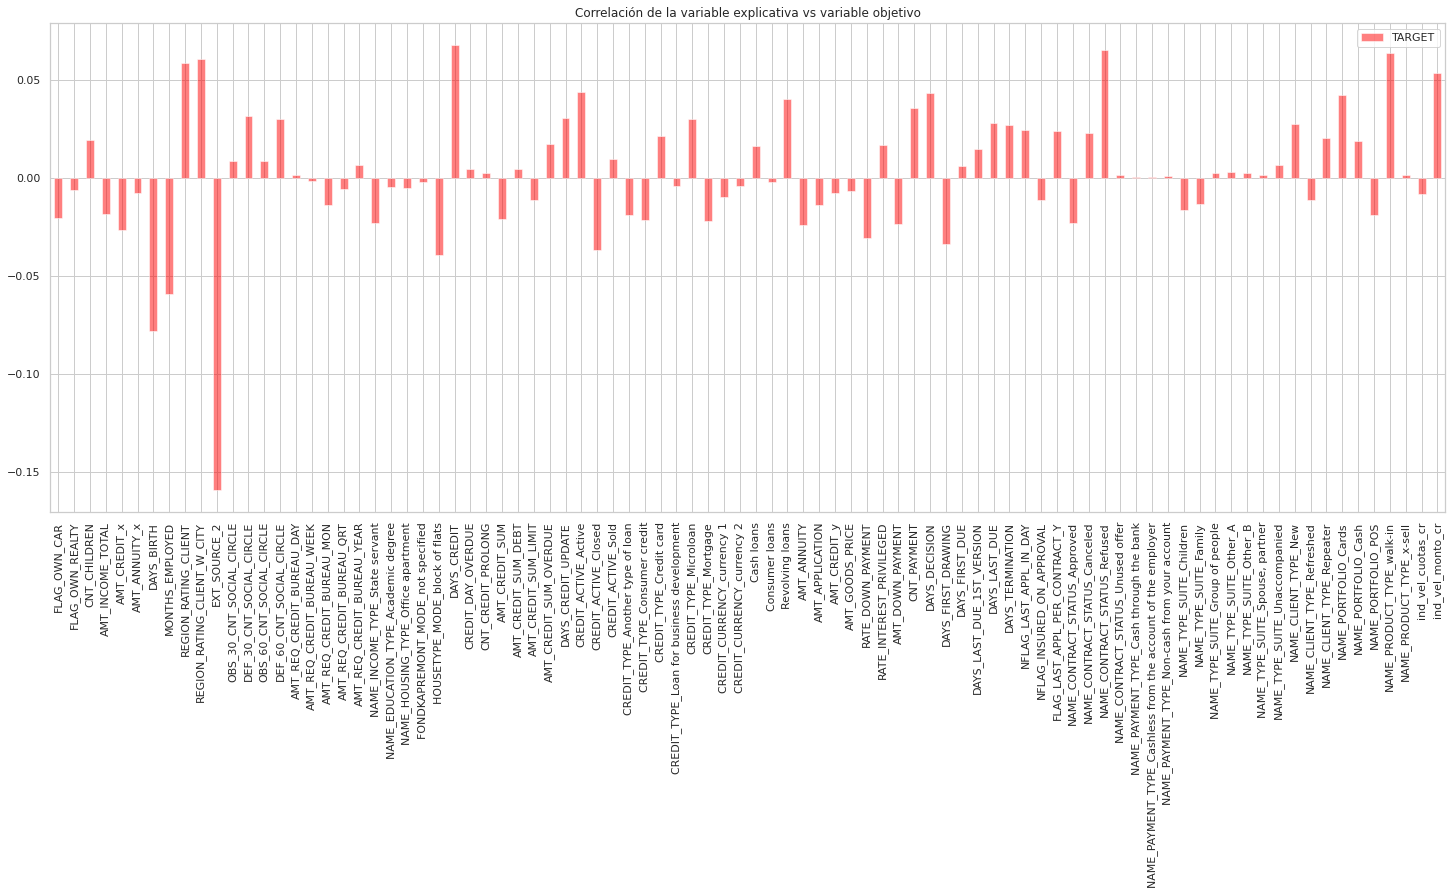

In [ ]:
newdf_corr.iloc[1:,0:1].plot.bar(alpha=0.5,color='red')
plt.title('Correlación de la variable explicativa vs variable objetivo')
plt.show()

In [ ]:
data['TARGET']=data['TARGET'].astype('category')
data['TARGET'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
data.shape

(295237, 62)

## 4.6 Revisión de duplicados

In [ ]:
#Drop SK_ID, ya que nos trae un ID diferente por prestamo
data.iloc[1:].duplicated().sum()

0

In [ ]:
data.drop_duplicates(keep=False,inplace=True, ignore_index=True) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295237 entries, 0 to 295236
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   SK_ID_CURR                                         295237 non-null  int64   
 1   TARGET                                             295237 non-null  category
 2   FLAG_OWN_CAR                                       295237 non-null  int64   
 3   CNT_CHILDREN                                       295237 non-null  float64 
 4   AMT_INCOME_TOTAL                                   295237 non-null  float64 
 5   AMT_CREDIT_x                                       295237 non-null  float64 
 6   DAYS_BIRTH                                         295237 non-null  float64 
 7   MONTHS_EMPLOYED                                    295237 non-null  float64 
 8   REGION_RATING_CLIENT_W_CITY                        295237 non-nu

Hay un ahorro en memoria usada, pues se pasó de 401.9 MB a 94.3 MB

# 5.Guardar Nueva Data

In [ ]:
from google.colab import files
data.to_csv('05-DF_Final_62cols.csv') 
files.download('05-DF_Final_62cols.csv')